<p style="background-color:#3ab1c8;font-family:Cursive;font-size:200%;color:black;text-align:center;border-radius:120px 20px;padding:20px;margin:20px;"><b>Soldier_Race_Project</b></p>

<p style="font-family:Cursive;font-size:100%;color:black;text-align:center;border-radius:10px 10px;"><b>by Nash</b></p>

<b style="font-family:Cursive;font-size:100%;color:black;text-align:right;border-radius:10px 10px;">Follow me [Linkedin](www.linkedin.com/in/nash-n-sungur-333869289) | [Git Hub](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0)</b>

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.options.display.float_format = '{:.3f}'.format

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [2]:
dfm = pd.read_csv("ANSUR II MALE Public.csv", encoding="latin1")
dfm

subjectid  abdominalextensiondepthsitting  acromialheight  \
0         10027                             266            1467   
1         10032                             233            1395   
2         10033                             287            1430   
3         10092                             234            1347   
4         10093                             250            1585   
...         ...                             ...             ...   
4077      29442                             235            1353   
4078      29443                             247            1473   
4079      29447                             264            1394   
4080      29451                             203            1417   
4081      29452                             327            1523   

      acromionradialelength  anklecircumference  axillaheight  \
0                       337                 222          1347   
1                       326                 220          1293   
2                       341                 230          1327   
3                       310                 230          1239   
4                       372                 247          1478   
...                     ...                 ...           ...   
4077                    312                 216          1263   
4078                    336                 234          1346   
4079                    313                 227          1280   
4080                    327                 223          1314   
4081                    358                 226          1408   

      balloffootcircumference  balloffootlength  biacromialbreadth  \
0                         253               202                401   
1                         245               193                394   
2                         256               196                427   
3                         262               199                401   
4                         267               224                435   
...                       ...               ...                ...   
4077                      228               193                384   
4078                      253               196                428   
4079                      245               193                407   
4080                      250               196                419   
4081                      269               225                442   

      bicepscircumferenceflexed  ...                  Branch  PrimaryMOS  \
0                           369  ...             Combat Arms         19D   
1                           338  ...          Combat Support         68W   
2                           408  ...          Combat Support         68W   
3                           359  ...  Combat Service Support         88M   
4                           356  ...  Combat Service Support         92G   
...                         ...  ...                     ...         ...   
4077                        318  ...             Combat Arms         11B   
4078                        374  ...             Combat Arms         91B   
4079                        367  ...             Combat Arms         13B   
4080                        365  ...             Combat Arms         13P   
4081                        379  ...             Combat Arms         92Y   

      SubjectsBirthLocation  SubjectNumericRace                   Ethnicity  \
0              North Dakota                   1                         NaN   
1                  New York                   1                         NaN   
2                  New York                   2                         NaN   
3                 Wisconsin                   1                         NaN   
4            North Carolina                   2                         NaN   
...                     ...                 ...                         ...   
4077               Colorado                  51  Blackfoot Cherokee Choctaw   
4078               Oklahoma       

In [3]:
dff = pd.read_csv("ANSUR II FEMALE Public.csv")
dff

SubjectId  abdominalextensiondepthsitting  acromialheight  \
0         10037                             231            1282   
1         10038                             194            1379   
2         10042                             183            1369   
3         10043                             261            1356   
4         10051                             309            1303   
...         ...                             ...             ...   
1981      29501                             285            1392   
1982      29502                             262            1324   
1983      29503                             260            1334   
1984      29511                             205            1293   
1985     920103                             238            1346   

      acromionradialelength  anklecircumference  axillaheight  \
0                       301                 204          1180   
1                       320                 207          1292   
2                       329                 233          1271   
3                       306                 214          1250   
4                       308                 214          1210   
...                     ...                 ...           ...   
1981                    335                 223          1297   
1982                    301                 202          1204   
1983                    318                 213          1259   
1984                    302                 199          1207   
1985                    308                 210          1256   

      balloffootcircumference  balloffootlength  biacromialbreadth  \
0                         222               177                373   
1                         225               178                372   
2                         237               196                397   
3                         240               188                384   
4                         217               182                378   
...                       ...               ...                ...   
1981                      252               196                368   
1982                      236               181                378   
1983                      234               183                363   
1984                      213               163                376   
1985                      236               188                361   

      bicepscircumferenceflexed  ...                  Branch  PrimaryMOS  \
0                           315  ...          Combat Support         92Y   
1                           272  ...  Combat Service Support         25U   
2                           300  ...  Combat Service Support         35D   
3                           364  ...  Combat Service Support         25U   
4                           320  ...             Combat Arms         42A   
...                         ...  ...                     ...         ...   
1981                        299  ...          Combat Support         42A   
1982                        294  ...          Combat Support         25U   
1983                        332  ...          Combat Support         42A   
1984                        276  ...          Combat Support         92Y   
1985                        285  ...          Combat Support         92F   

      SubjectsBirthLocation  SubjectNumericRace           Ethnicity  DODRace  \
0                   Germany                   2                 NaN        2   
1                California                   3             Mexican        3   
2                     Texas                   1                 NaN        1   
3      District of Columbia                   8  Caribbean Islander        2   
4                     Texas                   1                 NaN        1   
...                     ...                 ...                 ...      ...   
1981                  Texas                   3             Mexican        3   
1982                  Texa

In [4]:
df = pd.concat([dfm, dff], axis=0)
df

subjectid  abdominalextensiondepthsitting  acromialheight  \
0     10027.000                             266            1467   
1     10032.000                             233            1395   
2     10033.000                             287            1430   
3     10092.000                             234            1347   
4     10093.000                             250            1585   
...         ...                             ...             ...   
1981        NaN                             285            1392   
1982        NaN                             262            1324   
1983        NaN                             260            1334   
1984        NaN                             205            1293   
1985        NaN                             238            1346   

      acromionradialelength  anklecircumference  axillaheight  \
0                       337                 222          1347   
1                       326                 220          1293   
2                       341                 230          1327   
3                       310                 230          1239   
4                       372                 247          1478   
...                     ...                 ...           ...   
1981                    335                 223          1297   
1982                    301                 202          1204   
1983                    318                 213          1259   
1984                    302                 199          1207   
1985                    308                 210          1256   

      balloffootcircumference  balloffootlength  biacromialbreadth  \
0                         253               202                401   
1                         245               193                394   
2                         256               196                427   
3                         262               199                401   
4                         267               224                435   
...                       ...               ...                ...   
1981                      252               196                368   
1982                      236               181                378   
1983                      234               183                363   
1984                      213               163                376   
1985                      236               188                361   

      bicepscircumferenceflexed  ...  PrimaryMOS  SubjectsBirthLocation  \
0                           369  ...         19D           North Dakota   
1                           338  ...         68W               New York   
2                           408  ...         68W               New York   
3                           359  ...         88M              Wisconsin   
4                           356  ...         92G         North Carolina   
...                         ...  ...         ...                    ...   
1981                        299  ...         42A                  Texas   
1982                        294  ...         25U                  Texas   
1983                        332  ...         42A                  Texas   
1984                        276  ...         92Y                  Texas   
1985                        285  ...         92F                  Texas   

      SubjectNumericRace  Ethnicity  DODRace  Age  Heightin  Weightlbs  \
0                      1        NaN        1   41        71        180   
1                      1        NaN        1   35        68        160   
2                      2        NaN        2   42        68        205   
3                      1        NaN        1   31        66        175   
4                      2        NaN        2   21        77        213   
...                  ...        ...      ...  ...       ...        ...   
1981                   3    Mexican        3   51        67        180   
1982                   3    Mexican        3   40        63        150   
1983        

In [5]:
df.drop(["SubjectId", "subjectid"], axis=1, inplace=True)
df

abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
0                                266            1467                    337   
1                                233            1395                    326   
2                                287            1430                    341   
3                                234            1347                    310   
4                                250            1585                    372   
...                              ...             ...                    ...   
1981                             285            1392                    335   
1982                             262            1324                    301   
1983                             260            1334                    318   
1984                             205            1293                    302   
1985                             238            1346                    308   

      anklecircumference  axillaheight  balloffootcircumference  \
0                    222          1347                      253   
1                    220          1293                      245   
2                    230          1327                      256   
3                    230          1239                      262   
4                    247          1478                      267   
...                  ...           ...                      ...   
1981                 223          1297                      252   
1982                 202          1204                      236   
1983                 213          1259                      234   
1984                 199          1207                      213   
1985                 210          1256                      236   

      balloffootlength  biacromialbreadth  bicepscircumferenceflexed  \
0                  202                401                        369   
1                  193                394                        338   
2                  196                427                        408   
3                  199                401                        359   
4                  224                435                        356   
...                ...                ...                        ...   
1981               196                368                        299   
1982               181                378                        294   
1983               183                363                        332   
1984               163                376                        276   
1985               188                361                        285   

      bicristalbreadth  ...                  Branch  PrimaryMOS  \
0                  274  ...             Combat Arms         19D   
1                  257  ...          Combat Support         68W   
2                  261  ...          Combat Support         68W   
3                  262  ...  Combat Service Support         88M   
4                  263  ...  Combat Service Support         92G   
...                ...  ...                     ...         ...   
1981               312  ...          Combat Support         42A   
1982               287  ...          Combat Support         25U   
1983               299  ...          Combat Support         42A   
1984               280  ...          Combat Support         92Y   
1985               279  ...          Combat Support         92F   

      SubjectsBirthLocation  SubjectNumericRace  Ethnicity  DODRace  Age  \
0              North Dakota                   1        NaN        1   41   
1                  New York                   1        NaN        1   35   
2                  New York                   2        NaN        2   42   
3                 Wisconsin                   1        NaN        1   31   
4            North Carolina                   2        NaN        2   21   
...                     ...                 ...        ...      ...  ...   
1981                  Texas                   3   

In [6]:
df.shape

(6068, 107)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6068 entries, 0 to 1985
Columns: 107 entries, abdominalextensiondepthsitting to WritingPreference
dtypes: int64(98), object(9)
memory usage: 5.0+ MB


In [8]:
df.isnull().sum().sum()

4647

In [9]:
df.columns[df.isnull().any()]   # NaN values only in 'Ethnicity'

Index(['Ethnicity'], dtype='object')

In [10]:
# Ethnicity dropped, too many NaNs

df.drop("Ethnicity", axis=1, inplace=True)

In [11]:
df.isna().sum().sum()  # there is no NaN anymore

0

In [12]:
df.shape

(6068, 106)

In [13]:
df.duplicated().sum()   # there is no duplicated value

0

In [14]:
df.select_dtypes(exclude=[np.number])

Gender       Date Installation            Component  \
0       Male   4-Oct-10    Fort Hood         Regular Army   
1       Male   4-Oct-10    Fort Hood         Regular Army   
2       Male   4-Oct-10    Fort Hood         Regular Army   
3       Male  12-Oct-10    Fort Hood         Regular Army   
4       Male  12-Oct-10    Fort Hood         Regular Army   
...      ...        ...          ...                  ...   
1981  Female   5-Apr-12  Camp Shelby  Army National Guard   
1982  Female   5-Apr-12  Camp Shelby  Army National Guard   
1983  Female   5-Apr-12  Camp Shelby  Army National Guard   
1984  Female   5-Apr-12  Camp Shelby  Army National Guard   
1985  Female  28-May-11   Fort McCoy  Army National Guard   

                      Branch PrimaryMOS SubjectsBirthLocation  \
0                Combat Arms        19D          North Dakota   
1             Combat Support        68W              New York   
2             Combat Support        68W              New York   
3     Combat Service Support        88M             Wisconsin   
4     Combat Service Support        92G        North Carolina   
...                      ...        ...                   ...   
1981          Combat Support        42A                 Texas   
1982          Combat Support        25U                 Texas   
1983          Combat Support        42A                 Texas   
1984          Combat Support        92Y                 Texas   
1985          Combat Support        92F                 Texas   

     WritingPreference  
0           Right hand  
1            Left hand  
2            Left hand  
3           Right hand  
4           Right hand  
...                ...  
1981        Right hand  
1982        Right hand  
1983        Right hand  
1984        Right hand  
1985        Right hand  

[6068 rows x 8 columns]

In [15]:
df.SubjectsBirthLocation.unique()

array(['North Dakota', 'New York', 'Wisconsin', 'North Carolina',
       'Kentucky', 'Mississippi', 'Romania', 'Arkansas', 'Maryland',
       'Arizona', 'South Carolina', 'California', 'Washington',
       'Virginia', 'Texas', 'Illinois', 'Puerto Rico', 'Georgia',
       'Colombia', 'El Salvador', 'Michigan', 'Missouri', 'Philippines',
       'Florida', 'Pennsylvania', 'West Virginia', 'Nebraska', 'Indiana',
       'Montana', 'Colorado', 'Mexico', 'Minnesota', 'Iowa', 'Peru',
       'Oklahoma', 'Massachusetts', 'District of Columbia', 'Ohio',
       'Louisiana', 'Oregon', 'Tennessee', 'Alaska', 'Connecticut',
       'Guam', 'Vietnam', 'Hawaii', 'Netherlands', 'Taiwan', 'Idaho',
       'New Mexico', 'Belgium', 'Japan', 'Maine', 'New Jersey', 'Morocco',
       'Alabama', 'Canada', 'Germany', 'Kansas', 'South Korea',
       'British Virgin Islands', 'Utah', 'US Virgin Islands', 'Nevada',
       'Guyana', 'Delaware', 'Jamaica', 'Cameroon', 'New Hampshire',
       'Nicaragua', 'United Kingd

In [16]:
df.PrimaryMOS.unique()  # Military Occupational Specialty (MOS)

array(['19D', '68W', '88M', '92G', '91L', '91D', '92F', '25L', '91B',
       '25B', '42A', '15T', '15G', '15N', '15B', '92W', '14S', '14J',
       '25C', '94M', '94T', '25F', '25U', '15F', '92A', '92Y', '14E',
       '35F', '89B', '11C', '91M', '13F', '19K', '15U', '13B', '21B',
       '21H', '91A', '35G', '35P', '15W', '915A', '25N', '25Q', '94F',
       '25W', '250N', '25A', '35M', '351L', '351M', '25S', '31B', '31E',
       '12B', '12N', '21E', '68E', '12A', '74D', '68H', '68A', '68J',
       '92S', '68K', '70K', '88N', '91C', '70B', '91P', '13D', '13R',
       '27D', '11B', '79S', '91J', '91W', '91H', '11Z', '11A', '13A',
       '31A', '13S', '56A', '35D', '00Z', '35L', '43B', '27A', '14T',
       '36B', '91X', '91G', '19Z', '12Z', '18Z', '14Z', '92Z', '35X',
       '88Z', '68Z', '68S', '15P', '13Z', '56M', '79R', '91Z', '15Z',
       '35Z', '38B', '25Z', '19X', '25X', '51C', '21X', '46Z', '21Z',
       '92B', '42F', '89A', '13M', '21W', '12R', '12W', '12Y', '25P',
       '18F', '1

In [17]:
df.Branch.unique()

array(['Combat Arms', 'Combat Support', 'Combat Service Support'],
      dtype=object)

In [18]:
df.Installation.unique()  # unit to which the soldier is assigned

array(['Fort Hood', 'Fort Bliss', 'Camp Atterbury', 'Fort Drum',
       'Fort McCoy', 'Fort Stewart', 'Fort Rucker', 'Fort Bragg',
       'Fort Gordon', 'Fort Huachuca', 'Camp Shelby', 'Fort Lee'],
      dtype=object)

In [19]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [20]:
df.Date.unique()   # it can be dropped

array(['4-Oct-10', '12-Oct-10', '6-Oct-10', '7-Oct-10', '13-Oct-10',
       '14-Oct-10', '15-Oct-10', '18-Oct-10', '19-Oct-10', '20-Oct-10',
       '21-Oct-10', '22-Oct-10', '25-Oct-10', '26-Oct-10', '27-Oct-10',
       '28-Oct-10', '29-Oct-10', '2-Nov-10', '4-Nov-10', '17-Nov-10',
       '16-Nov-10', '18-Nov-10', '19-Nov-10', '22-Nov-10', '23-Nov-10',
       '29-Nov-10', '30-Nov-10', '1-Dec-10', '2-Dec-10', '3-Dec-10',
       '6-Dec-10', '7-Dec-10', '10-Dec-10', '8-Dec-10', '13-Dec-10',
       '14-Dec-10', '5-Jan-11', '7-Jan-11', '10-Jan-11', '11-Jan-11',
       '12-Jan-11', '13-Jan-11', '19-Jan-11', '18-Jan-11', '20-Jan-11',
       '21-Jan-11', '27-Jan-11', '28-Jan-11', '30-Jan-11', '31-Jan-11',
       '7-Feb-11', '8-Feb-11', '9-Feb-11', '11-Feb-11', '15-Feb-11',
       '16-Feb-11', '17-Feb-11', '22-Feb-11', '24-Feb-11', '25-Feb-11',
       '9-Mar-11', '11-Mar-11', '14-Mar-11', '15-Mar-11', '16-Mar-11',
       '17-Mar-11', '18-Mar-11', '22-Mar-11', '21-Mar-11', '24-Mar-11',
       '2

In [21]:
df.drop("Date", axis=1, inplace=True)

In [22]:
df.shape

(6068, 105)

In [23]:
df.describe().T

count     mean     std      min      25%  \
abdominalextensiondepthsitting 6068.000  246.469  37.400  155.000  219.000   
acromialheight                 6068.000 1406.161  79.091 1115.000 1350.000   
acromionradialelength          6068.000  327.374  20.720  249.000  313.000   
anklecircumference             6068.000  224.891  16.052  156.000  214.000   
axillaheight                   6068.000 1299.609  72.022 1038.000 1249.000   
...                                 ...      ...     ...      ...      ...   
SubjectNumericRace             6068.000   17.515 550.950    1.000    1.000   
DODRace                        6068.000    1.615   0.979    1.000    1.000   
Age                            6068.000   29.761   8.675   17.000   23.000   
Heightin                       6068.000   68.257   3.862   56.000   66.000   
Weightlbs                      6068.000  174.750  33.692    0.000  150.000   

                                    50%      75%       max  
abdominalextensiondepthsitting  242.000  271.000   451.000  
acromialheight                 1410.000 1462.000  1683.000  
acromionradialelength           328.000  341.250   393.000  
anklecircumference              225.000  235.000   293.000  
axillaheight                   1302.000 1349.000  1553.000  
...                                 ...      ...       ...  
SubjectNumericRace                1.000    2.000 42351.000  
DODRace                           1.000    2.000     8.000  
Age                              28.000   36.000    58.000  
Heightin                         68.000   71.000    94.000  
Weightlbs                       173.000  196.000   321.000  

[98 rows x 8 columns]

In [24]:
for col in df.columns:
    print(df[col].describe())

count   6068.000
mean     246.469
std       37.400
min      155.000
25%      219.000
50%      242.000
75%      271.000
max      451.000
Name: abdominalextensiondepthsitting, dtype: float64
count   6068.000
mean    1406.161
std       79.091
min     1115.000
25%     1350.000
50%     1410.000
75%     1462.000
max     1683.000
Name: acromialheight, dtype: float64
count   6068.000
mean     327.374
std       20.720
min      249.000
25%      313.000
50%      328.000
75%      341.250
max      393.000
Name: acromionradialelength, dtype: float64
count   6068.000
mean     224.891
std       16.052
min      156.000
25%      214.000
50%      225.000
75%      235.000
max      293.000
Name: anklecircumference, dtype: float64
count   6068.000
mean    1299.609
std       72.022
min     1038.000
25%     1249.000
50%     1302.000
75%     1349.000
max     1553.000
Name: axillaheight, dtype: float64
count   6068.000
mean     244.193
std       16.845
min      186.000
25%      232.000
50%      245.000
75%     

count   6068.000
mean     174.750
std       33.692
min        0.000
25%      150.000
50%      173.000
75%      196.000
max      321.000
Name: Weightlbs, dtype: float64
count           6068
unique             3
top       Right hand
freq            5350
Name: WritingPreference, dtype: object


In [25]:
df.shape

(6068, 105)

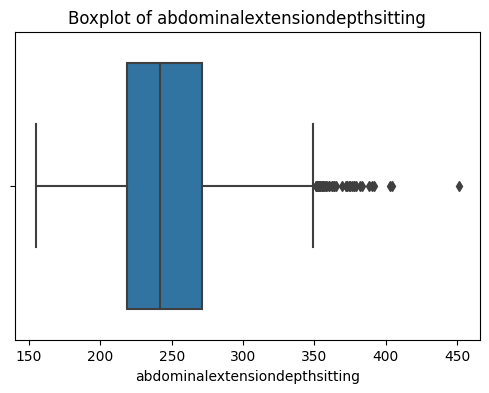

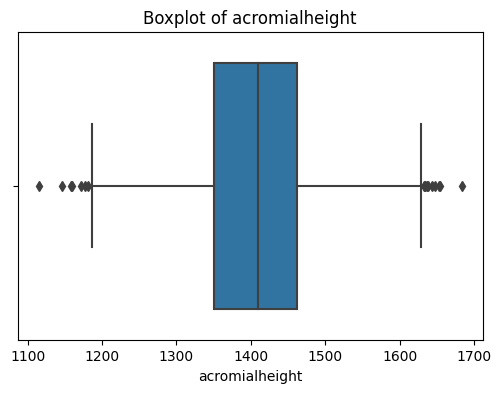

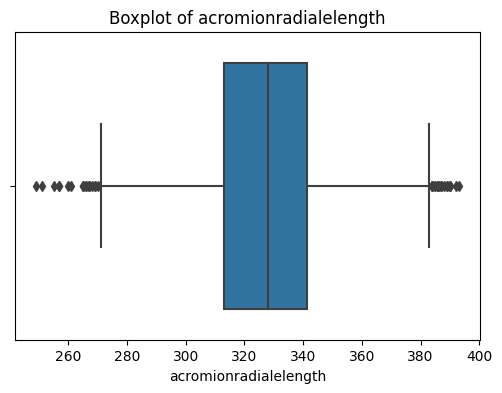

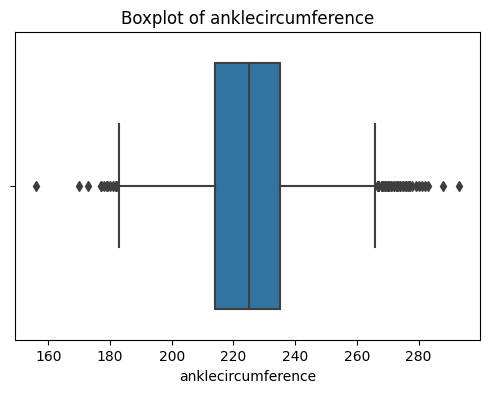

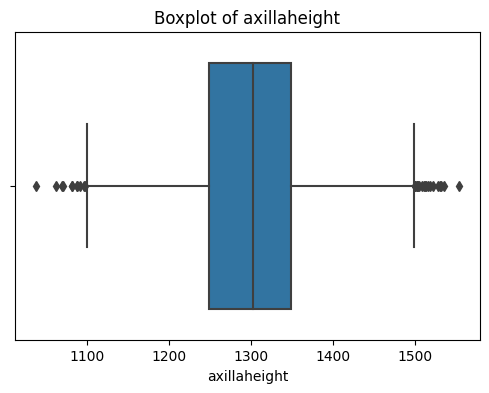

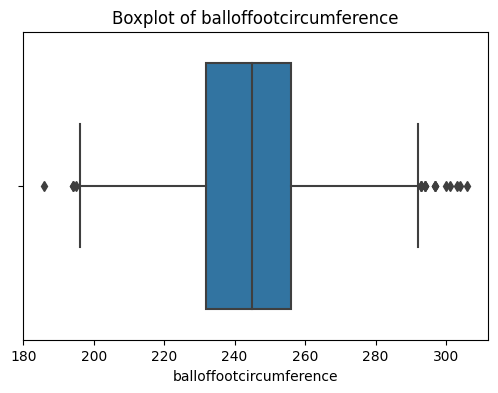

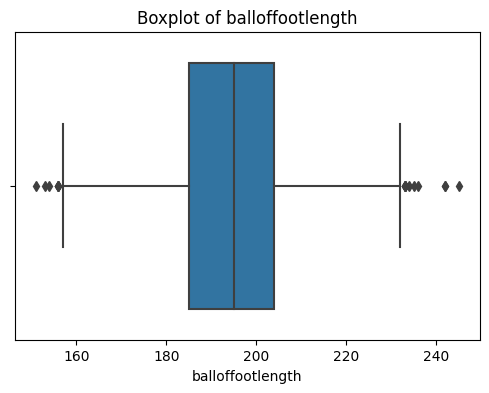

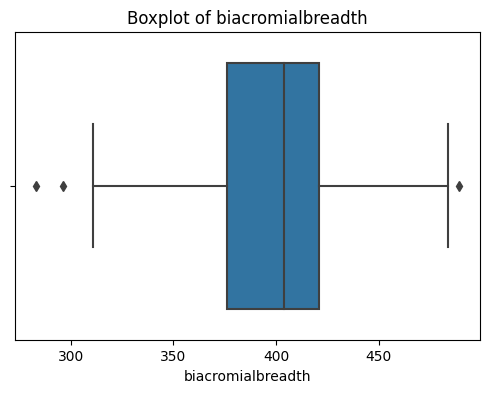

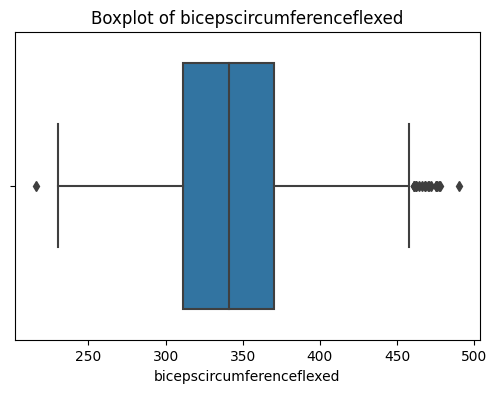

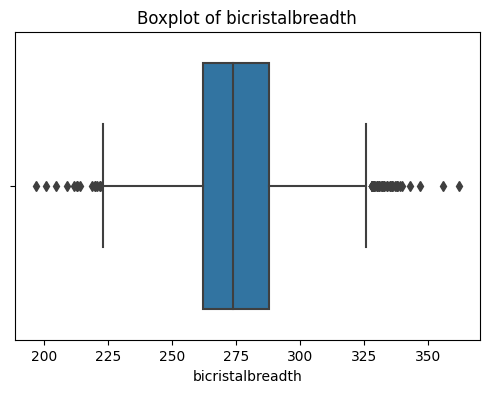

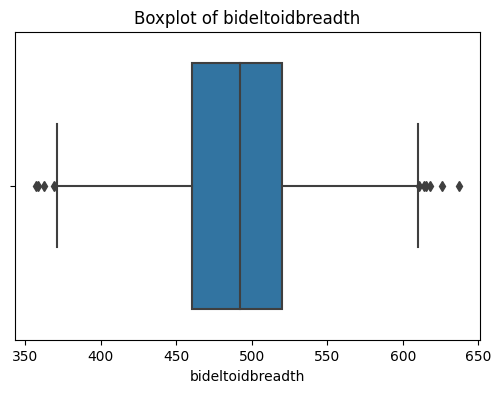

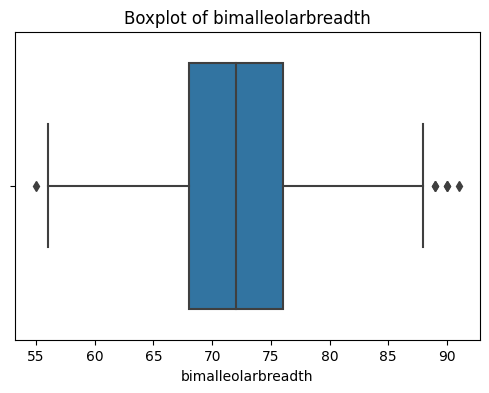

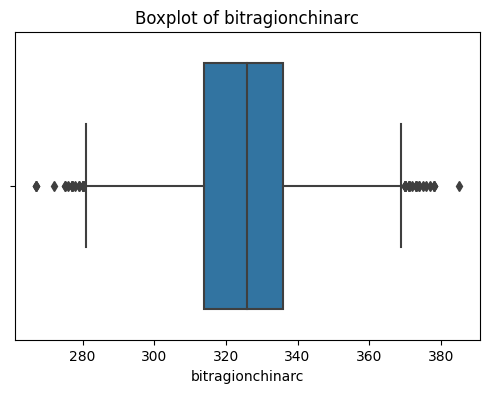

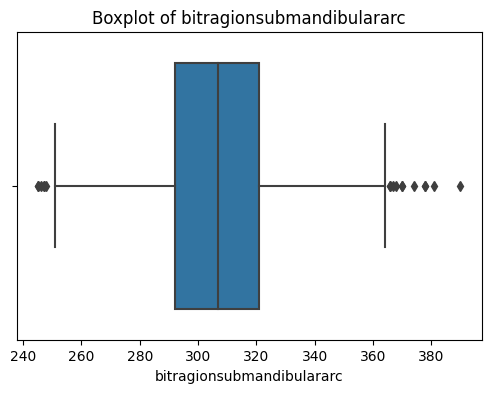

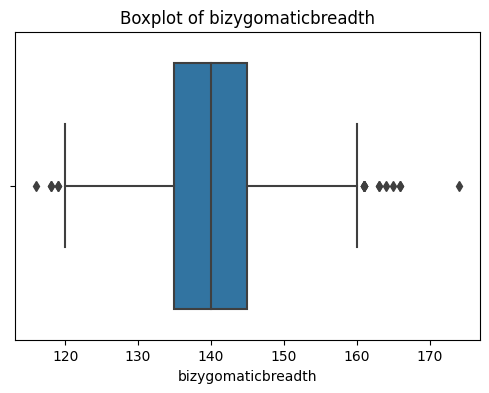

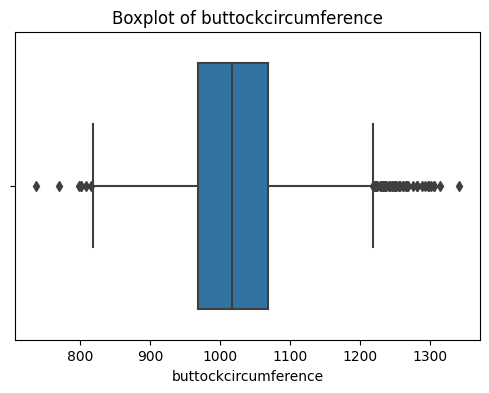

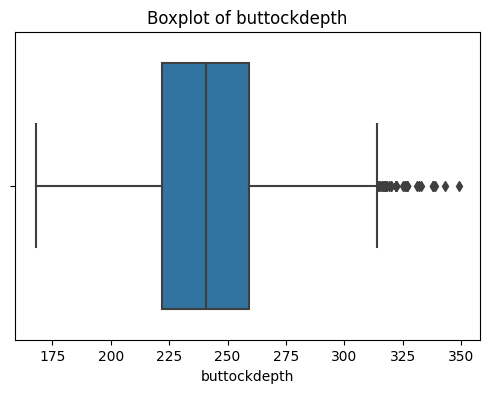

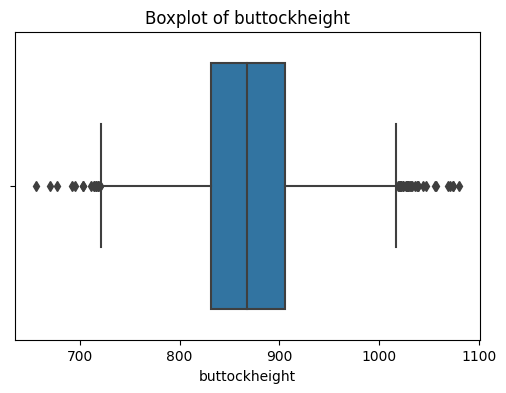

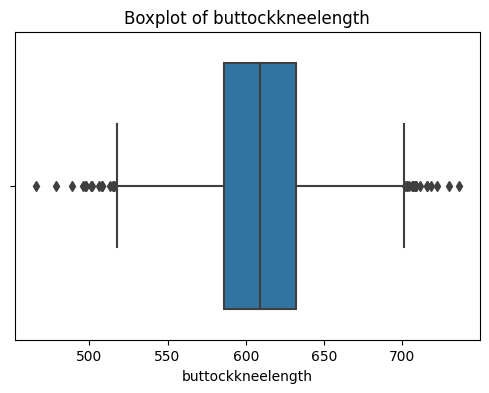

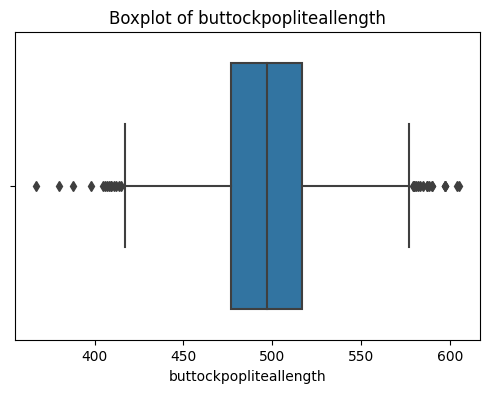

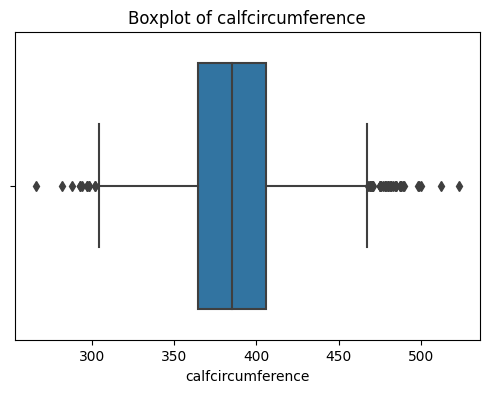

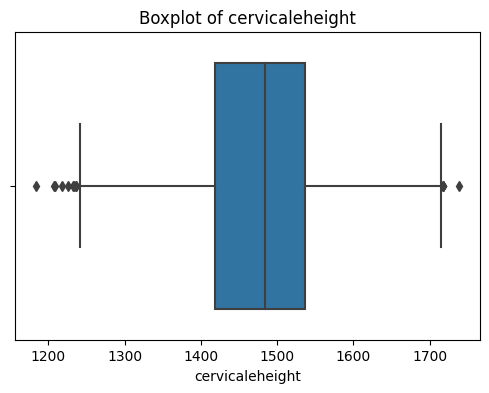

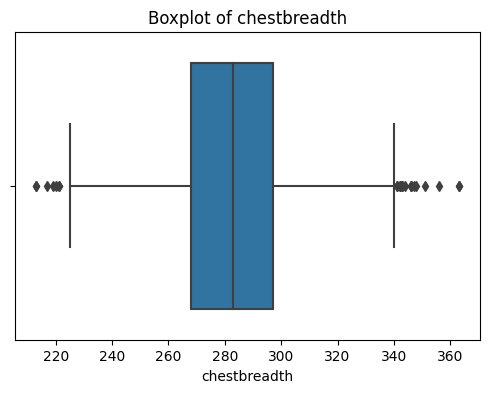

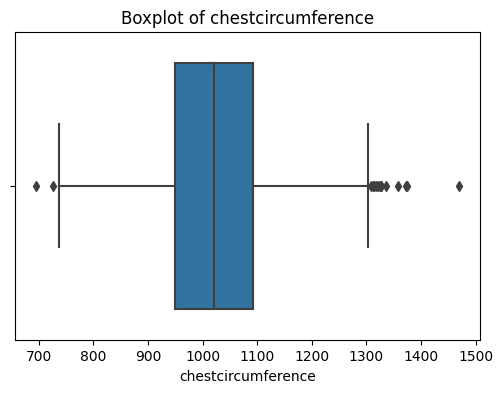

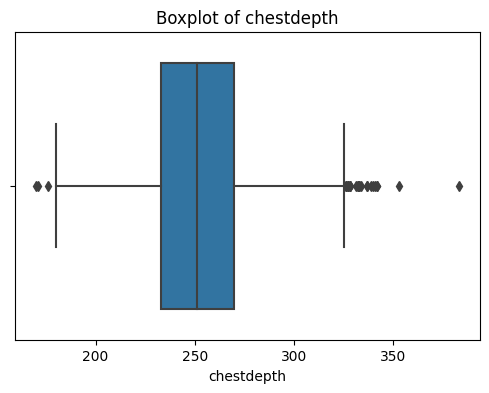

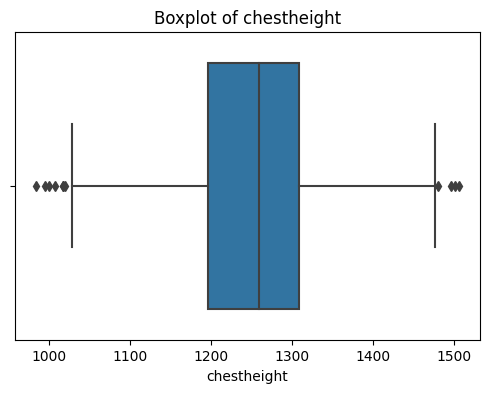

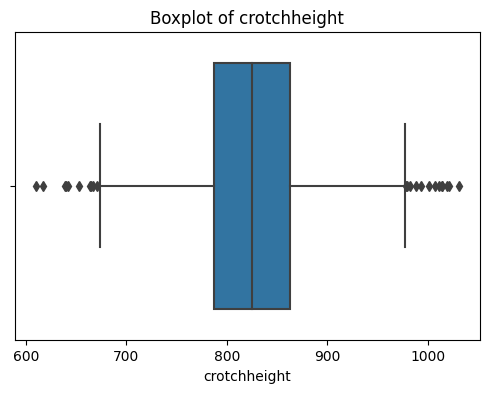

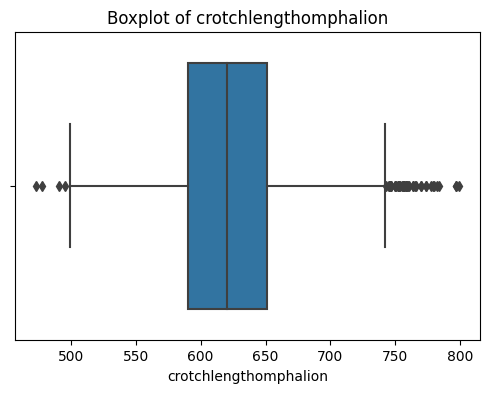

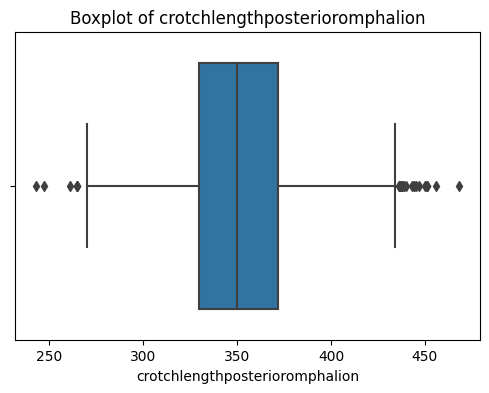

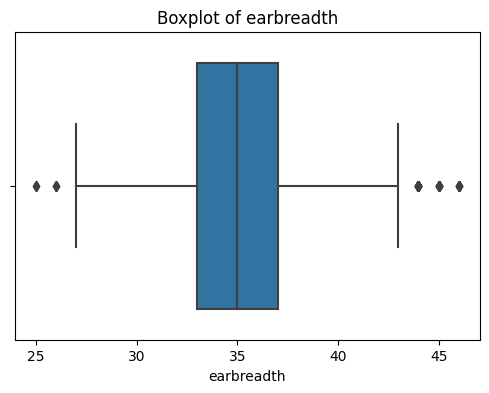

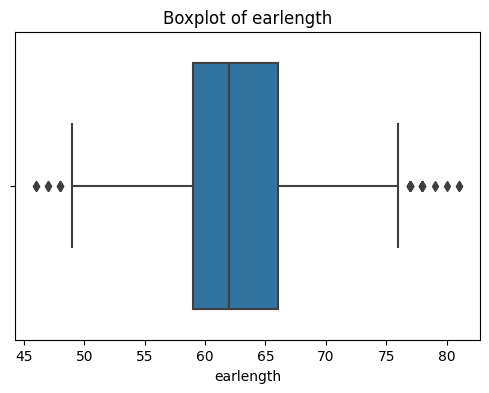

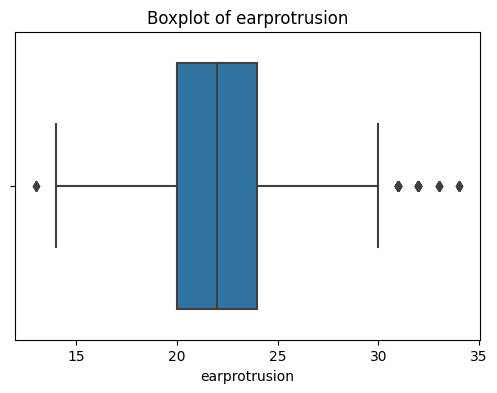

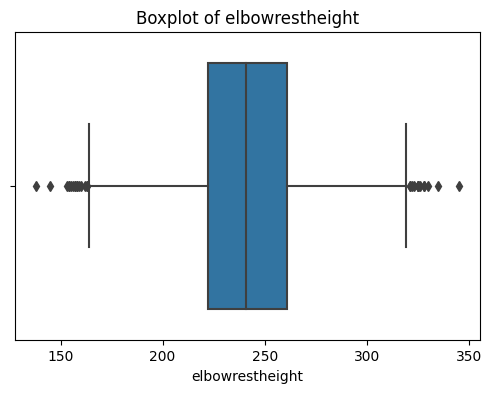

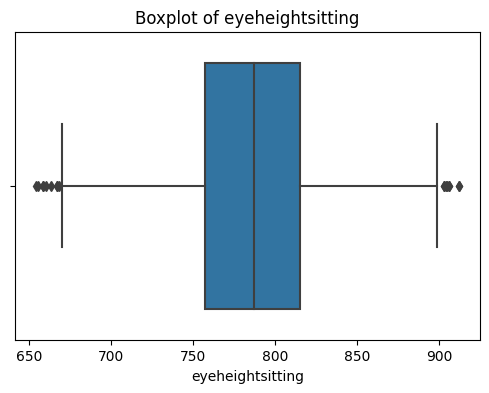

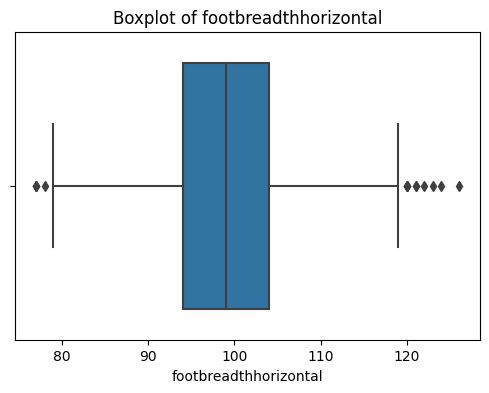

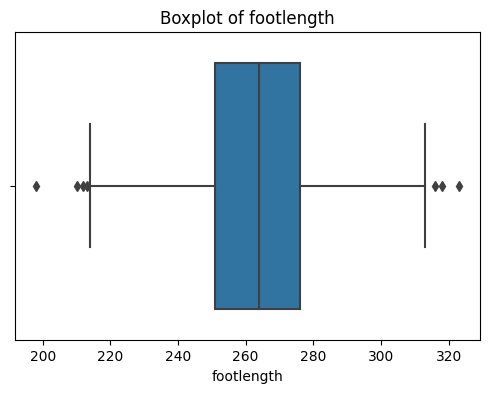

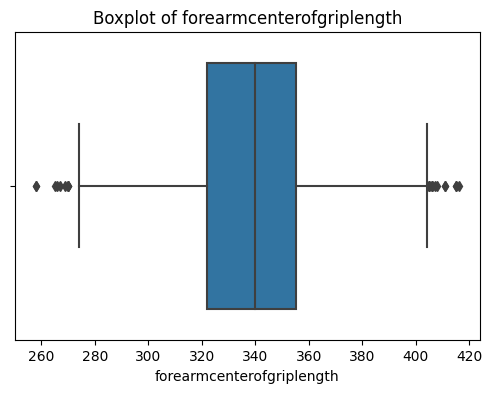

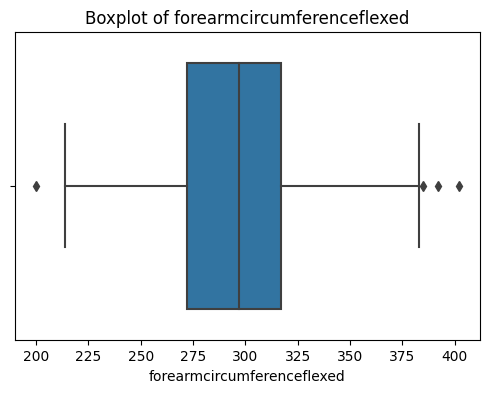

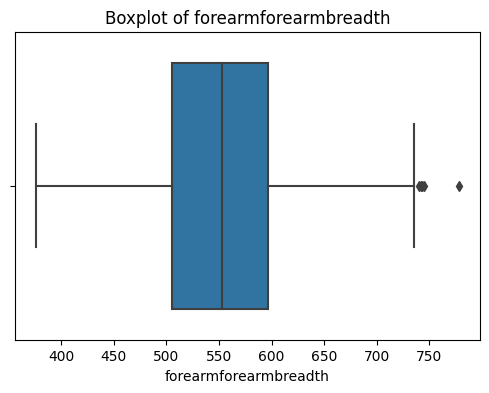

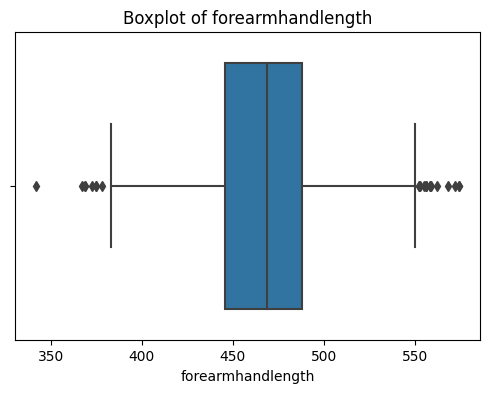

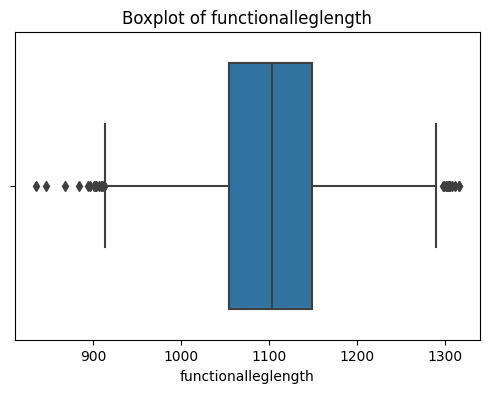

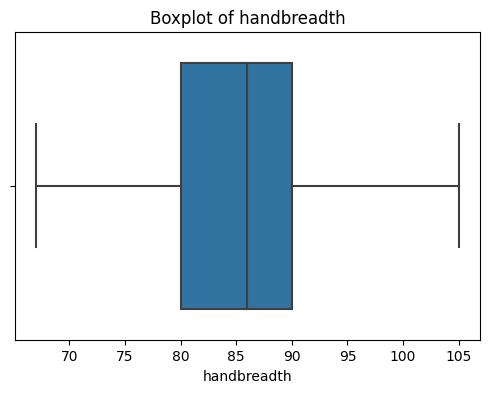

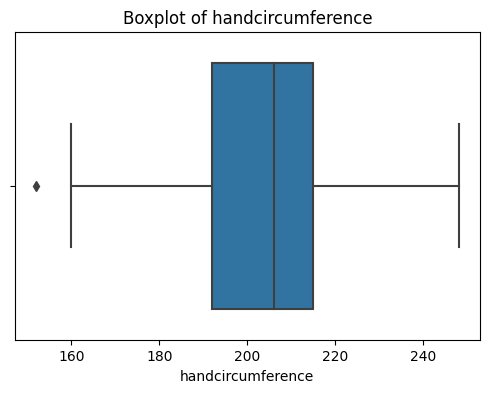

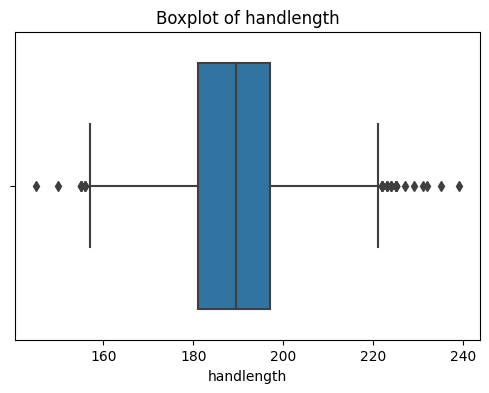

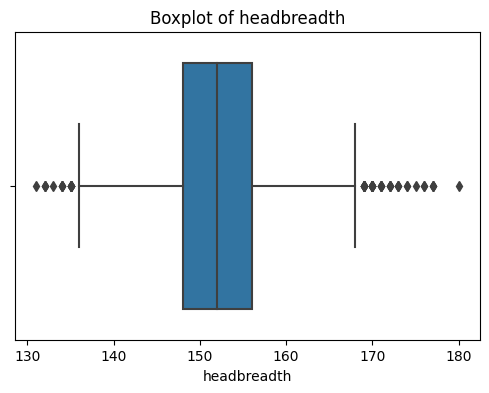

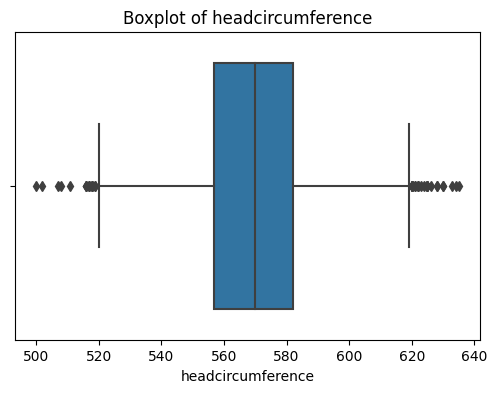

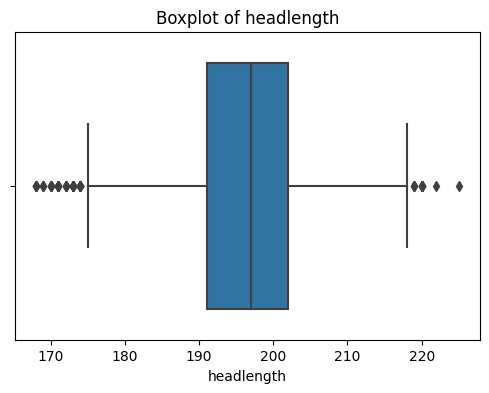

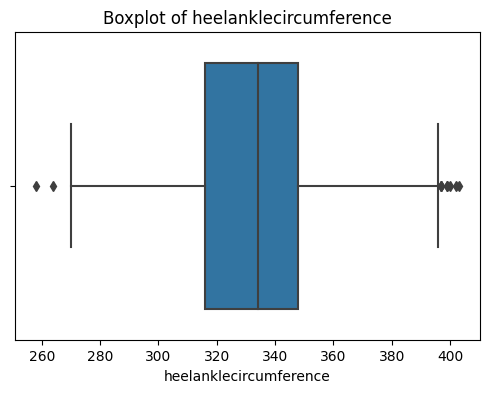

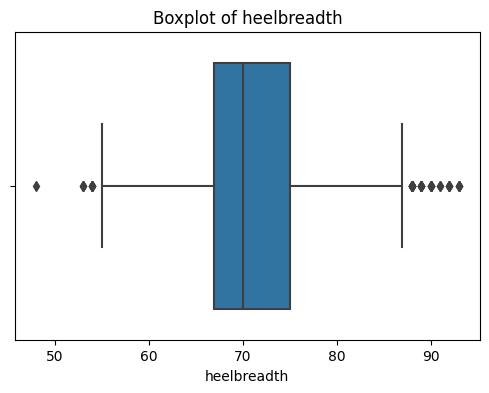

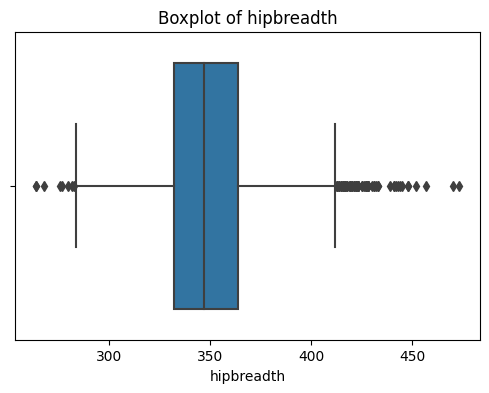

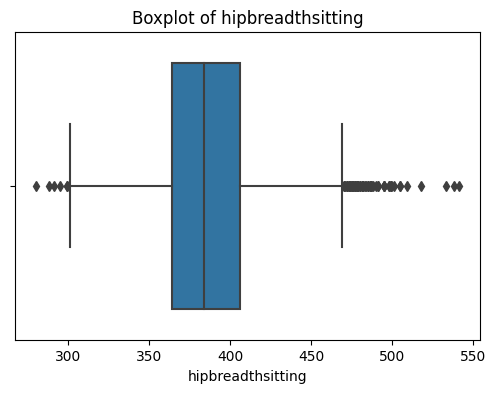

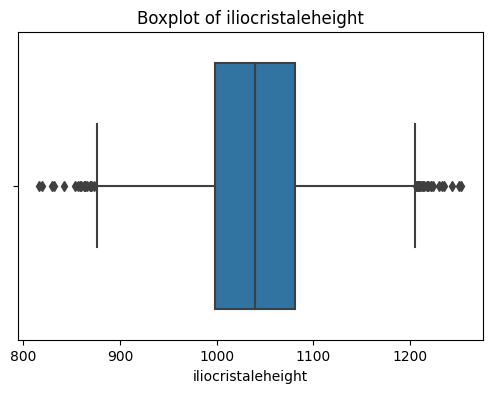

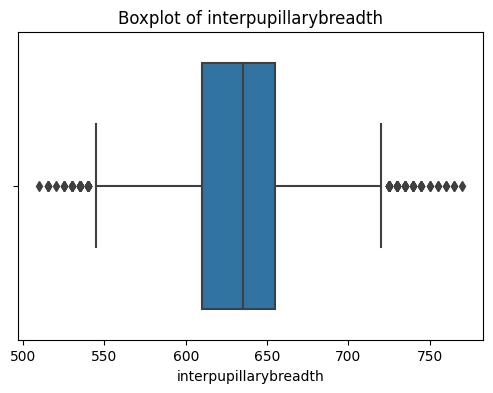

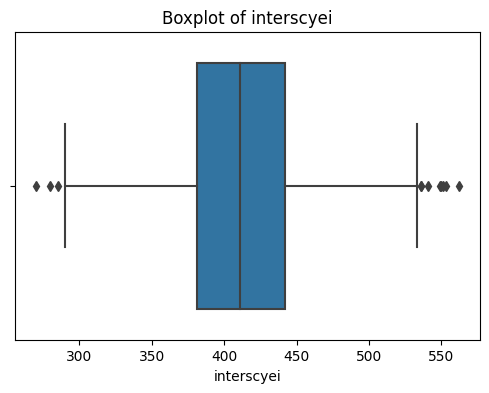

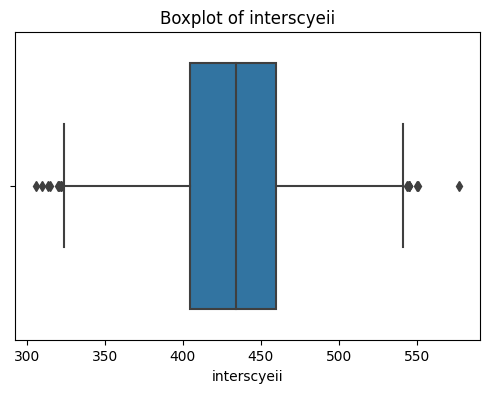

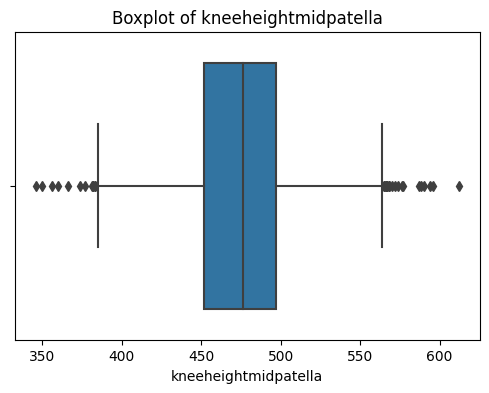

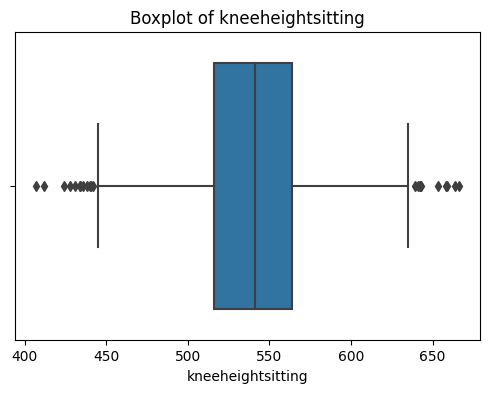

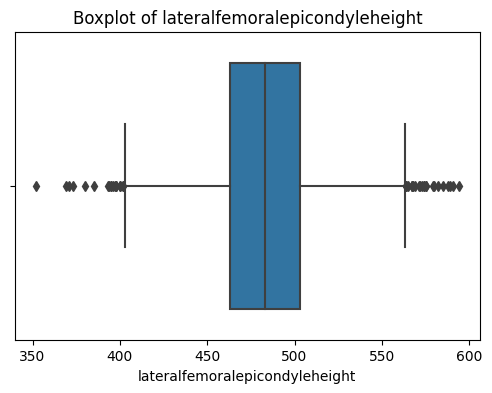

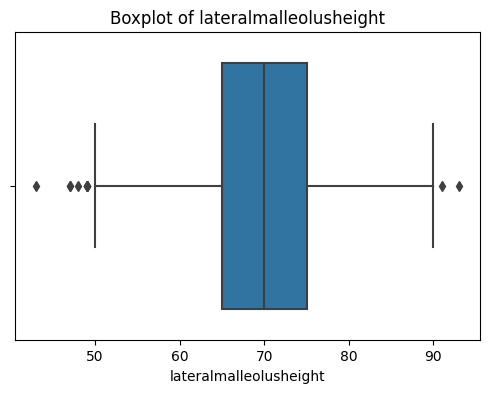

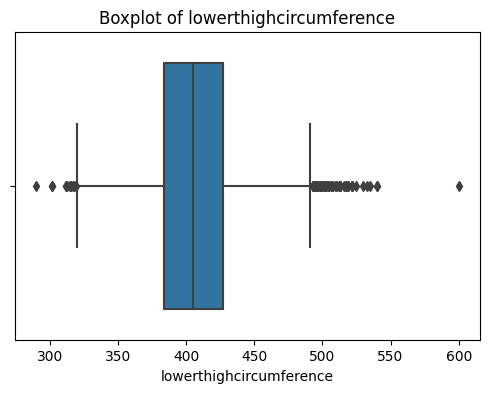

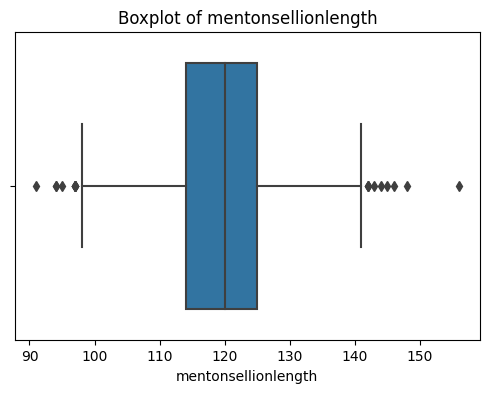

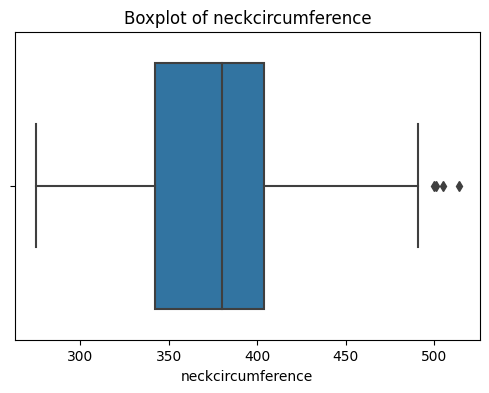

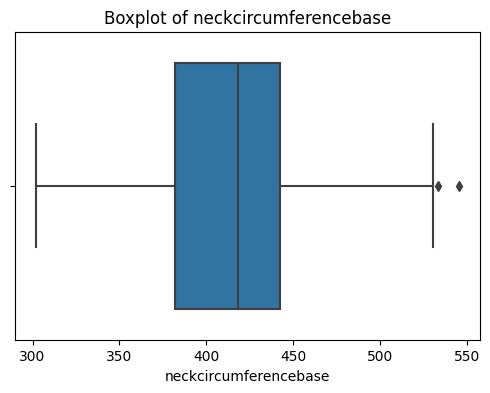

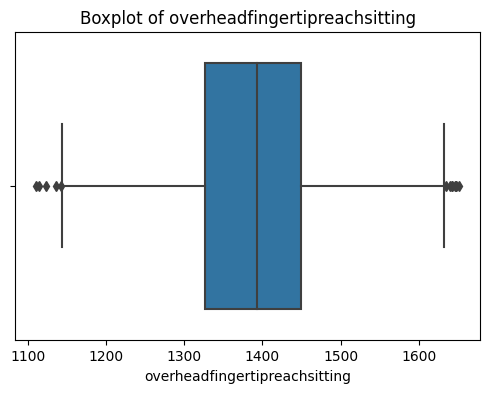

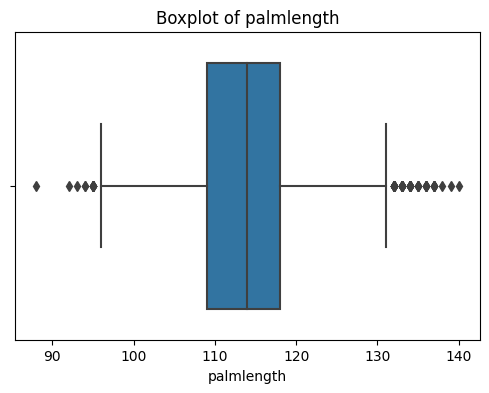

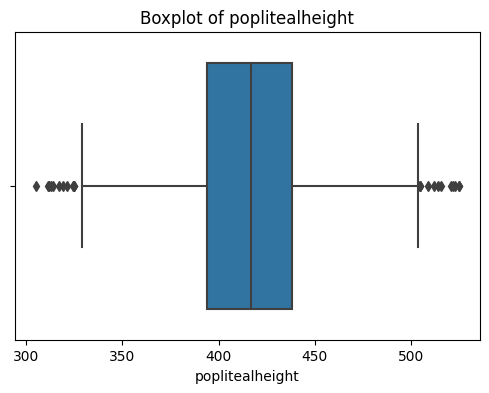

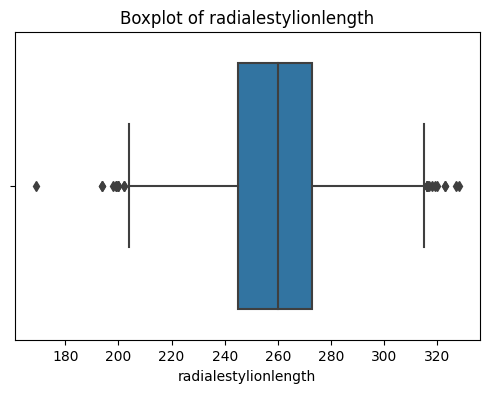

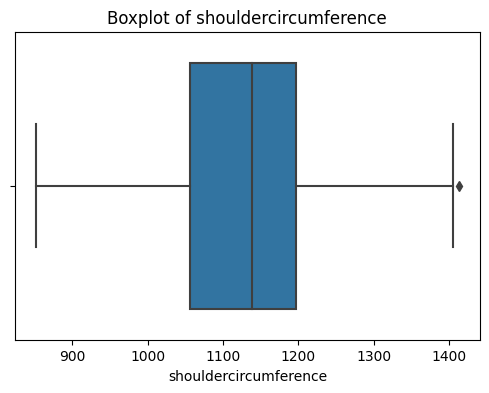

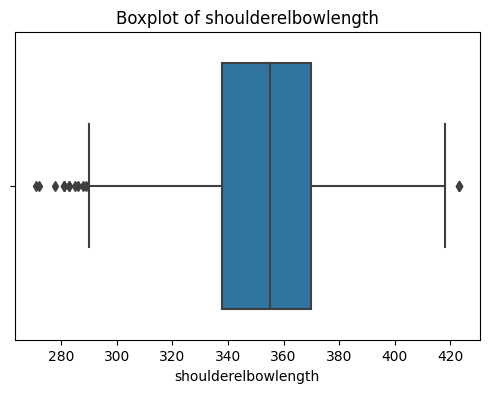

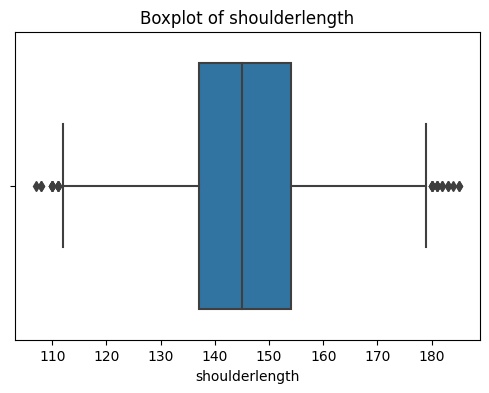

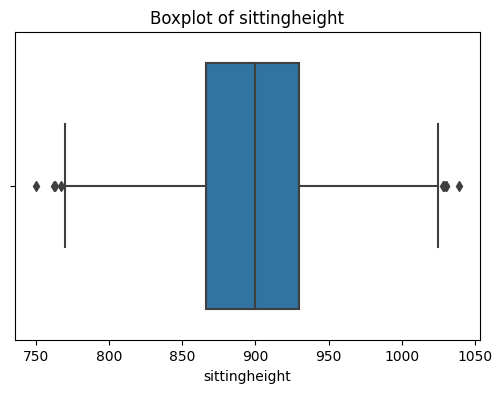

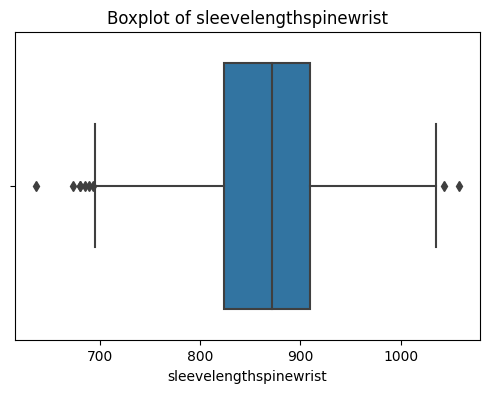

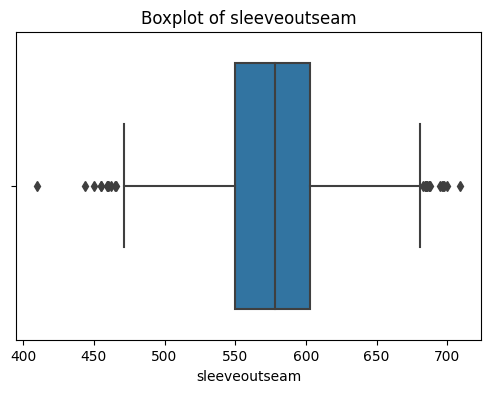

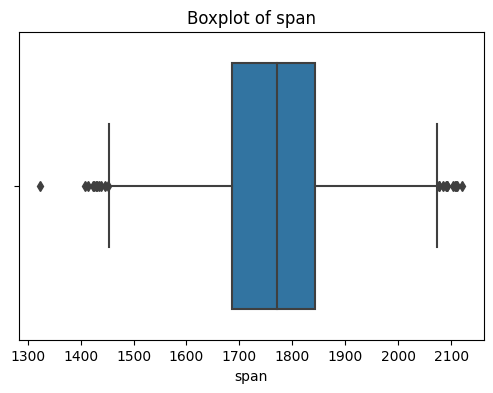

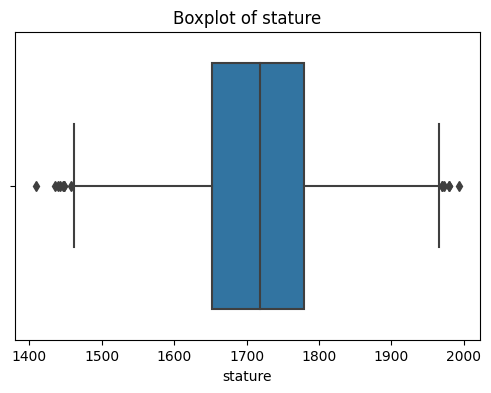

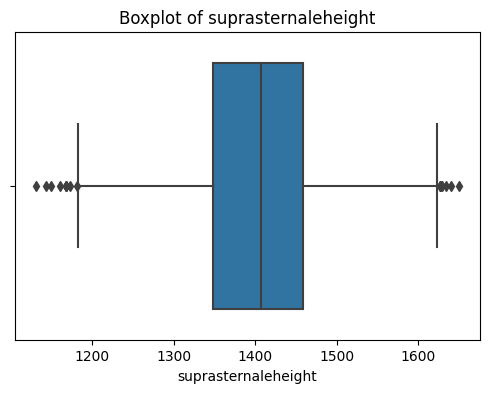

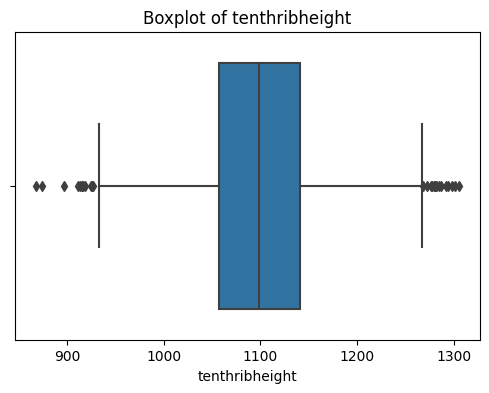

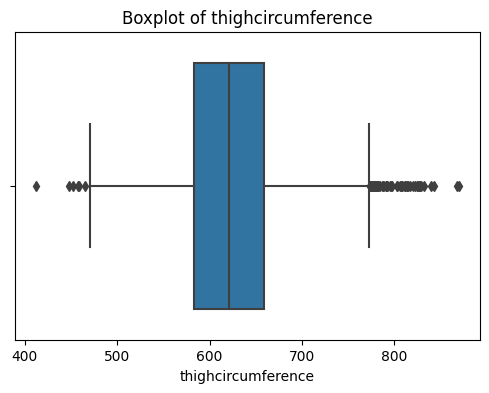

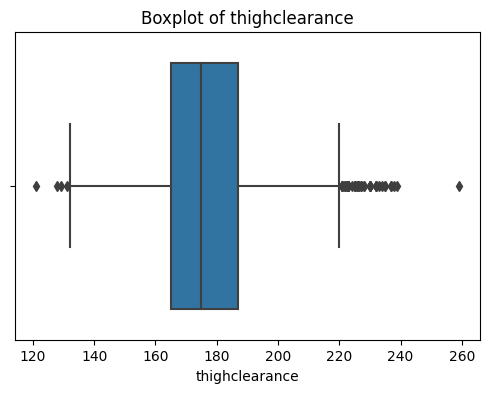

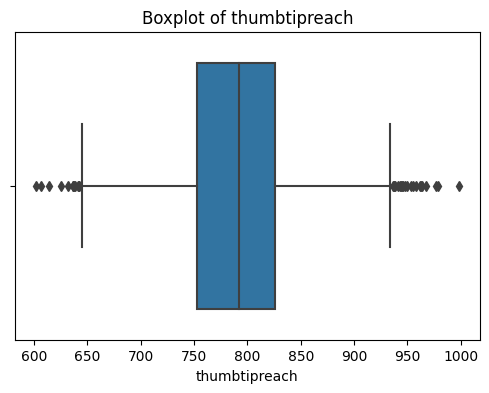

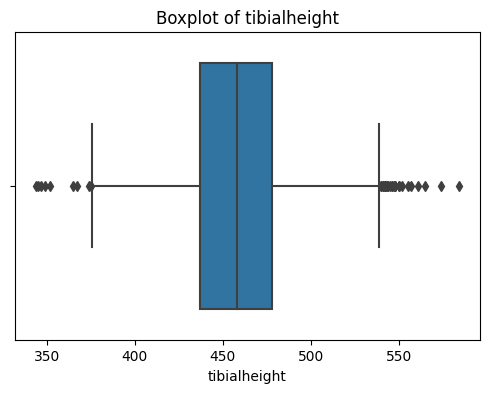

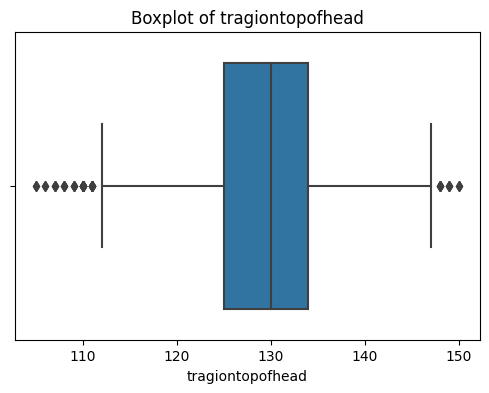

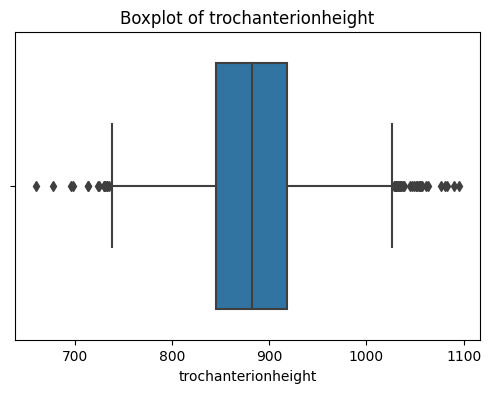

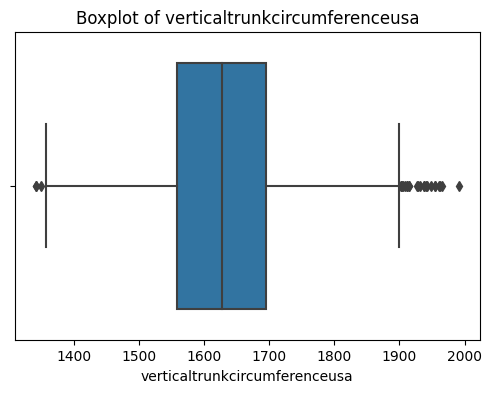

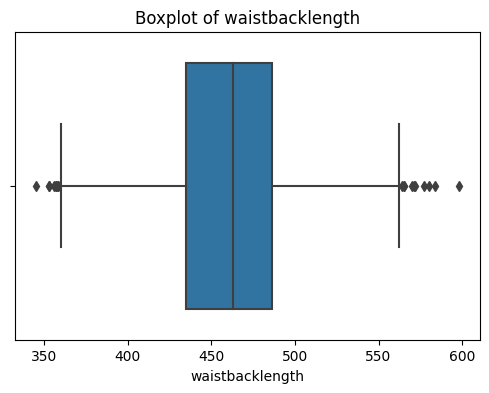

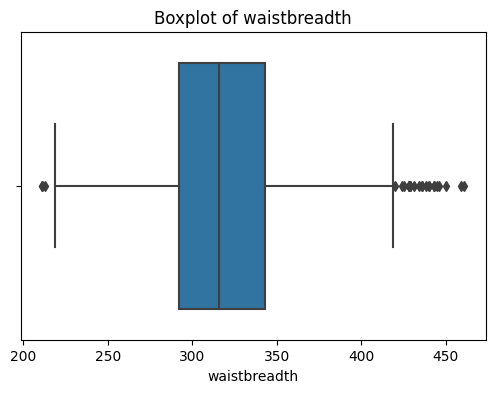

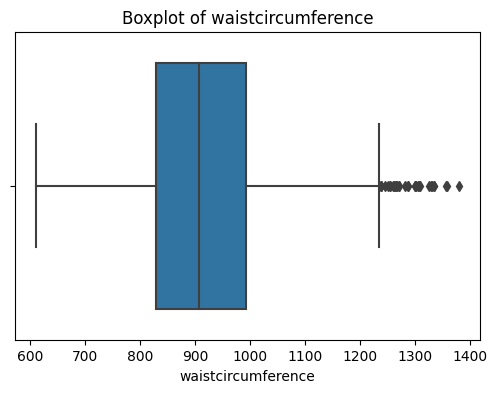

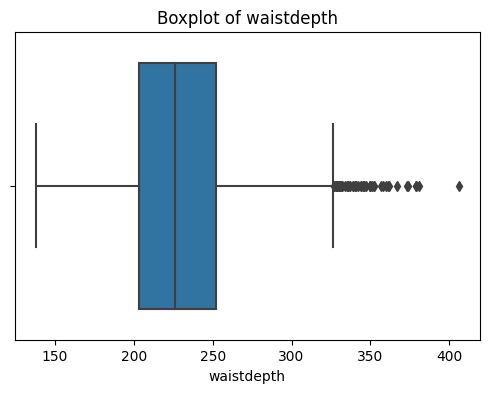

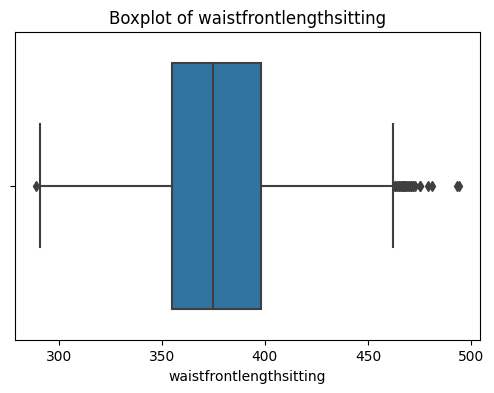

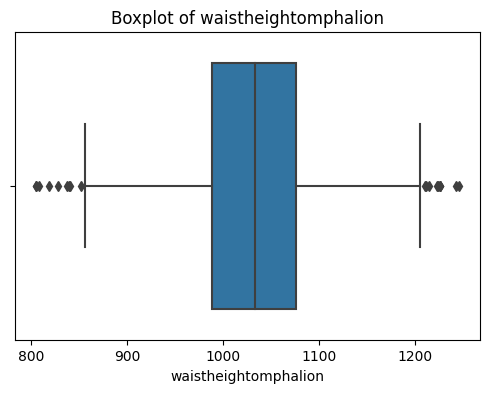

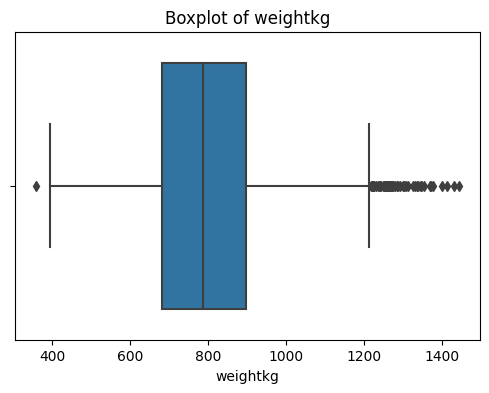

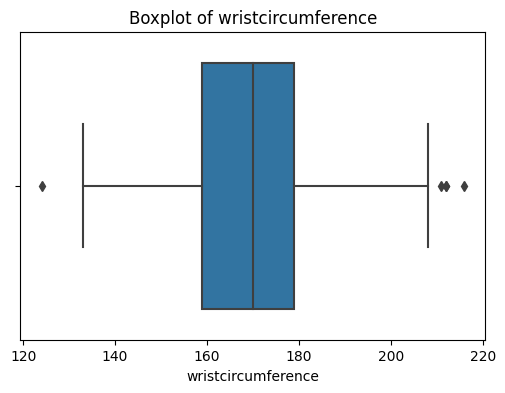

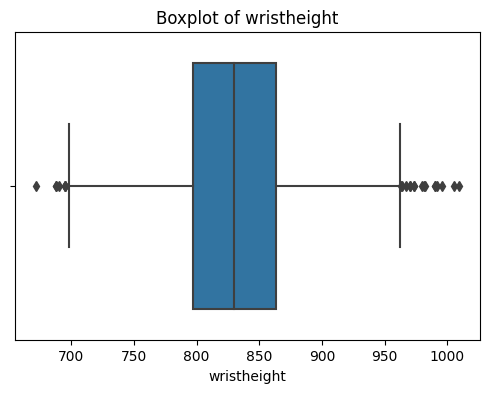

TypeError: Horizontal orientation requires numeric `x` variable.

<Figure size 600x400 with 0 Axes>

In [26]:
for col in df.columns:
    plt.figure(figsize=(6, 4)) 
    sns.boxplot(x=df[col]) 
    plt.title(f'Boxplot of {col}')
    plt.show()

Since all data are real values, it is normal to have many outliers. But very extreme values will be deleted so that the model can learn better.

In [27]:
df = df[df.waistdepth<390]
df = df[df.thighclearance<240]
df = df[df.span>1390]
df = df[df.sleeveoutseam>440]
df = df[df.sleevelengthspinewrist>650]
df = df[df.radialestylionlength>180]
df = df[df.mentonsellionlength<150]
df = df[df.lowerthighcircumference<550]
df = df[df.interscyeii<560]
df = df[df.heelbreadth>50]
df = df[df.handcircumference>150]
df = df[df.forearmhandlength>350]
df = df[df.forearmforearmbreadth<750]
df = df[df.footlength>210]
df = df[df.chestdepth<360]
df = df[df.chestcircumference<1400]
df = df[df.bizygomaticbreadth<170]
df = df[df.anklecircumference>160]
df = df[df.abdominalextensiondepthsitting<420]

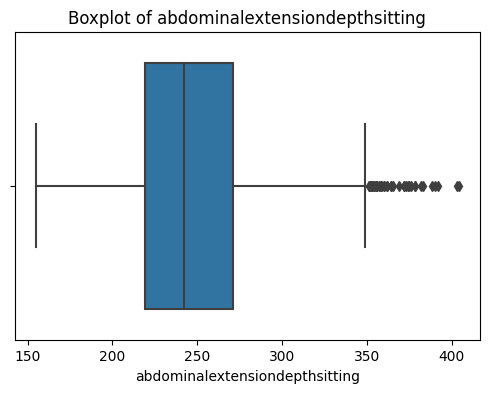

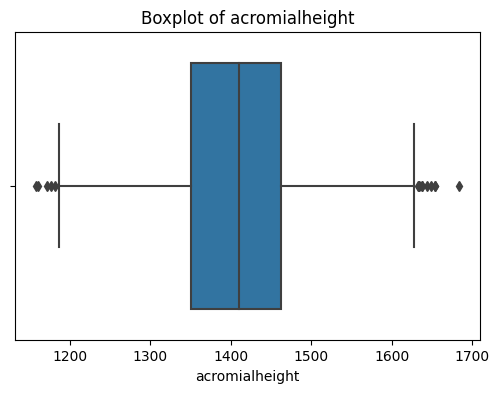

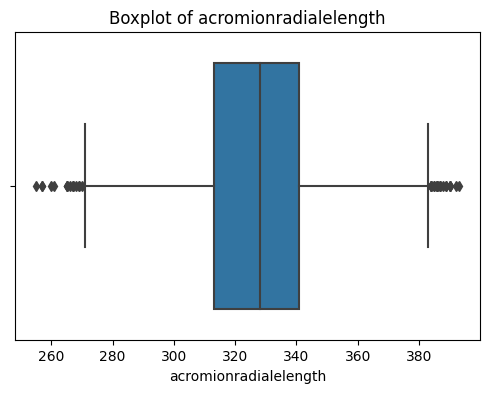

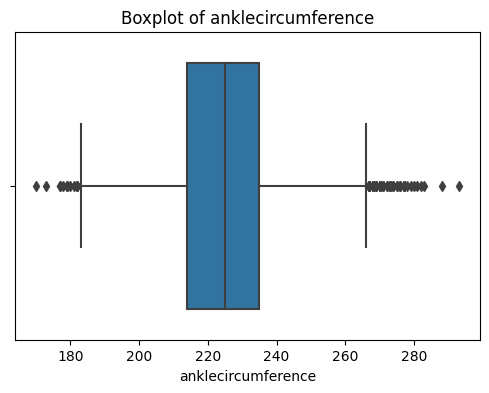

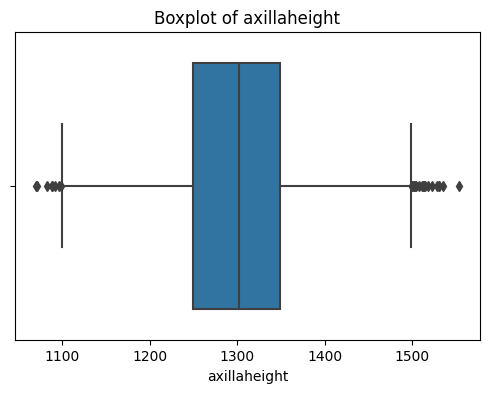

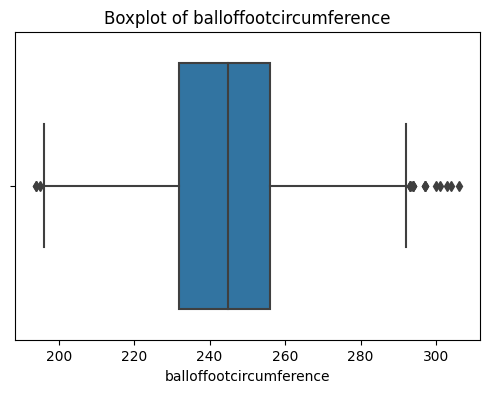

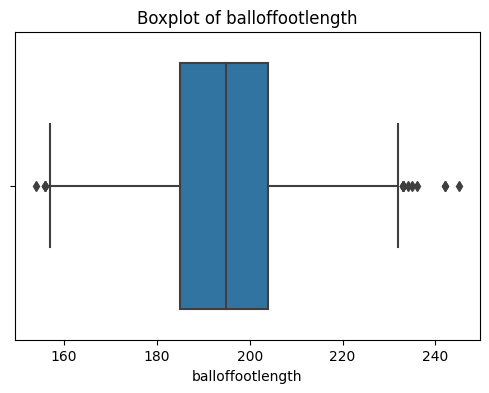

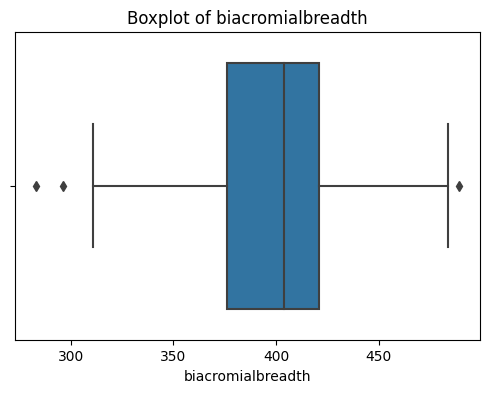

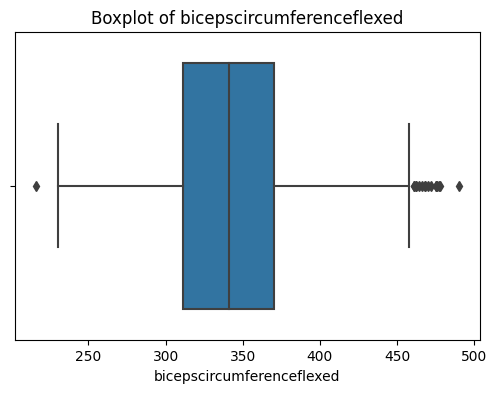

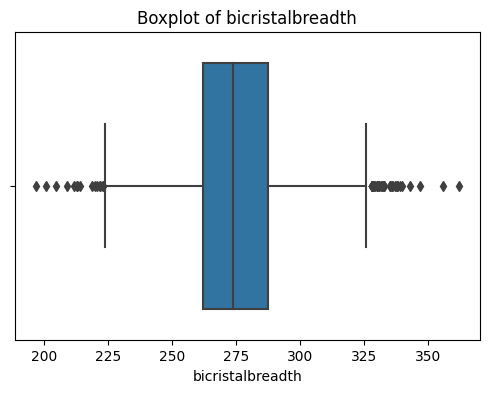

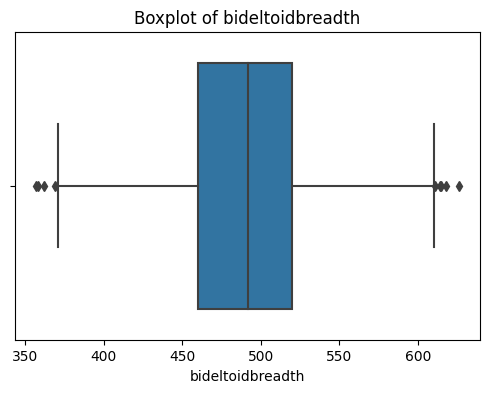

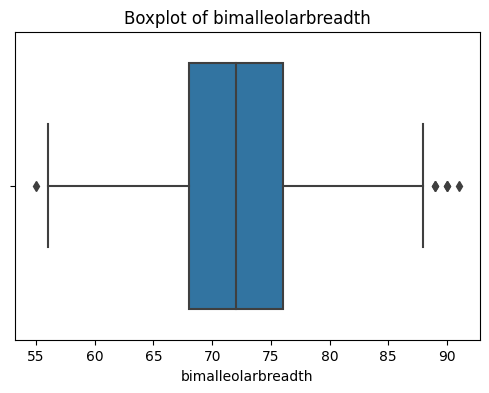

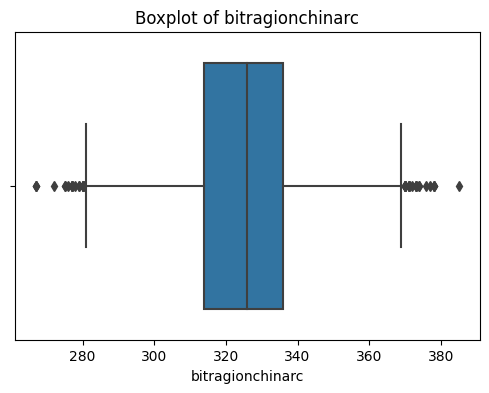

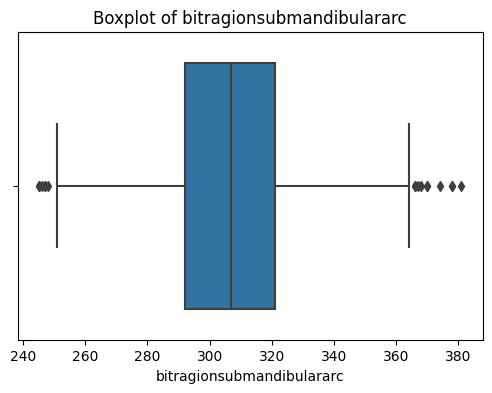

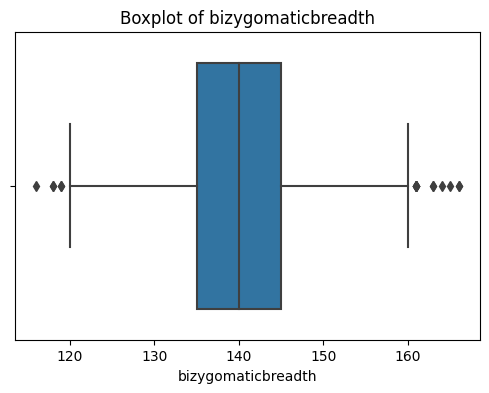

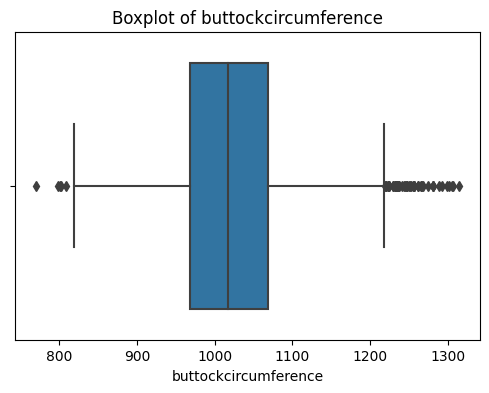

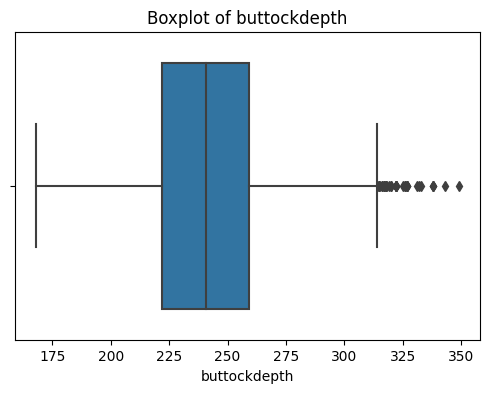

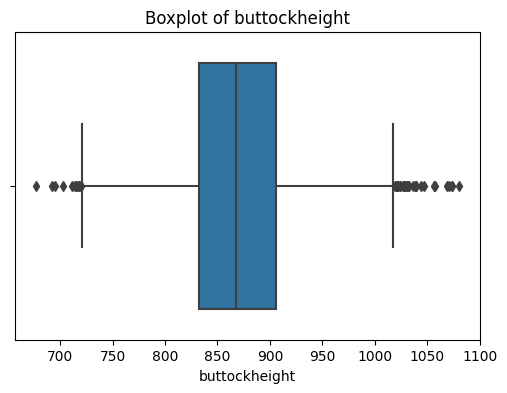

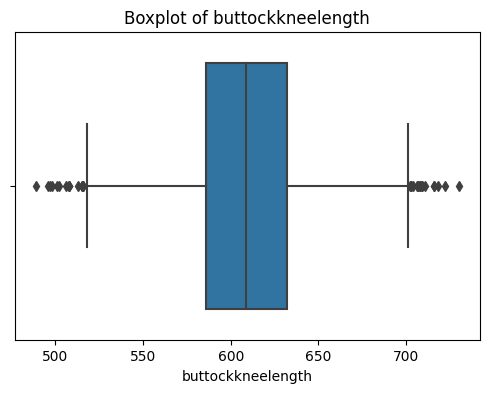

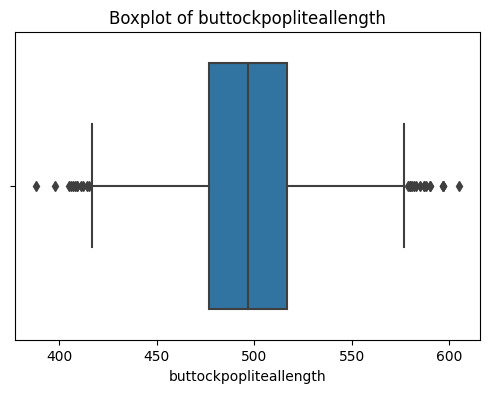

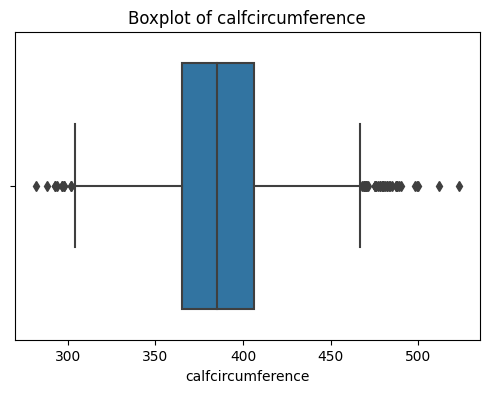

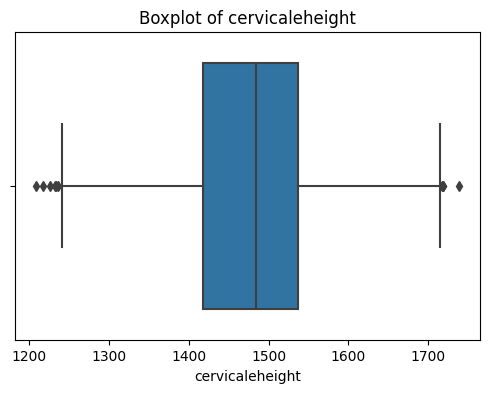

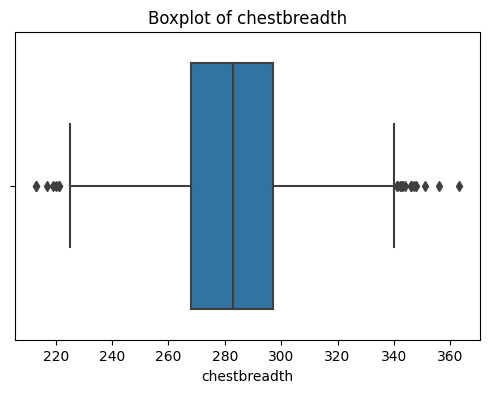

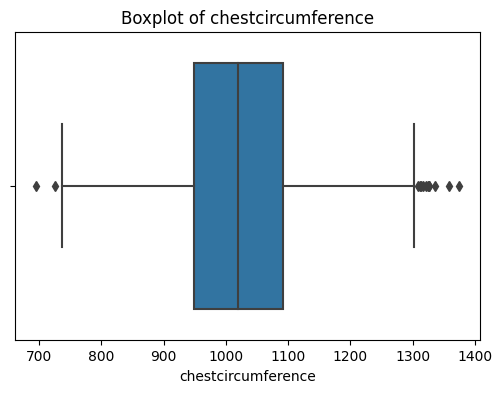

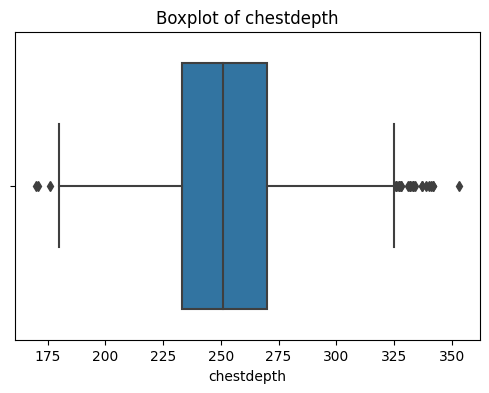

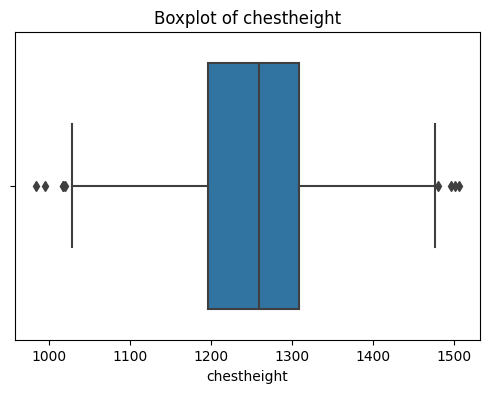

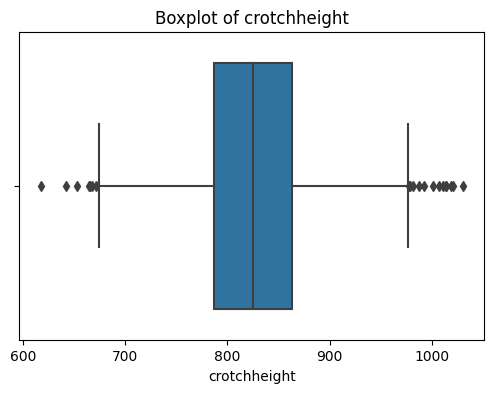

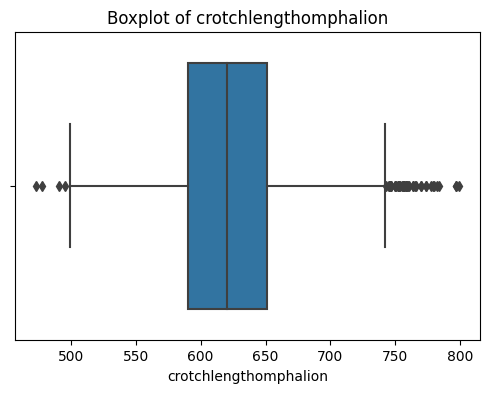

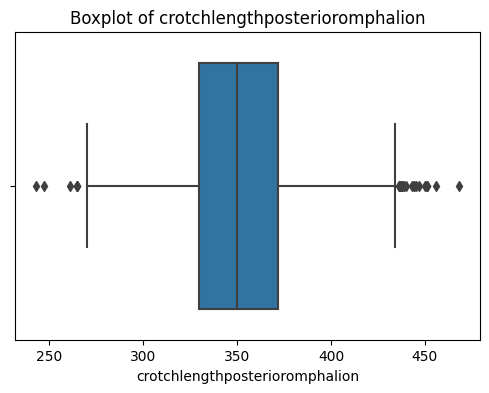

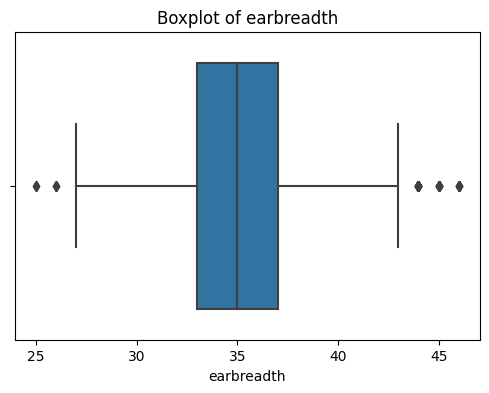

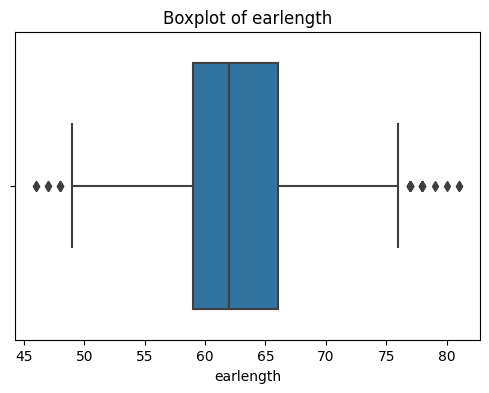

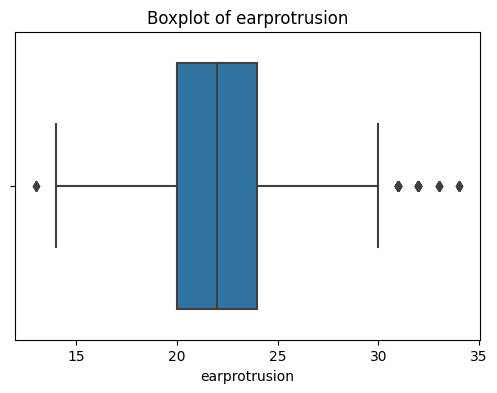

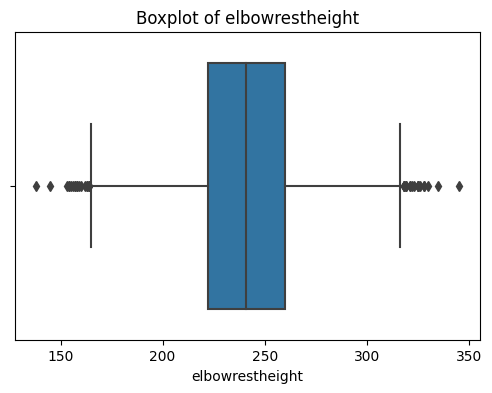

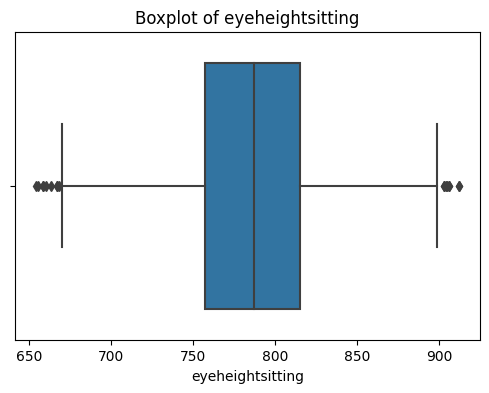

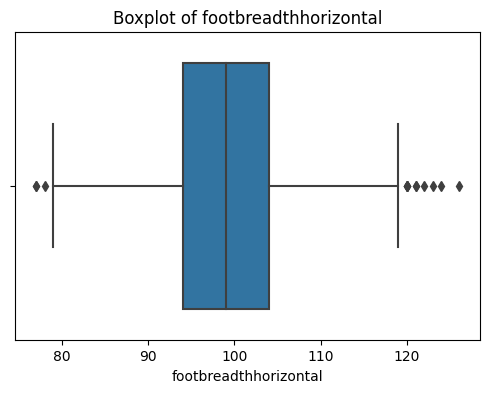

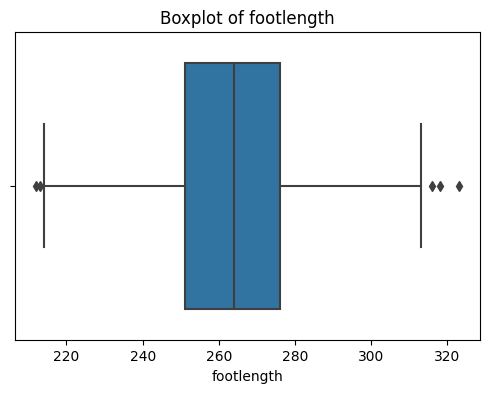

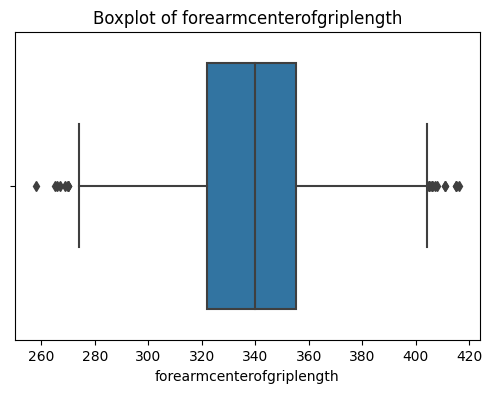

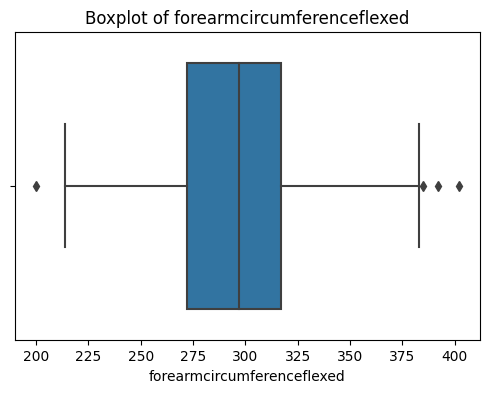

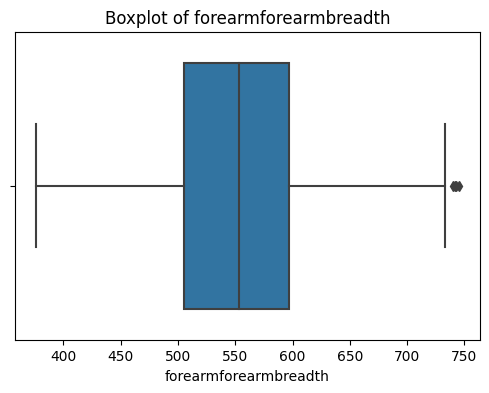

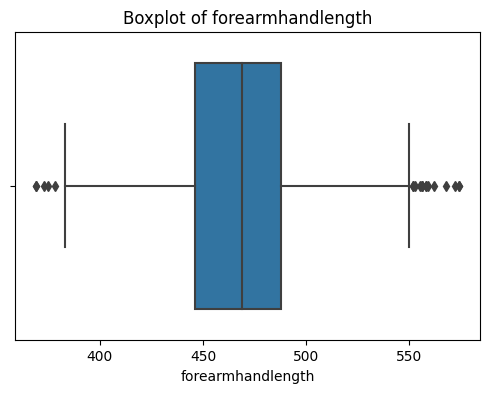

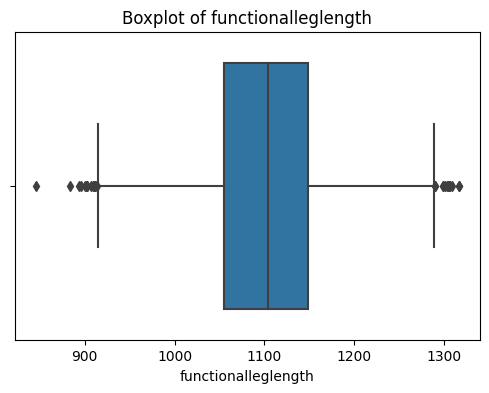

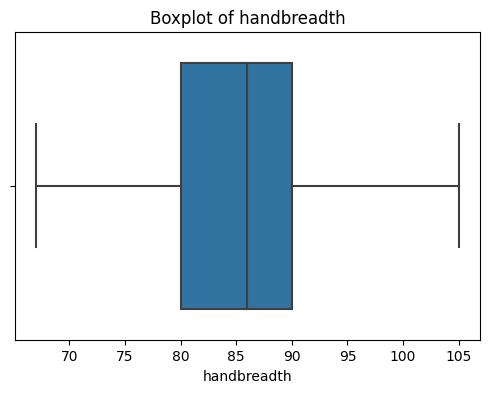

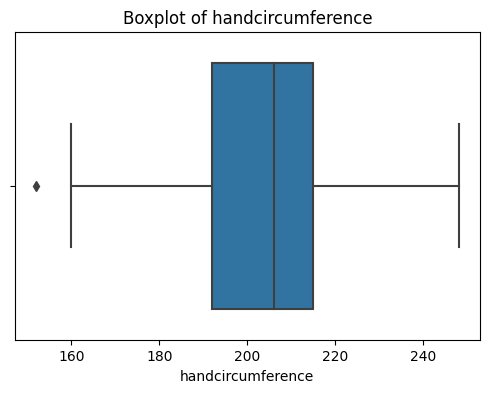

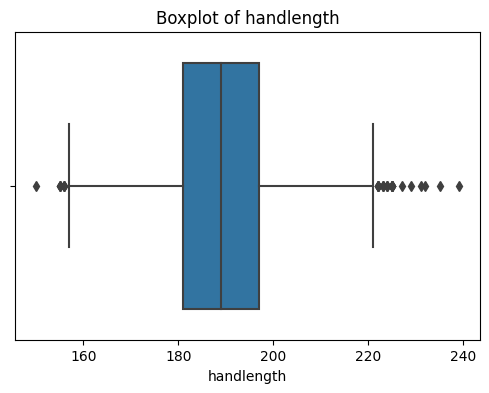

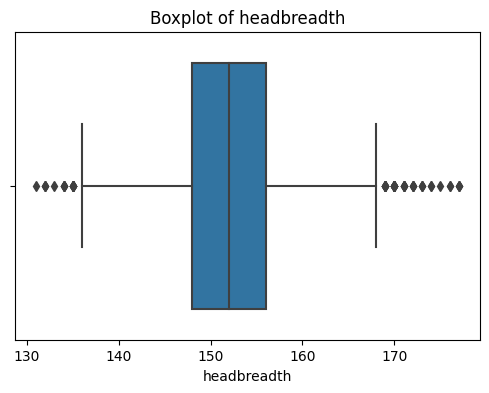

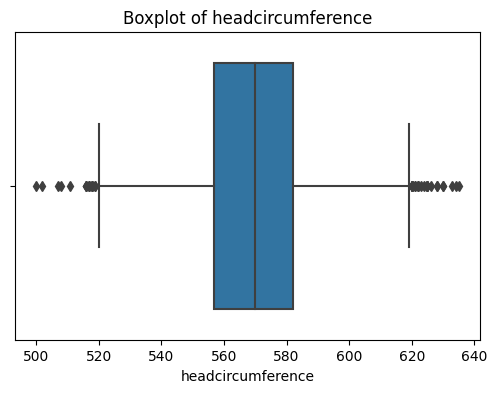

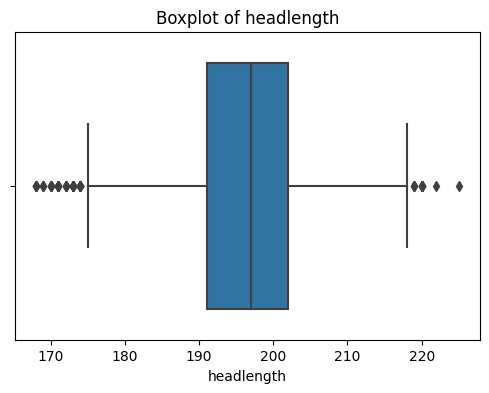

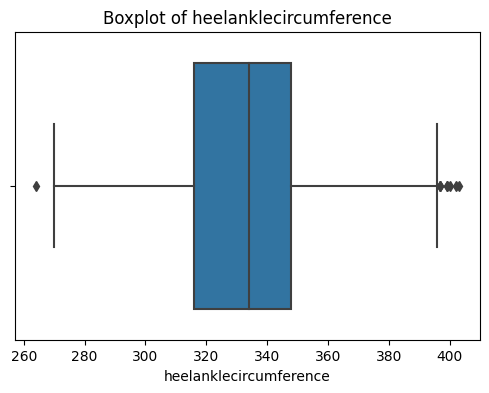

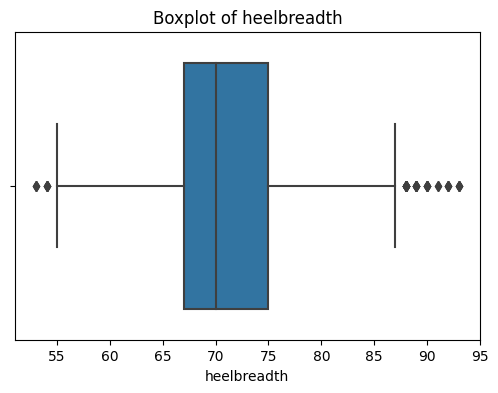

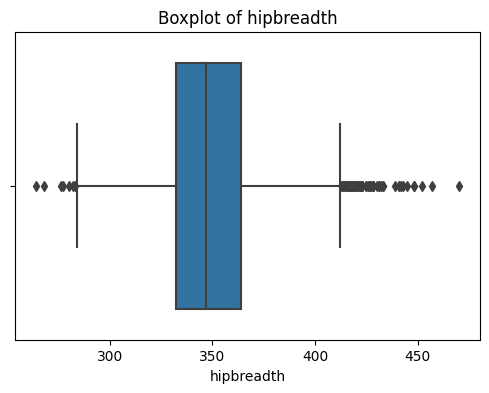

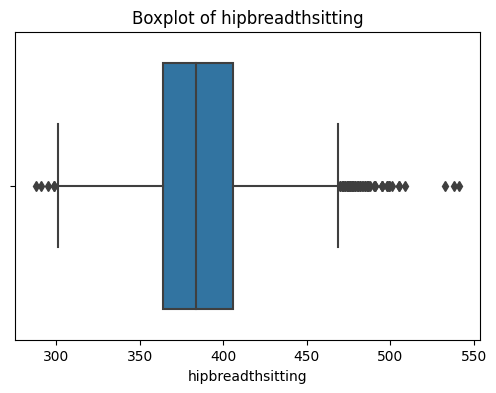

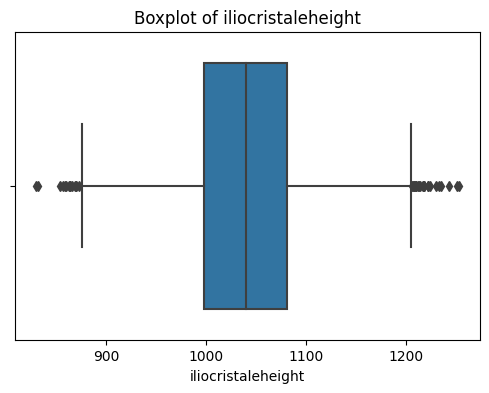

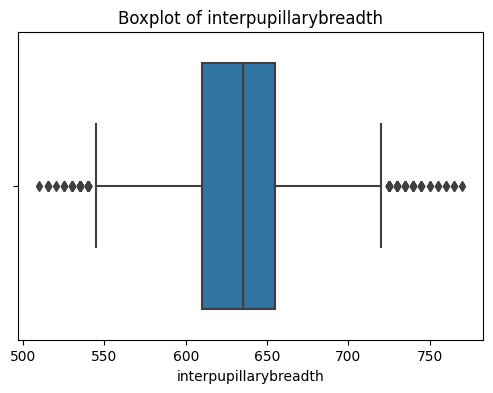

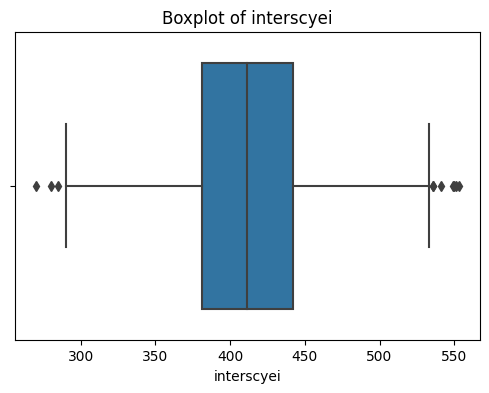

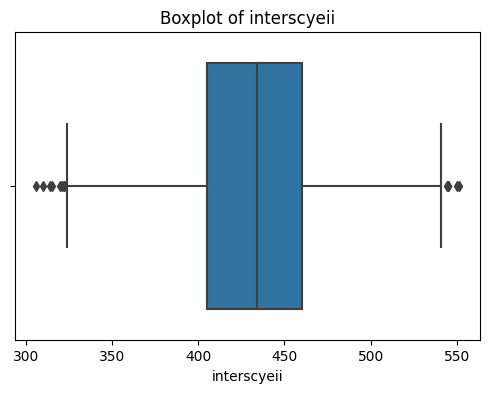

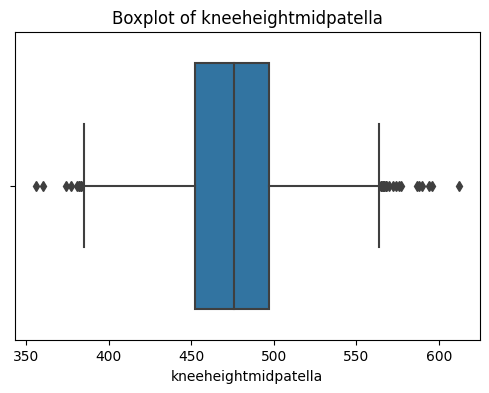

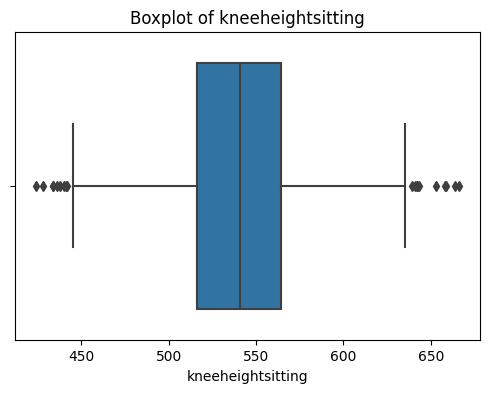

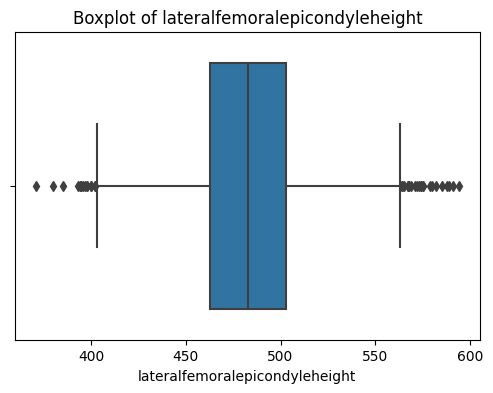

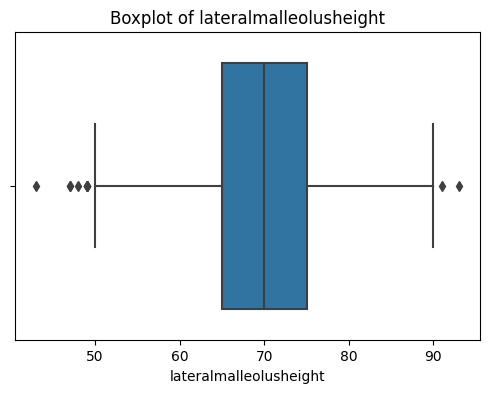

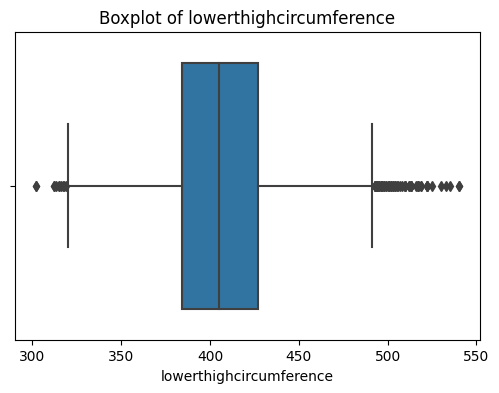

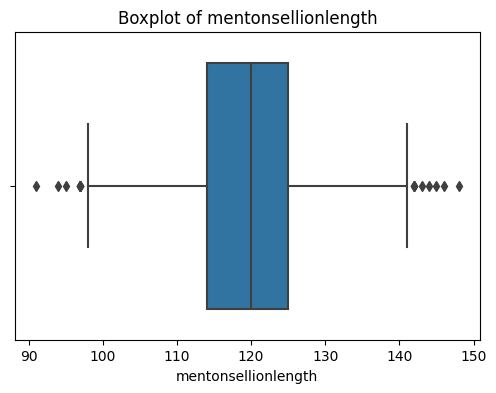

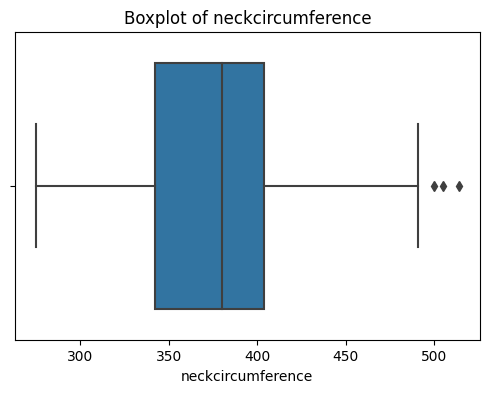

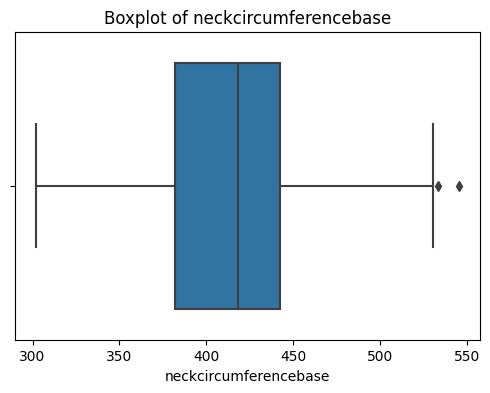

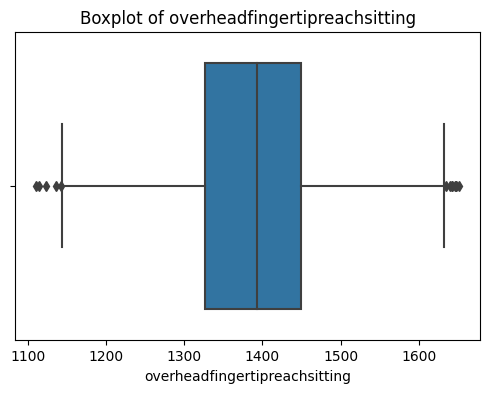

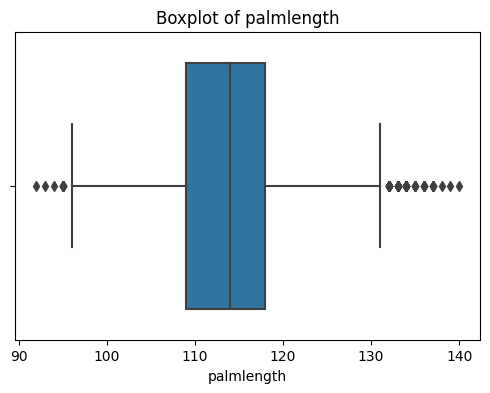

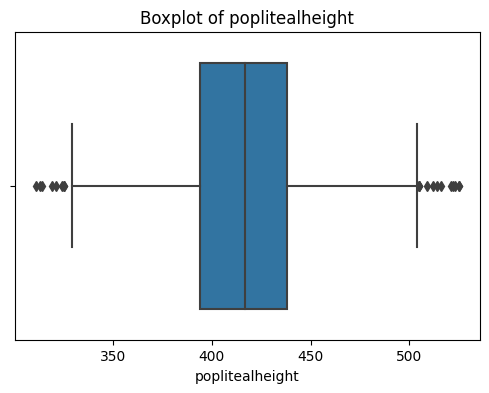

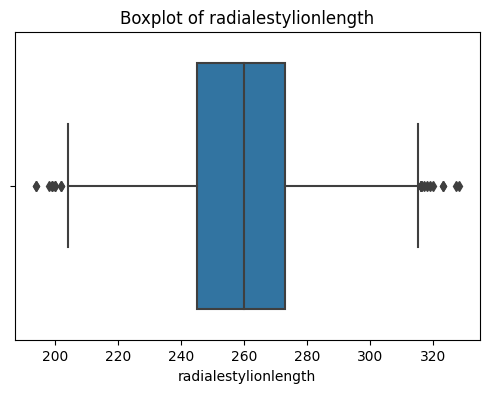

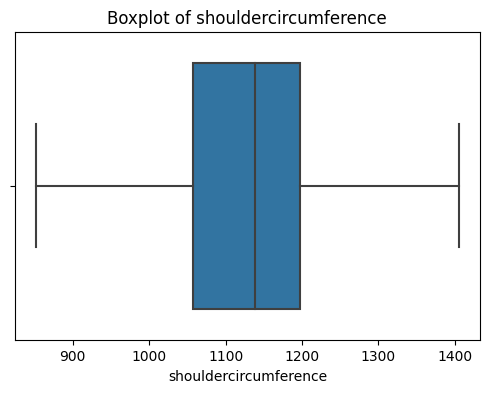

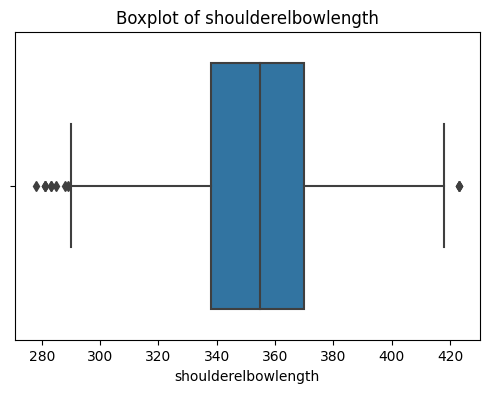

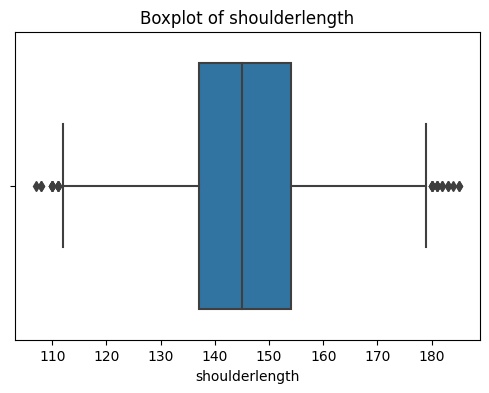

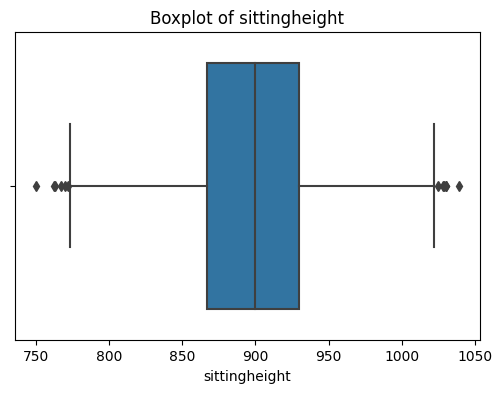

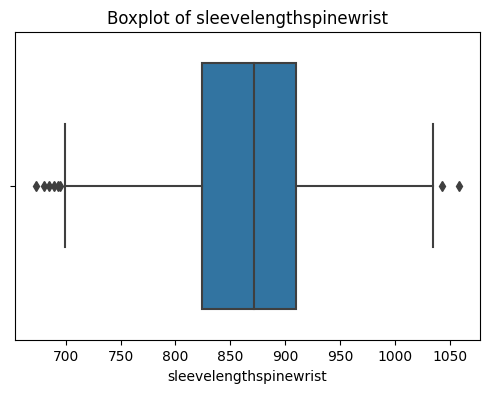

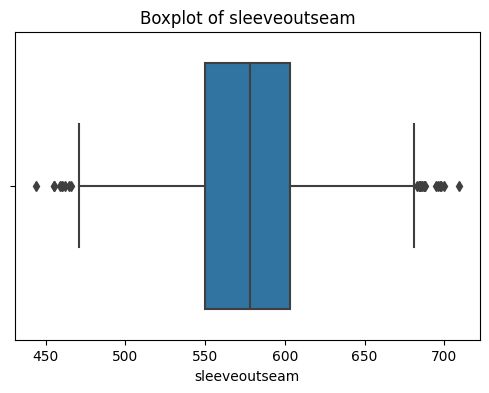

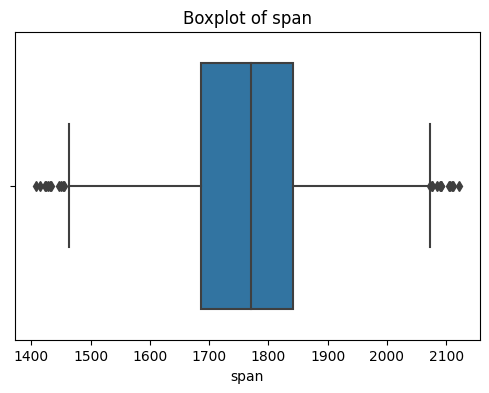

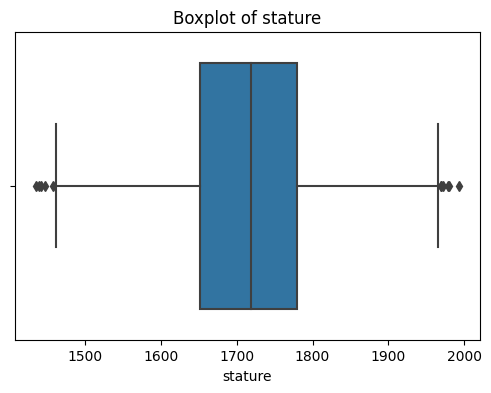

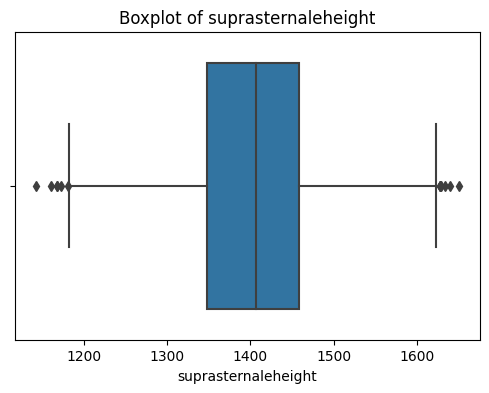

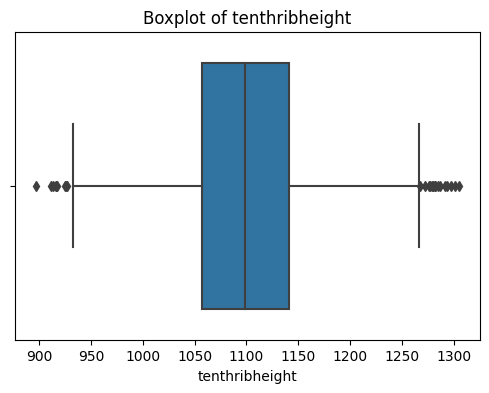

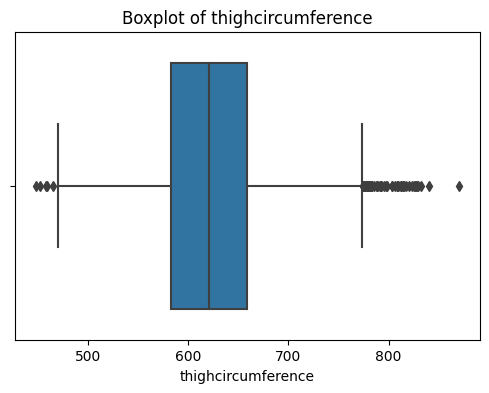

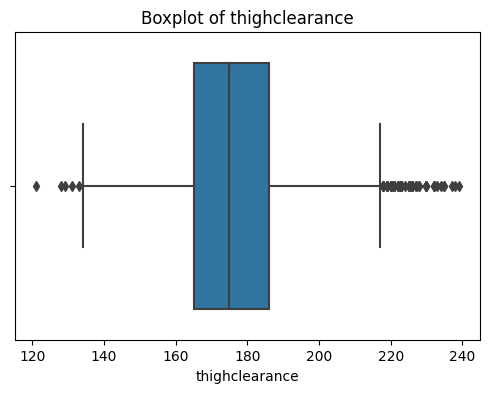

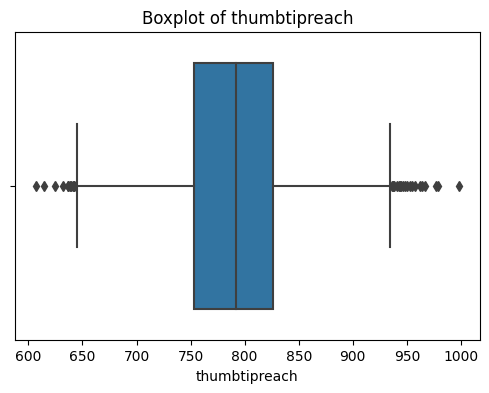

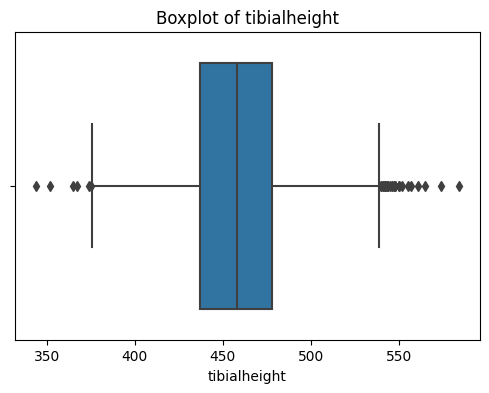

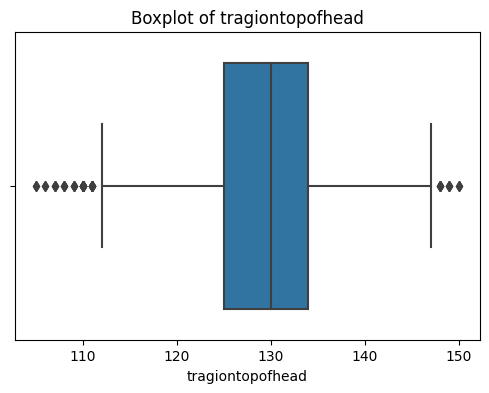

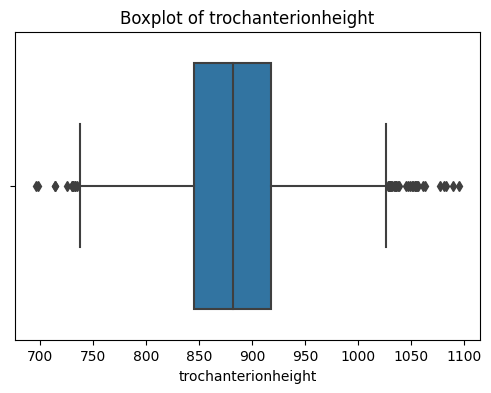

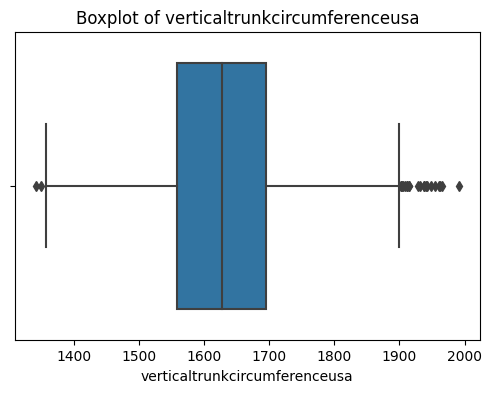

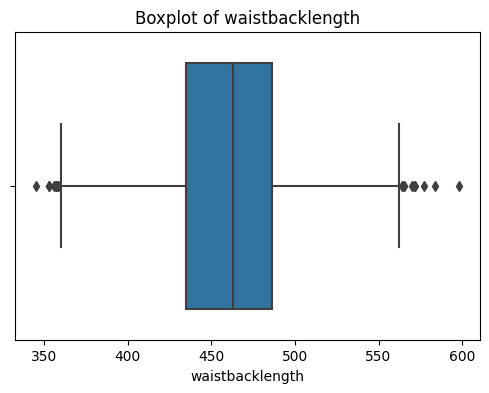

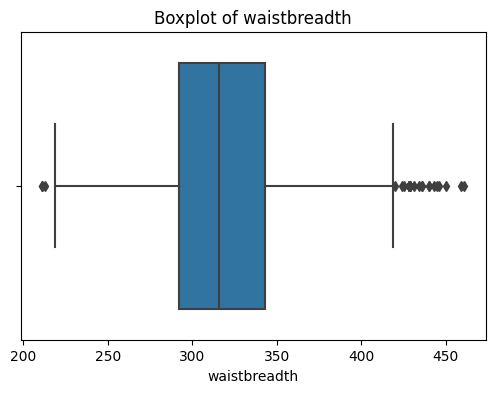

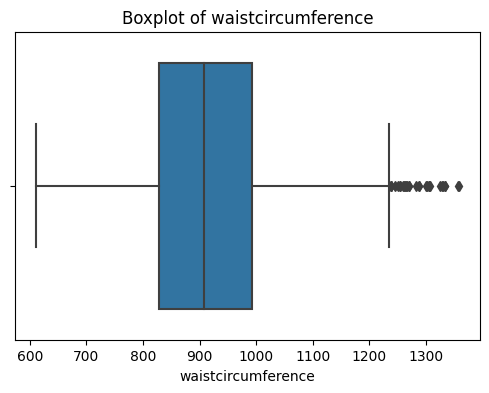

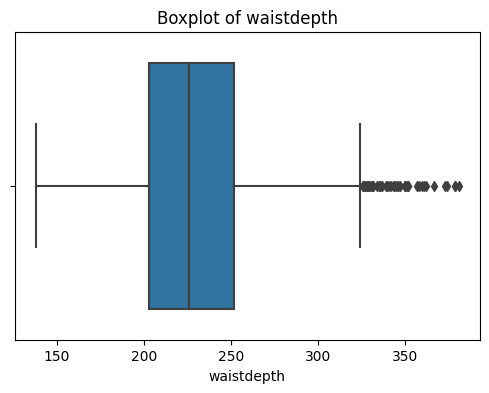

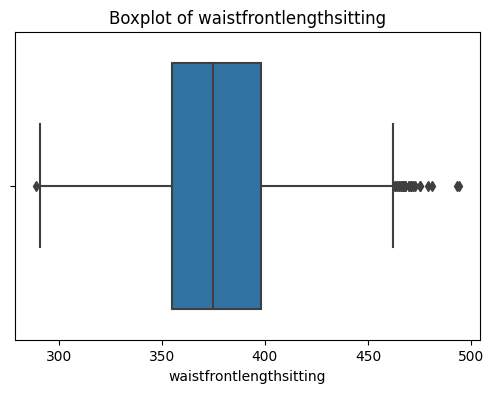

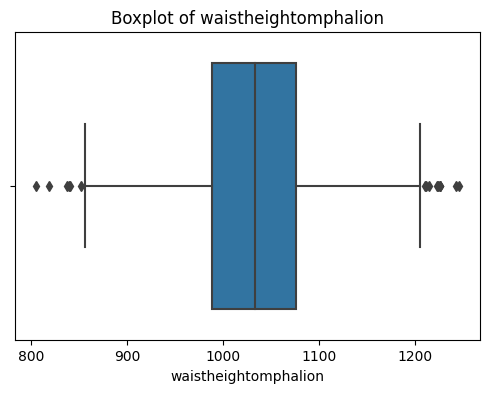

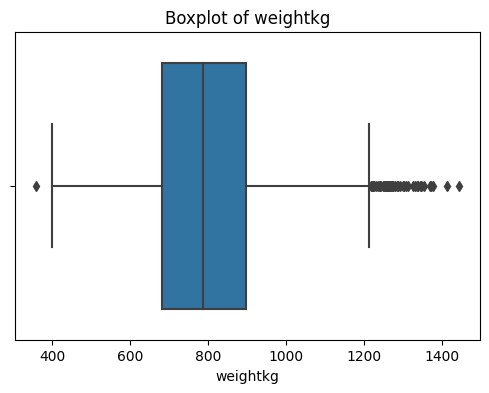

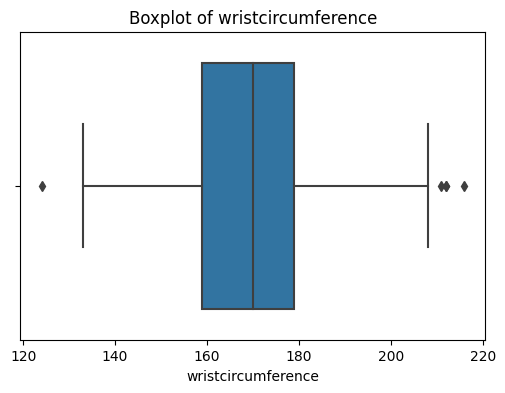

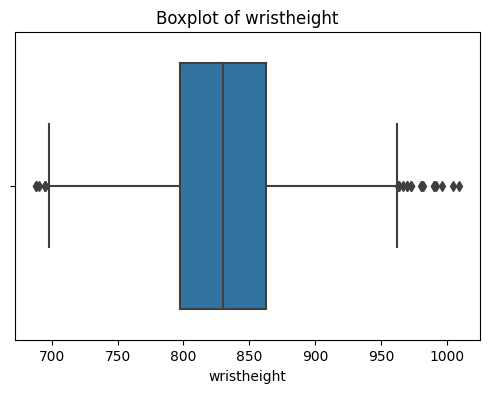

TypeError: Horizontal orientation requires numeric `x` variable.

<Figure size 600x400 with 0 Axes>

In [28]:
for col in df.columns:
    plt.figure(figsize=(6, 4)) 
    sns.boxplot(x=df[col]) 
    plt.title(f'Boxplot of {col}')
    plt.show()

In [29]:
df.shape

(6058, 105)

# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

In [30]:
df.DODRace.value_counts()

1    3786
2    1296
3     679
4     186
6      59
5      49
8       3
Name: DODRace, dtype: int64

In [31]:
df["DODRace"].isin([4,5,6,7,8]).value_counts()

False    5761
True      297
Name: DODRace, dtype: int64

In [32]:
df = df[df["DODRace"].isin([1,2,3])]

In [33]:
df.DODRace.value_counts() # 1:White, 2:Black, 3:Hispanic

df["DODRace"] = df.DODRace.map({1 : "White", 2 : "Black", 3 : "Hispanic"})
df.DODRace.value_counts()

White       3786
Black       1296
Hispanic     679
Name: DODRace, dtype: int64

In [34]:
df.shape

(5761, 105)

In [35]:
df.to_csv("Soldier_Race_eda.csv", index=False)

In [36]:
df = pd.read_csv("Soldier_Race_eda.csv", index_col=False)
df

abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
0                                266            1467                    337   
1                                233            1395                    326   
2                                287            1430                    341   
3                                234            1347                    310   
4                                250            1585                    372   
...                              ...             ...                    ...   
5756                             285            1392                    335   
5757                             262            1324                    301   
5758                             260            1334                    318   
5759                             205            1293                    302   
5760                             238            1346                    308   

      anklecircumference  axillaheight  balloffootcircumference  \
0                    222          1347                      253   
1                    220          1293                      245   
2                    230          1327                      256   
3                    230          1239                      262   
4                    247          1478                      267   
...                  ...           ...                      ...   
5756                 223          1297                      252   
5757                 202          1204                      236   
5758                 213          1259                      234   
5759                 199          1207                      213   
5760                 210          1256                      236   

      balloffootlength  biacromialbreadth  bicepscircumferenceflexed  \
0                  202                401                        369   
1                  193                394                        338   
2                  196                427                        408   
3                  199                401                        359   
4                  224                435                        356   
...                ...                ...                        ...   
5756               196                368                        299   
5757               181                378                        294   
5758               183                363                        332   
5759               163                376                        276   
5760               188                361                        285   

      bicristalbreadth  ...            Component                  Branch  \
0                  274  ...         Regular Army             Combat Arms   
1                  257  ...         Regular Army          Combat Support   
2                  261  ...         Regular Army          Combat Support   
3                  262  ...         Regular Army  Combat Service Support   
4                  263  ...         Regular Army  Combat Service Support   
...                ...  ...                  ...                     ...   
5756               312  ...  Army National Guard          Combat Support   
5757               287  ...  Army National Guard          Combat Support   
5758               299  ...  Army National Guard          Combat Support   
5759               280  ...  Army National Guard          Combat Support   
5760               279  ...  Army National Guard          Combat Support   

      PrimaryMOS  SubjectsBirthLocation  SubjectNumericRace   DODRace  Age  \
0            19D           North Dakota                   1     White   41   
1            68W               New York                   1     White   35   
2            68W               New York                   2     Black   42   
3            88M              Wisconsin                   1     White   31   
4            92G         North Carolina                   2     Black   21   
...   

In [37]:
def color_red(val):
    if val > 0.85 and val < 0.99:
        color = 'red'
    elif val >= 1:
        color = 'blue'
    else:
        color = 'black'
    return f'color: {color}'

In [38]:
df.corr().style.applymap(color_red)

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [39]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder

from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, learning_curve

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier 
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, f1_score, precision_score, auc, roc_auc_score
from sklearn.metrics import plot_roc_curve, roc_curve, average_precision_score, precision_recall_curve, plot_precision_recall_curve

from yellowbrick.classifier import ROCAUC

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print(f"model:{model}")
    print("Test_Set, 0:Black, 1:Hispanic , 2:White")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(f"model:{model}")
    print("Train_Set, 0:Black, 1:Hispanic , 2:White")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()
    
def plot_multiclass_roc_for_tree(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.predict_proba(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

In [40]:
categorical_features = df.select_dtypes(include=['object', 'category']).columns
numerical_features = df.select_dtypes(include='number').columns

print(categorical_features)
#print(numerical_features)

Index(['Gender', 'Installation', 'Component', 'Branch', 'PrimaryMOS',
       'SubjectsBirthLocation', 'DODRace', 'WritingPreference'],
      dtype='object')


In [42]:
label_encoder_eda = LabelEncoder()
df_encoded = df[['Gender', 'Installation', 'Component', 'Branch', 'PrimaryMOS',
                 'SubjectsBirthLocation', 'DODRace','WritingPreference']].apply(label_encoder_eda.fit_transform)

temporarydf = df.drop(df.select_dtypes(include=['object', 'category']).columns, axis=1)
df_encoded = pd.concat([temporarydf, df_encoded], axis=1)
df_encoded.head()

abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
0                             266            1467                    337   
1                             233            1395                    326   
2                             287            1430                    341   
3                             234            1347                    310   
4                             250            1585                    372   

   anklecircumference  axillaheight  balloffootcircumference  \
0                 222          1347                      253   
1                 220          1293                      245   
2                 230          1327                      256   
3                 230          1239                      262   
4                 247          1478                      267   

   balloffootlength  biacromialbreadth  bicepscircumferenceflexed  \
0               202                401                        369   
1               193                394                        338   
2               196                427                        408   
3               199                401                        359   
4               224                435                        356   

   bicristalbreadth  ...  Heightin  Weightlbs  Gender  Installation  \
0               274  ...        71        180       1             6   
1               257  ...        68        160       1             6   
2               261  ...        68        205       1             6   
3               262  ...        66        175       1             6   
4               263  ...        77        213       1             6   

   Component  Branch  PrimaryMOS  SubjectsBirthLocation  DODRace  \
0          2       0          65                     91        2   
1          2       2         193                     86        2   
2          2       2         193                     86        0   
3          2       1         217                    133        2   
4          2       1         256                     90        0   

   WritingPreference  
0                  2  
1                  1  
2                  1  
3                  2  
4                  2  

[5 rows x 105 columns]

In [43]:
df_encoded.shape

(5761, 105)

In [44]:
df.shape

(5761, 105)

In [45]:
X = df.drop("DODRace",axis=1)
y = df.DODRace

In [46]:
X_encoded = df_encoded.drop("DODRace",axis=1)
y_encoded = df_encoded.DODRace

In [47]:
y_encoded.head() # 0:Black, 1:Hispanic , 2:White

0    2
1    2
2    0
3    2
4    0
Name: DODRace, dtype: int32

In [48]:
y.head()

0    White
1    White
2    Black
3    White
4    Black
Name: DODRace, dtype: object

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [50]:
Xe_train, Xe_test, ye_train, ye_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42, stratify = y)

In [51]:
scaler =StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

Xe_train_scaled = scaler.fit_transform(Xe_train)
Xe_test_scaled = scaler.transform(Xe_test)

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

Vanilla modelin anlami; default degerler ile model kurulmasidir.

In [52]:
log_model = LogisticRegression(random_state=42)

log_model.fit(Xe_train,ye_train)

y_pred = log_model.predict(Xe_test)

In [53]:
eval_metric(log_model, Xe_train, ye_train, Xe_test, ye_test)

model:LogisticRegression(random_state=42)
Test_Set, 0:Black, 1:Hispanic , 2:White
[[224  10  25]
 [ 16  13 107]
 [ 16  11 731]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       259
           1       0.38      0.10      0.15       136
           2       0.85      0.96      0.90       758

    accuracy                           0.84      1153
   macro avg       0.70      0.64      0.64      1153
weighted avg       0.80      0.84      0.81      1153

model:LogisticRegression(random_state=42)
Train_Set, 0:Black, 1:Hispanic , 2:White
[[ 881   24  132]
 [  57   77  409]
 [  83   37 2908]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1037
           1       0.56      0.14      0.23       543
           2       0.84      0.96      0.90      3028

    accuracy                           0.84      4608
   macro avg       0.75      0.65      0.66      4608
weighted avg       0.81    

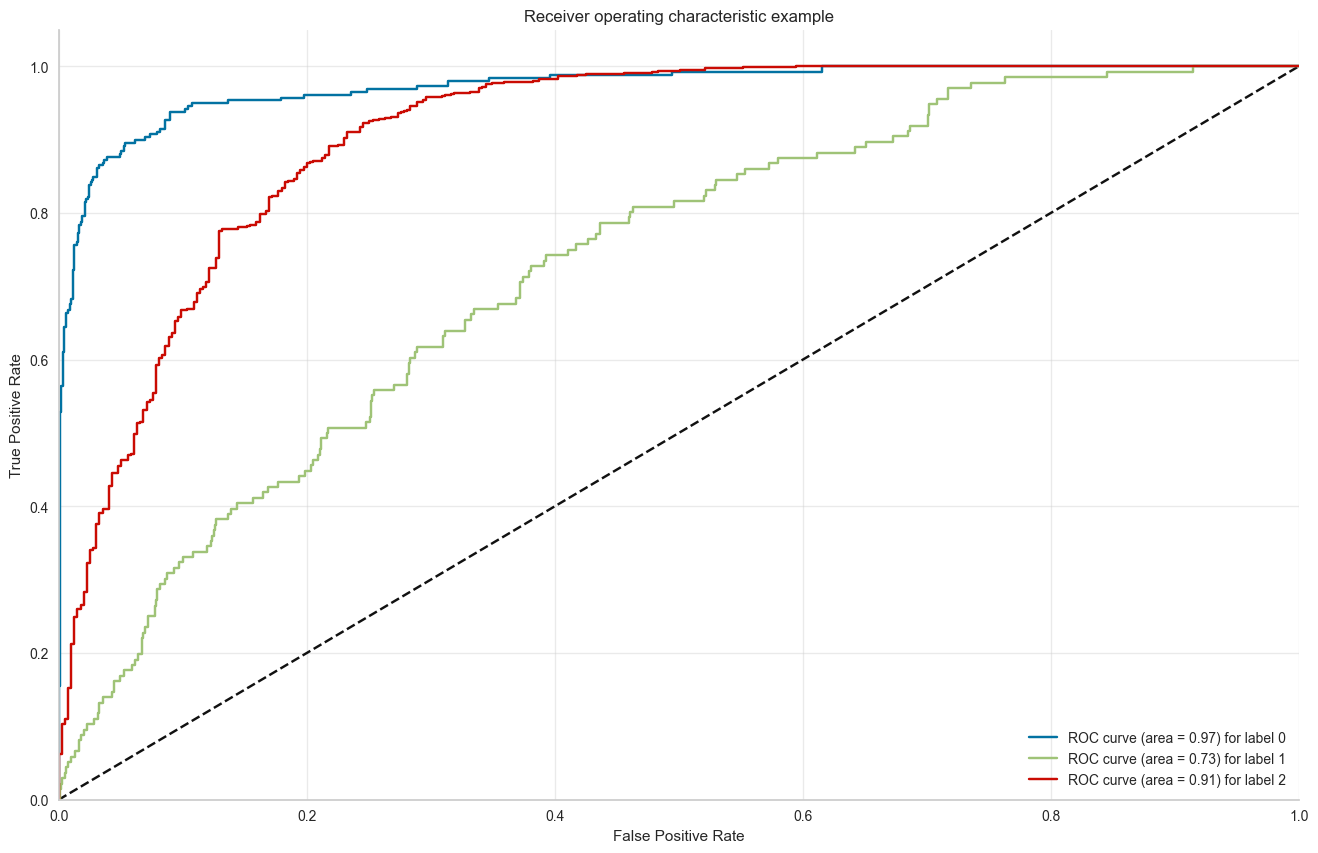

In [54]:
plot_multiclass_roc(log_model, Xe_test, ye_test, n_classes=3, figsize=(16, 10));

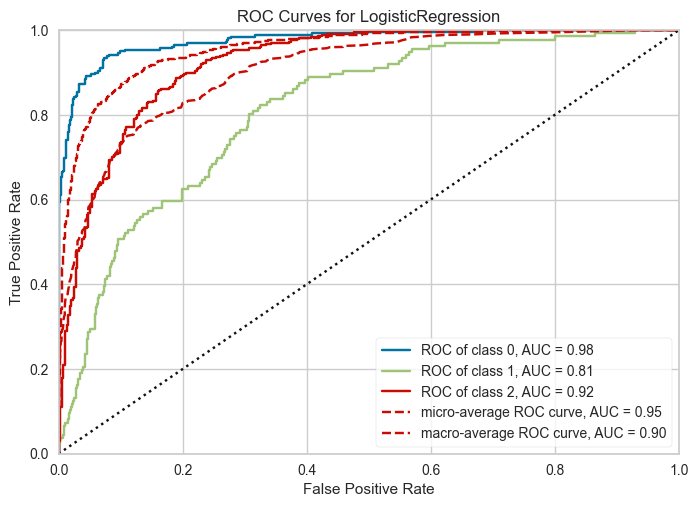

In [55]:
visualizer = ROCAUC(log_model)
visualizer.fit(Xe_train, ye_train)   
visualizer.score(Xe_test, ye_test)     
visualizer.show();   

In [56]:
scores = cross_validate(log_model, Xe_train, ye_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.838
test_precision_micro   0.838
test_recall_micro      0.838
test_f1_micro          0.838
dtype: float64

### Logistic Model GridsearchCV

In [57]:
model = LogisticRegression(random_state=42)
param_grid = { "class_weight" : ["balanced", None],
               'penalty': ["l1","l2"],
               'solver' : ['saga','lbfgs', "sag"],
               'C' : [0.001, 0.005, 0.01, 1] 
             }

log_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = "recall", 
                          n_jobs = -1)

In [58]:
log_grid_model.fit(Xe_train, ye_train)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.001, 0.005, 0.01, 1],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['saga', 'lbfgs', 'sag']},
             scoring='recall')

In [59]:
log_grid_model.best_params_

{'C': 0.001, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'saga'}

In [60]:
eval_metric(log_grid_model, Xe_train, ye_train, Xe_test, ye_test)

model:GridSearchCV(cv=10, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.001, 0.005, 0.01, 1],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['saga', 'lbfgs', 'sag']},
             scoring='recall')
Test_Set, 0:Black, 1:Hispanic , 2:White
[[208  35  16]
 [ 25  80  31]
 [ 85 205 468]]
              precision    recall  f1-score   support

           0       0.65      0.80      0.72       259
           1       0.25      0.59      0.35       136
           2       0.91      0.62      0.74       758

    accuracy                           0.66      1153
   macro avg       0.60      0.67      0.60      1153
weighted avg       0.77      0.66      0.69      1153

model:GridSearchCV(cv=10, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.001, 0.005, 0.01, 1],
                         'class_weight': ['balanced

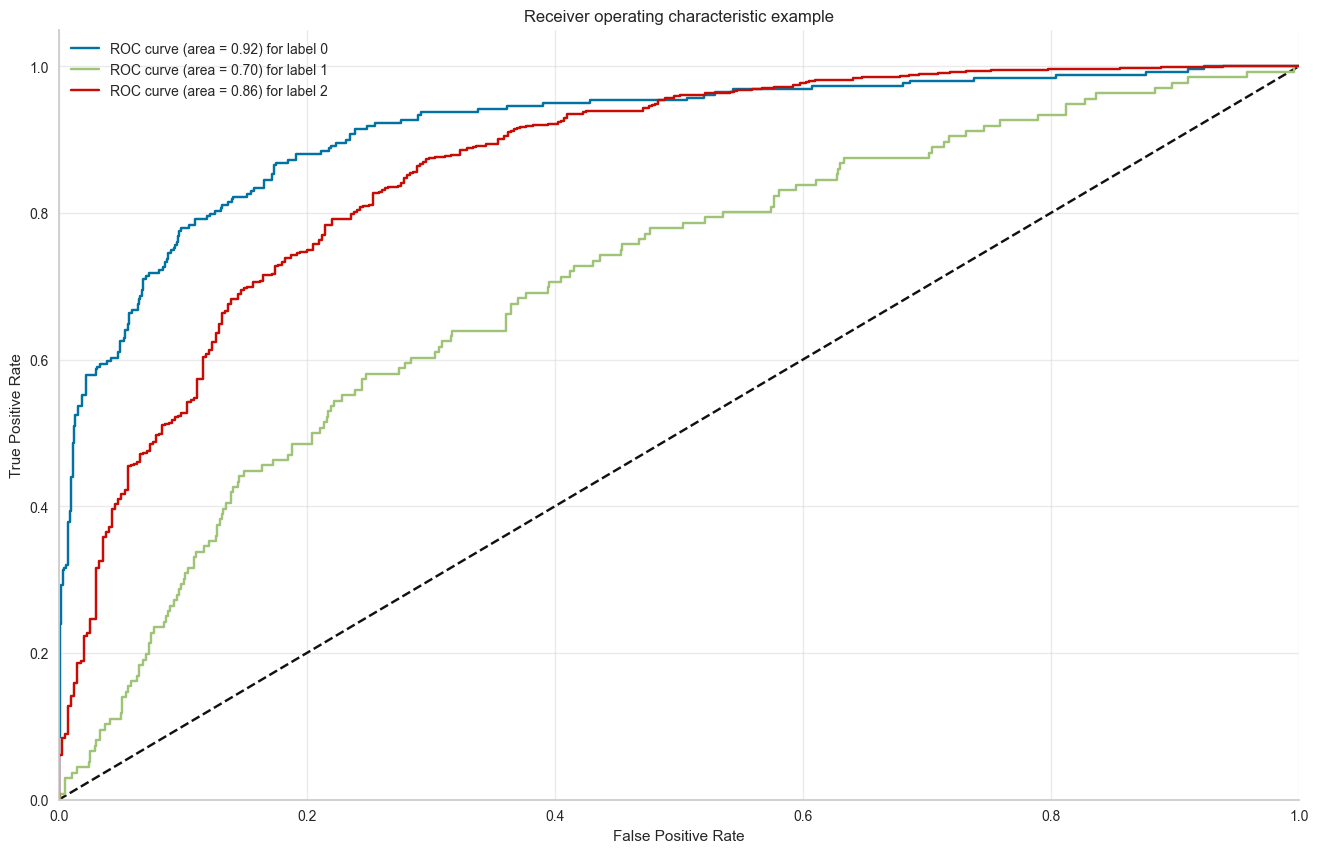

In [61]:
plot_multiclass_roc(log_grid_model, Xe_test, ye_test, n_classes=3, figsize=(16, 10));

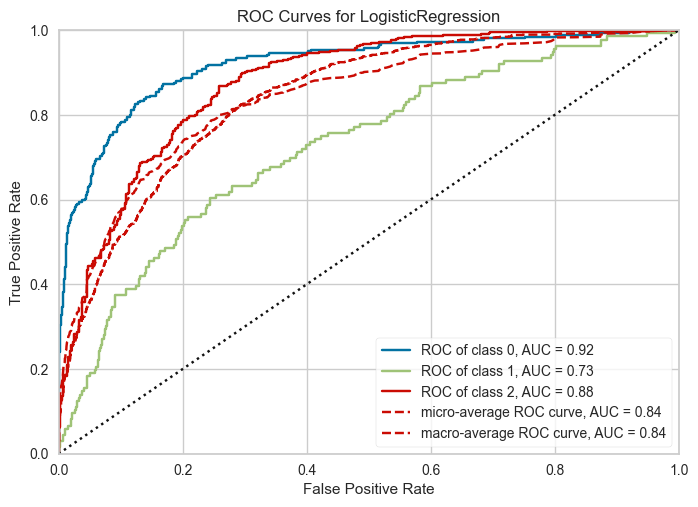

In [62]:
log_grid_model = LogisticRegression(C=0.001, class_weight='balanced', penalty='l1', 
                                    solver='saga', random_state=42)

visualizer = ROCAUC(log_grid_model)
visualizer.fit(Xe_train, ye_train)   
visualizer.score(Xe_test, ye_test)     
visualizer.show();   

In [63]:
scores = cross_validate(log_grid_model, Xe_train, ye_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.660
test_precision_micro   0.660
test_recall_micro      0.660
test_f1_micro          0.660
dtype: float64

## Lojistic Regression solver "liblenear" for small dataset

__liblenear__ kucuk datasetlerinde iyi sonuclar verir. Dikkat edilmesi gereken husus; liblinear sadece __penalty="l1"__ ile calisir, yoksa hata verir.

In [64]:
log_model_liblenear = LogisticRegression(solver='liblinear', penalty='l1', random_state=42)

log_model_liblenear.fit(Xe_train, ye_train)

LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

In [65]:
eval_metric(log_model_liblenear, Xe_train, ye_train, Xe_test, ye_test)

model:LogisticRegression(penalty='l1', random_state=42, solver='liblinear')
Test_Set, 0:Black, 1:Hispanic , 2:White
[[244   3  12]
 [ 16  42  78]
 [  9  20 729]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       259
           1       0.65      0.31      0.42       136
           2       0.89      0.96      0.92       758

    accuracy                           0.88      1153
   macro avg       0.81      0.74      0.76      1153
weighted avg       0.87      0.88      0.86      1153

model:LogisticRegression(penalty='l1', random_state=42, solver='liblinear')
Train_Set, 0:Black, 1:Hispanic , 2:White
[[ 964   12   61]
 [  64  184  295]
 [  41   50 2937]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      1037
           1       0.75      0.34      0.47       543
           2       0.89      0.97      0.93      3028

    accuracy                           0.89      4608
   macro avg 

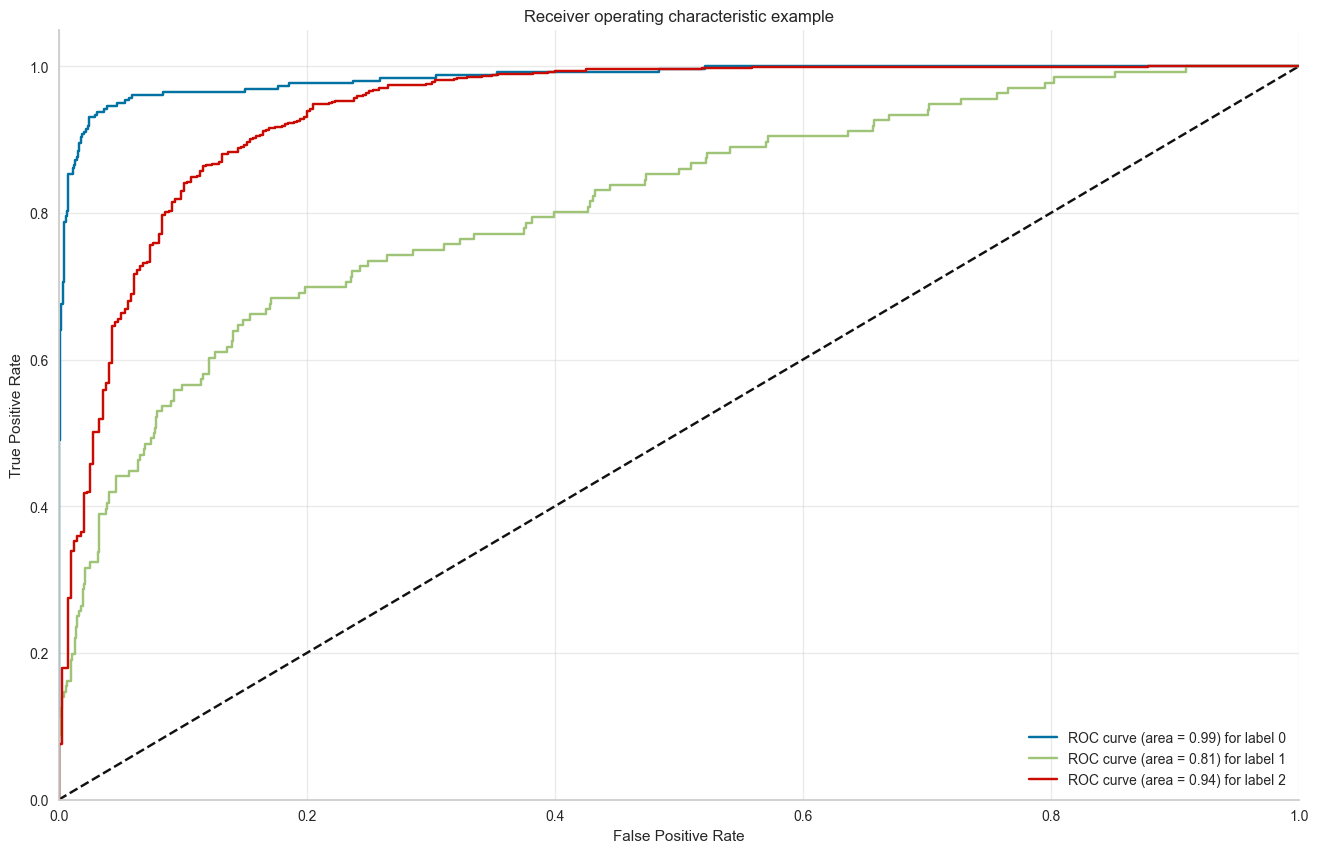

In [66]:
plot_multiclass_roc(log_model_liblenear, Xe_test, ye_test, n_classes=3, figsize=(16, 10));

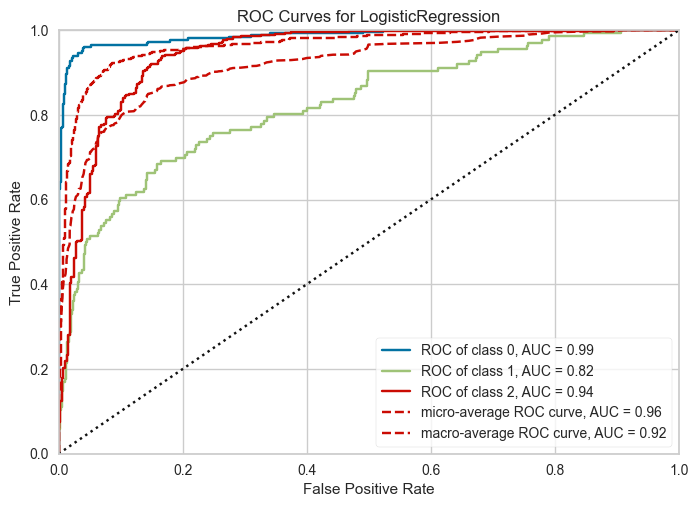

In [67]:
visualizer = ROCAUC(log_model_liblenear, average='weighted')
visualizer.fit(Xe_train, ye_train)   
visualizer.score(Xe_test, ye_test)     
visualizer.show();

## 2. SVC

### Vanilla SVC model 

Vanilla modellerde default degerler verilmeli ama dengesiz bir datasetimiz oldugu icin  class_weight düşünülmeli

In [68]:
svm_model = SVC(random_state= 42)
svm_model.fit(Xe_train, ye_train)
eval_metric(svm_model, Xe_train, ye_train, Xe_test, ye_test)

model:SVC(random_state=42)
Test_Set, 0:Black, 1:Hispanic , 2:White
[[ 61   0 198]
 [  1   0 135]
 [  1   0 757]]
              precision    recall  f1-score   support

           0       0.97      0.24      0.38       259
           1       0.00      0.00      0.00       136
           2       0.69      1.00      0.82       758

    accuracy                           0.71      1153
   macro avg       0.55      0.41      0.40      1153
weighted avg       0.67      0.71      0.62      1153

model:SVC(random_state=42)
Train_Set, 0:Black, 1:Hispanic , 2:White
[[ 309    0  728]
 [   6    0  537]
 [   3    0 3025]]
              precision    recall  f1-score   support

           0       0.97      0.30      0.46      1037
           1       0.00      0.00      0.00       543
           2       0.71      1.00      0.83      3028

    accuracy                           0.72      4608
   macro avg       0.56      0.43      0.43      4608
weighted avg       0.68      0.72      0.65      4608



In [69]:
operations = [("scaler", MinMaxScaler()), ("SVC", SVC(random_state=42))]
                                        
svc_pipe_model = Pipeline(steps=operations)

In [70]:
svc_pipe_model.fit(Xe_train, ye_train)
eval_metric(svc_pipe_model, Xe_train, ye_train, Xe_test, ye_test)

model:Pipeline(steps=[('scaler', MinMaxScaler()), ('SVC', SVC(random_state=42))])
Test_Set, 0:Black, 1:Hispanic , 2:White
[[240   2  17]
 [ 13  17 106]
 [  4   5 749]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       259
           1       0.71      0.12      0.21       136
           2       0.86      0.99      0.92       758

    accuracy                           0.87      1153
   macro avg       0.83      0.68      0.69      1153
weighted avg       0.86      0.87      0.84      1153

model:Pipeline(steps=[('scaler', MinMaxScaler()), ('SVC', SVC(random_state=42))])
Train_Set, 0:Black, 1:Hispanic , 2:White
[[ 960    5   72]
 [  53  125  365]
 [  15    6 3007]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1037
           1       0.92      0.23      0.37       543
           2       0.87      0.99      0.93      3028

    accuracy                           0.89      4608
 

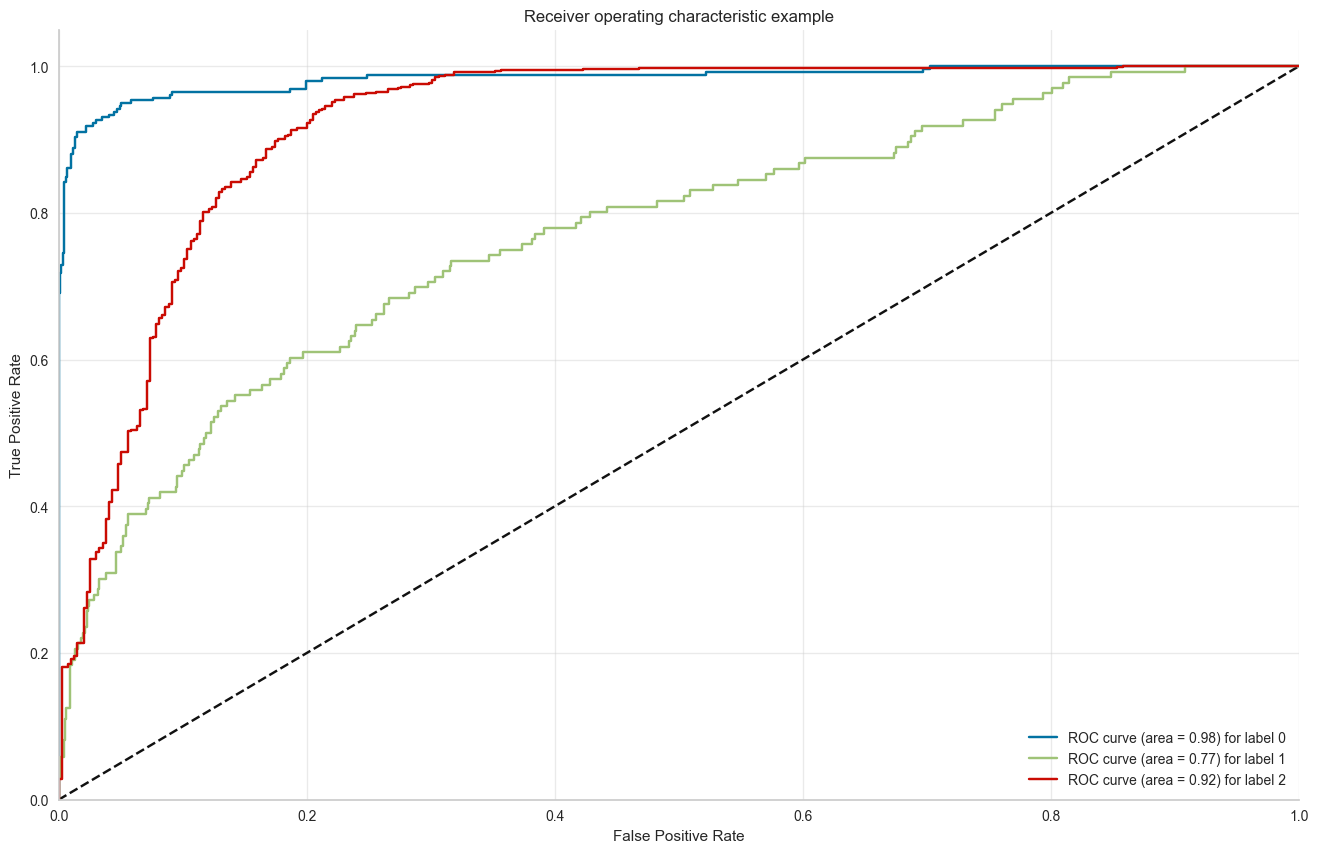

In [71]:
plot_multiclass_roc(svc_pipe_model, Xe_test, ye_test, n_classes=3, figsize=(16, 10));

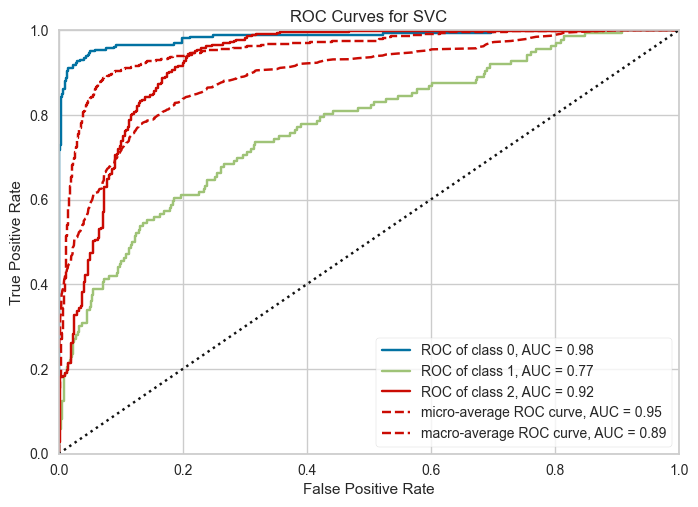

In [72]:
visualizer = ROCAUC(svc_pipe_model)
visualizer.fit(Xe_train, ye_train)   
visualizer.score(Xe_test, ye_test)     
visualizer.show(); 

In [73]:
scores = cross_validate(svc_pipe_model, Xe_train, ye_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.862
test_precision_micro   0.862
test_recall_micro      0.862
test_f1_micro          0.862
dtype: float64

###  SVC Model GridsearchCV

In [74]:
param_grid = {"SVC__C":[0.001, 1, 200],
             "SVC__gamma":["scale", "auto", 0.2, 0.97],
             "SVC__kernel":["rbf"]}

In [75]:
operations = [("scaler", MinMaxScaler()), ("SVC", SVC(probability=True, class_weight="balanced", random_state = 42))]
pipe_model = Pipeline(steps=operations)
svm_grid_model = GridSearchCV(pipe_model, param_grid=param_grid, scoring="recall", cv=10)

In [76]:
svm_grid_model.fit(Xe_train, ye_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('SVC',
                                        SVC(class_weight='balanced',
                                            probability=True,
                                            random_state=42))]),
             param_grid={'SVC__C': [0.001, 1, 200],
                         'SVC__gamma': ['scale', 'auto', 0.2, 0.97],
                         'SVC__kernel': ['rbf']},
             scoring='recall')

In [77]:
svm_grid_model.best_params_

{'SVC__C': 0.001, 'SVC__gamma': 'scale', 'SVC__kernel': 'rbf'}

In [78]:
eval_metric(svm_grid_model, Xe_train, ye_train, Xe_test, ye_test)

model:GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('SVC',
                                        SVC(class_weight='balanced',
                                            probability=True,
                                            random_state=42))]),
             param_grid={'SVC__C': [0.001, 1, 200],
                         'SVC__gamma': ['scale', 'auto', 0.2, 0.97],
                         'SVC__kernel': ['rbf']},
             scoring='recall')
Test_Set, 0:Black, 1:Hispanic , 2:White
[[259   0   0]
 [136   0   0]
 [758   0   0]]
              precision    recall  f1-score   support

           0       0.22      1.00      0.37       259
           1       0.00      0.00      0.00       136
           2       0.00      0.00      0.00       758

    accuracy                           0.22      1153
   macro avg       0.07      0.33      0.12      1153
weighted avg       0.05      0.22      0.08      1

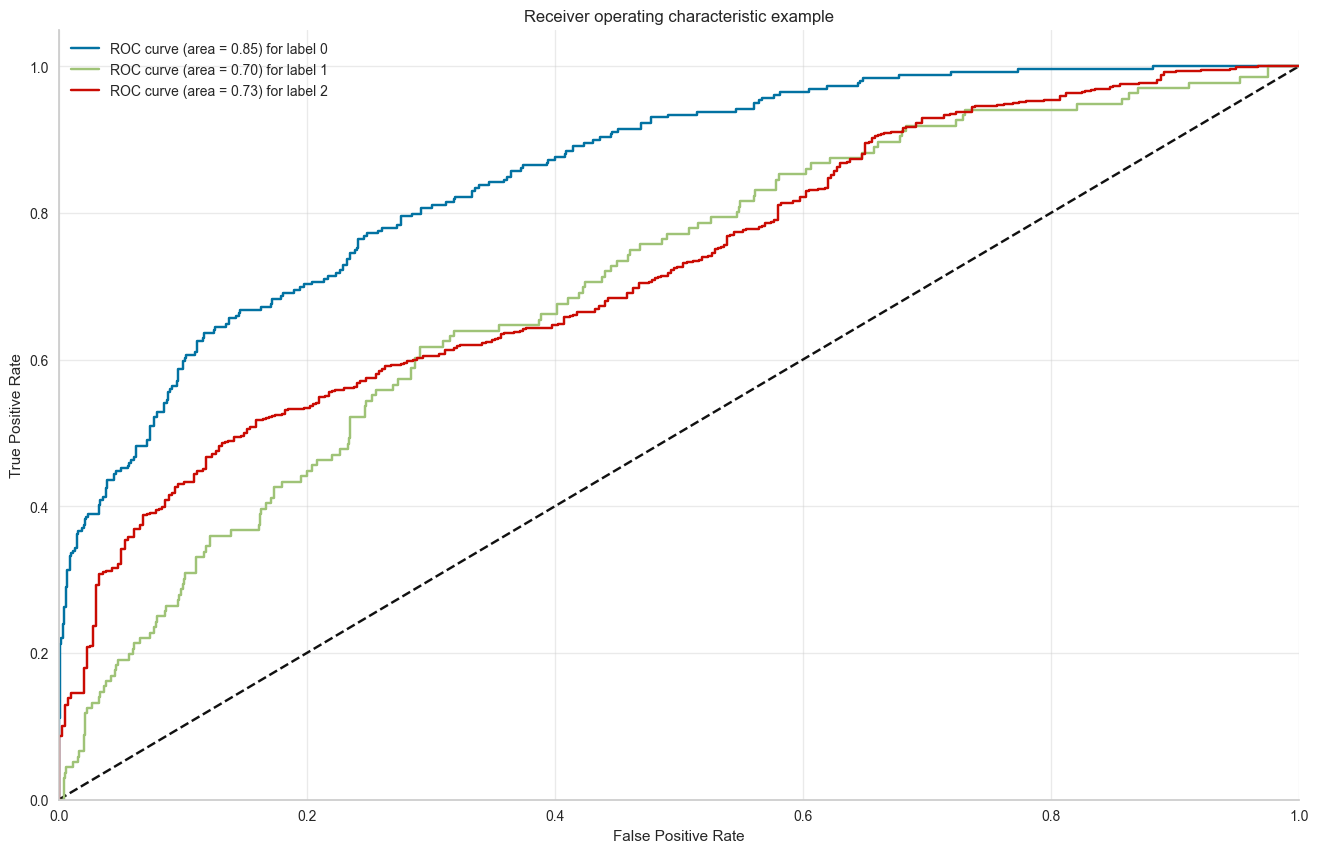

In [79]:
plot_multiclass_roc(svm_grid_model, Xe_test, ye_test, n_classes=3, figsize=(16, 10));

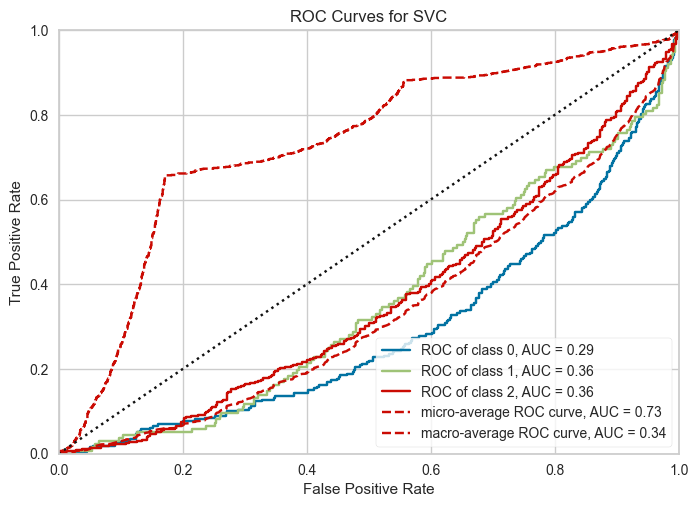

In [80]:
# operations = [("scaler", MinMaxScaler()), ("SVC", SVC(C=0.001, gamma='scale', kernel='rbf', probability=True, class_weight="balanced", random_state = 42))]
# pipe_model = Pipeline(steps=operations)
# svm_grid_model = GridSearchCV(pipe_model, scoring="recall", cv=10)
svm_fmodel = SVC(C=0.001, gamma='scale', kernel='rbf', probability=True, class_weight="balanced", random_state = 42)

visualizer = ROCAUC(svm_fmodel)
visualizer.fit(Xe_train, ye_train)   
visualizer.score(Xe_test, ye_test)     
visualizer.show();

In [81]:
scores = cross_validate(svm_fmodel, Xe_train, ye_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.204
test_precision_micro   0.204
test_recall_micro      0.204
test_f1_micro          0.204
dtype: float64

## 3. RF

### Vanilla RF Model

Vanilla modelin anlami; default degerler ile model kurulmasidir.

In [82]:
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(Xe_train,ye_train)

RandomForestClassifier(random_state=42)

In [83]:
eval_metric(rf_model, Xe_train, ye_train, Xe_test, ye_test)

model:RandomForestClassifier(random_state=42)
Test_Set, 0:Black, 1:Hispanic , 2:White
[[248   7   4]
 [ 16 103  17]
 [  6  21 731]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       259
           1       0.79      0.76      0.77       136
           2       0.97      0.96      0.97       758

    accuracy                           0.94      1153
   macro avg       0.89      0.89      0.89      1153
weighted avg       0.94      0.94      0.94      1153

model:RandomForestClassifier(random_state=42)
Train_Set, 0:Black, 1:Hispanic , 2:White
[[1037    0    0]
 [   0  543    0]
 [   0    0 3028]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1037
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3028

    accuracy                           1.00      4608
   macro avg       1.00      1.00      1.00      4608
weighted avg       

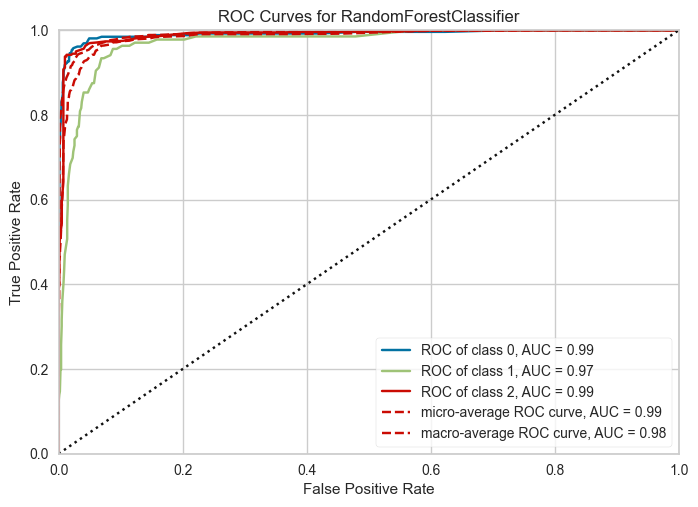

In [84]:
visualizer = ROCAUC(rf_model)
visualizer.fit(Xe_train, ye_train)   
visualizer.score(Xe_test, ye_test)     
visualizer.show();

In [85]:
scores = cross_validate(rf_model, Xe_train, ye_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.934
test_precision_micro   0.934
test_recall_micro      0.934
test_f1_micro          0.934
dtype: float64

### RF Model GridsearchCV

In [86]:
param_grid = {'n_estimators':[64, 100, 128, 200],
             'criterion': ["gini","entropy"],
             'max_depth':[1, 3, 5, 8, 10],
             'min_samples_split':[2, 5, 10, 20],
             'max_features':[1, 3, "auto"]}

In [87]:
model = RandomForestClassifier(class_weight = "balanced", random_state=42)
rf_grid_model = GridSearchCV(model,
                             param_grid,
                             scoring = "recall",
                             n_jobs = -1,
                             verbose = 2)

In [88]:
rf_grid_model.fit(Xe_train,ye_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, 8, 10],
                         'max_features': [1, 3, 'auto'],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [64, 100, 128, 200]},
             scoring='recall', verbose=2)

In [89]:
rf_grid_model.best_params_

{'criterion': 'gini',
 'max_depth': 1,
 'max_features': 1,
 'min_samples_split': 2,
 'n_estimators': 64}

In [90]:
eval_metric(rf_grid_model, Xe_train, ye_train, Xe_test, ye_test)

model:GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, 8, 10],
                         'max_features': [1, 3, 'auto'],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [64, 100, 128, 200]},
             scoring='recall', verbose=2)
Test_Set, 0:Black, 1:Hispanic , 2:White
[[107  98  54]
 [  5  93  38]
 [ 32 256 470]]
              precision    recall  f1-score   support

           0       0.74      0.41      0.53       259
           1       0.21      0.68      0.32       136
           2       0.84      0.62      0.71       758

    accuracy                           0.58      1153
   macro avg       0.60      0.57      0.52      1153
weighted avg       0.74      0.58      0.63      1153

model:GridSearchCV(estimator=

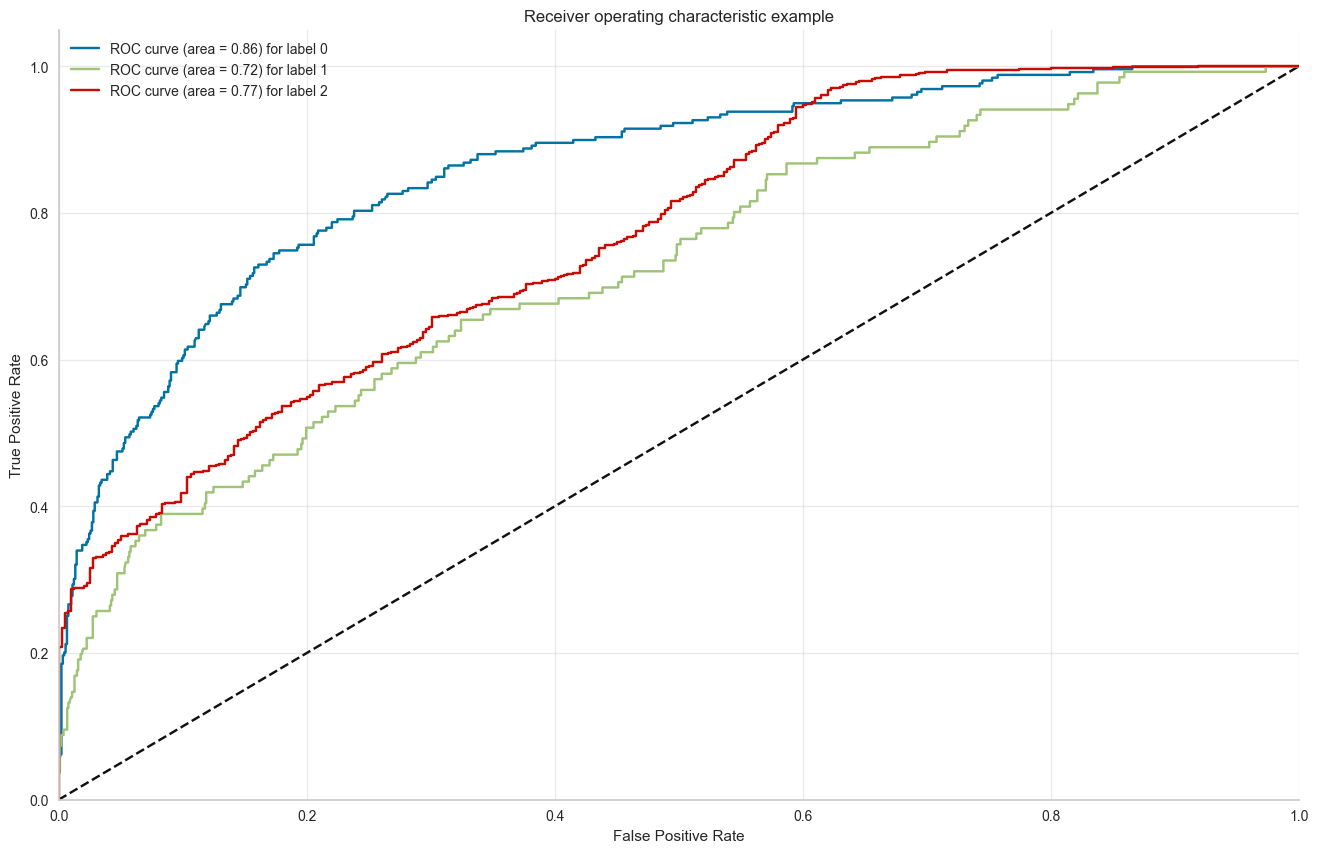

In [91]:
plot_multiclass_roc_for_tree(rf_grid_model, Xe_test, ye_test, n_classes=3, figsize=(16, 10));

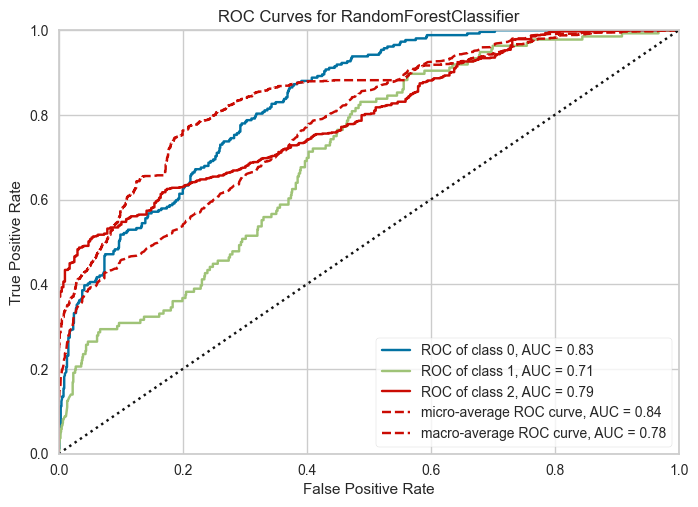

In [92]:
rf_grid_model = RandomForestClassifier(criterion='gini',
                                        max_depth=1,
                                        max_features=1,
                                        min_samples_split=2,
                                        n_estimators=64, 
                                        random_state=42)

visualizer = ROCAUC(rf_grid_model, average='weighted')
visualizer.fit(Xe_train, ye_train)   
visualizer.score(Xe_test, ye_test)     
visualizer.show();

In [93]:
scores = cross_validate(rf_grid_model, Xe_train, ye_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.657
test_precision_micro   0.657
test_recall_micro      0.657
test_f1_micro          0.657
dtype: float64

## 4. XGBoost

### Vanilla XGBoost Model

In [94]:
xgb_model = XGBClassifier()

xgb_model.fit(Xe_train, ye_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [95]:
eval_metric(xgb_model, Xe_train, ye_train, Xe_test, ye_test)

model:XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)
Test_Set, 0:Black, 1:Hispanic , 2:White
[[252   3   4]
 [  3 127   6]
 [  8  13 737]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       259
           1       0.89      0.9

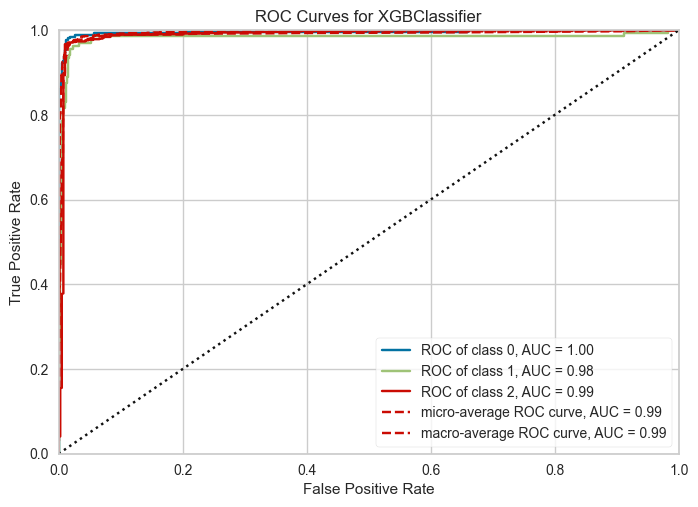

In [96]:
visualizer = ROCAUC(xgb_model)
visualizer.fit(Xe_train, ye_train)   
visualizer.score(Xe_test, ye_test)     
visualizer.show();

In [97]:
scores = cross_validate(xgb_model, Xe_train, ye_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.972
test_precision_micro   0.972
test_recall_micro      0.972
test_f1_micro          0.972
dtype: float64

### XGBoost Model GridsearchCV

In [98]:
param_grid = {"n_estimators":[50, 100, 300],
              'max_depth':[3,5,6],
              "learning_rate": [0.1, 0.3],
              "subsample":[0.5, 1],
              "colsample_bytree":[0.5, 1]}

In [99]:
xgb_model = XGBClassifier(random_state=42)
xgb_grid_model = GridSearchCV(xgb_model, param_grid, scoring = "f1", verbose=2, n_jobs = -1)

In [100]:
xgb_grid_model.fit(Xe_train, ye_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 1],
                         'learning_rate': [0.1, 0.3], 'max_depth': [3, 5, 6],
                         'n_estimators': [50, 100, 300],
                         'subsample': [0.5, 1]},
             scoring='f1', verbose=2)

In [101]:
xgb_grid_model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 50,
 'subsample': 0.5}

In [102]:
eval_metric(xgb_grid_model, Xe_train, ye_train, Xe_test, ye_test)

model:GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_est

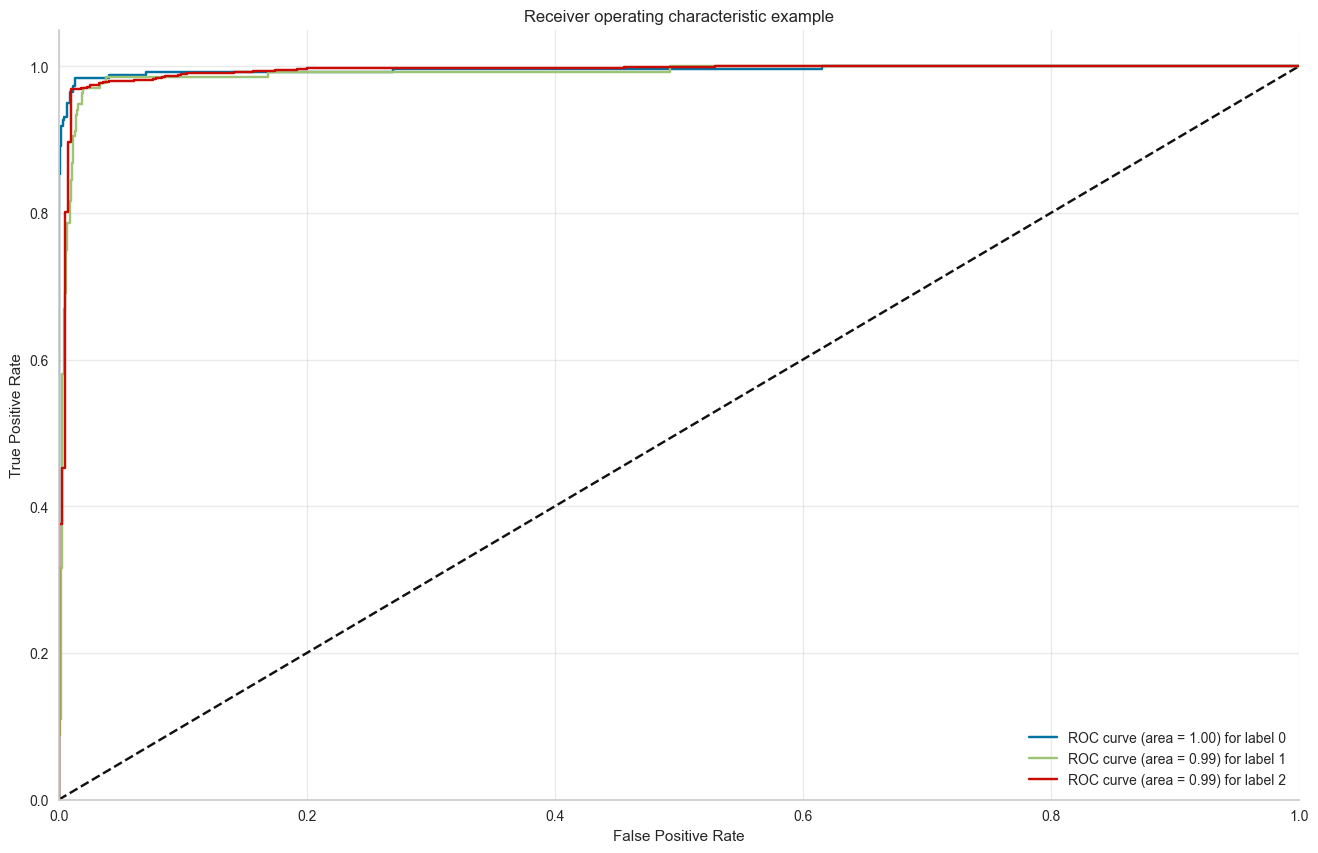

In [103]:
plot_multiclass_roc_for_tree(xgb_grid_model, Xe_test, ye_test, n_classes=3, figsize=(16, 10));

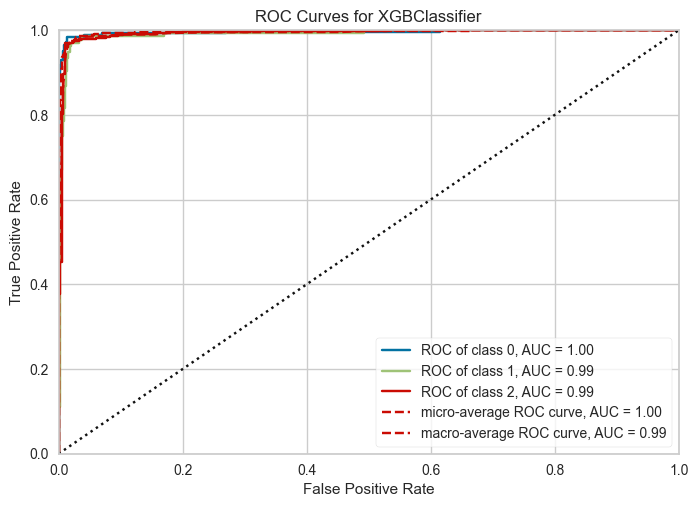

In [104]:
xgb_grid_model = XGBClassifier(colsample_bytree = 0.5,
                               learning_rate = 0.1,
                               max_depth = 3,
                               n_estimators = 50,
                               subsample = 0.5,
                               random_state=42)

visualizer = ROCAUC(xgb_grid_model, average='weighted')
visualizer.fit(Xe_train, ye_train)   
visualizer.score(Xe_test, ye_test)     
visualizer.show();

In [105]:
scores = cross_validate(xgb_grid_model, Xe_train, ye_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.969
test_precision_micro   0.969
test_recall_micro      0.969
test_f1_micro          0.969
dtype: float64

## 5. LightGBM

In [106]:
lgbm_model = LGBMClassifier(random_state=42)

In [107]:
lgbm_model.fit(Xe_train, ye_train)

Exception in thread Thread-7 (_readerthread):
Traceback (most recent call last):
  File "C:\Users\nsgr6\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "C:\Users\nsgr6\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\nsgr6\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 1499, in _readerthread
    buffer.append(fh.read())
  File "C:\Users\nsgr6\AppData\Local\Programs\Python\Python310\lib\encodings\cp1252.py", line 23, in decode
    return codecs.charmap_decode(input,self.errors,decoding_table)[0]
UnicodeDecodeError: 'charmap' codec can't decode byte 0x81 in position 3: character maps to <undefined>
  File "C:\Users\nsgr6\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003480 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15403
[LightGBM] [Info] Number of data points in the train set: 4608, number of used features: 104
[LightGBM] [Info] Start training from score -1.491462
[LightGBM] [Info] Start training from score -2.138440
[LightGBM] [Info] Start training from score -0.419892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(random_state=42)

In [108]:
eval_metric(lgbm_model, Xe_train, ye_train, Xe_test, ye_test)

model:LGBMClassifier(random_state=42)
Test_Set, 0:Black, 1:Hispanic , 2:White
[[254   3   2]
 [  3 128   5]
 [  8  14 736]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       259
           1       0.88      0.94      0.91       136
           2       0.99      0.97      0.98       758

    accuracy                           0.97      1153
   macro avg       0.94      0.96      0.95      1153
weighted avg       0.97      0.97      0.97      1153

model:LGBMClassifier(random_state=42)
Train_Set, 0:Black, 1:Hispanic , 2:White
[[1037    0    0]
 [   0  543    0]
 [   0    0 3028]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1037
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3028

    accuracy                           1.00      4608
   macro avg       1.00      1.00      1.00      4608
weighted avg       1.00      1.00  

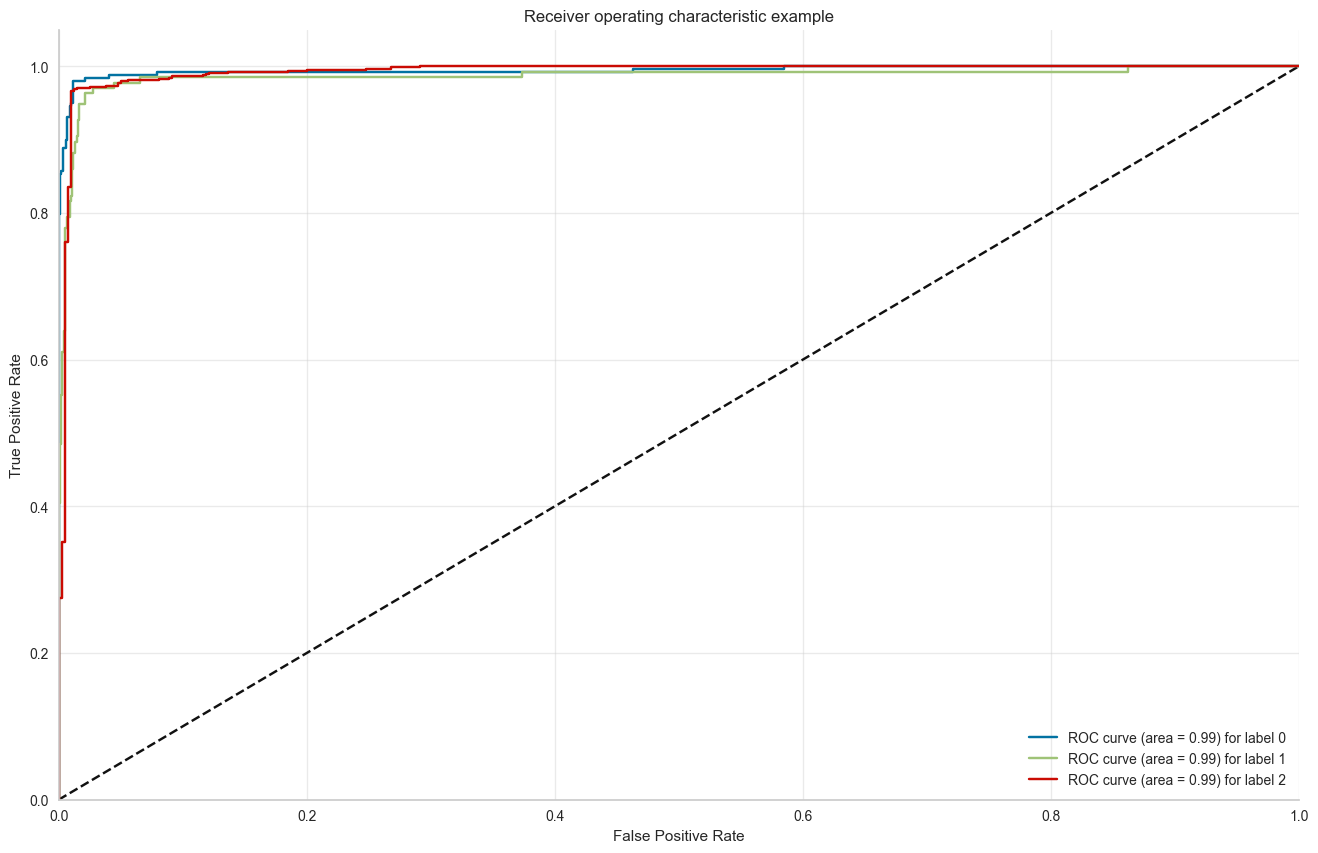

In [109]:
plot_multiclass_roc_for_tree(lgbm_model, Xe_test, ye_test, n_classes=3, figsize=(16, 10));

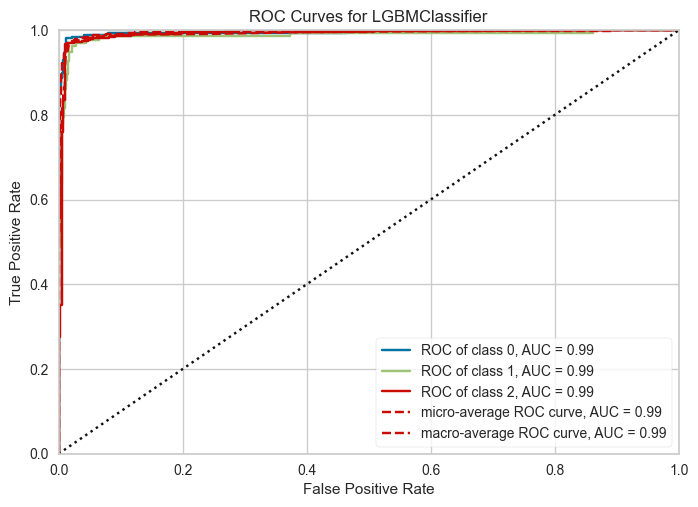

In [110]:
visualizer = ROCAUC(lgbm_model, average='weighted')
visualizer.fit(Xe_train, ye_train)   
visualizer.score(Xe_test, ye_test)     
visualizer.show();

In [111]:
scores = cross_validate(lgbm_model, Xe_train, ye_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002871 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15282
[LightGBM] [Info] Number of data points in the train set: 4147, number of used features: 104
[LightGBM] [Info] Start training from score -1.491735
[LightGBM] [Info] Start training from score -2.137778
[LightGBM] [Info] Start training from score -0.419917
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003825 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15272
[LightGBM] [Info] Number of data points in the train set: 4147, number of used features: 104
[LightGBM] [Info] Start training 

test_accuracy          0.972
test_precision_micro   0.972
test_recall_micro      0.972
test_f1_micro          0.972
dtype: float64

###  LightGBM GridsearchCV

In [112]:
param_grid = {'colsample_bytree': [0.3, 0.5],
              'learning_rate': [0.5, 1.0],
              'max_depth': [-1, 2, 3],
              'n_estimators': [32, 50, 100],
              'num_leaves': [30, 50],
              'subsample': [0.5, 0.7, 0.9]
             }

In [113]:
lgbm_model = LGBMClassifier(random_state=42)
lgbm_grid_model = GridSearchCV(estimator=lgbm_model, param_grid=param_grid, cv=5, 
                         scoring='f1', n_jobs=-1)

In [114]:
lgbm_grid_model.fit(Xe_train, ye_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004089 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15403
[LightGBM] [Info] Number of data points in the train set: 4608, number of used features: 104
[LightGBM] [Info] Start training from score -1.491462
[LightGBM] [Info] Start training from score -2.138440
[LightGBM] [Info] Start training from score -0.419892


GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=42), n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.5],
                         'learning_rate': [0.5, 1.0], 'max_depth': [-1, 2, 3],
                         'n_estimators': [32, 50, 100], 'num_leaves': [30, 50],
                         'subsample': [0.5, 0.7, 0.9]},
             scoring='f1')

In [115]:
lgbm_grid_model.best_params_

{'colsample_bytree': 0.3,
 'learning_rate': 0.5,
 'max_depth': -1,
 'n_estimators': 32,
 'num_leaves': 30,
 'subsample': 0.5}

In [116]:
eval_metric(lgbm_grid_model, Xe_train, ye_train, Xe_test, ye_test)

model:GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=42), n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.5],
                         'learning_rate': [0.5, 1.0], 'max_depth': [-1, 2, 3],
                         'n_estimators': [32, 50, 100], 'num_leaves': [30, 50],
                         'subsample': [0.5, 0.7, 0.9]},
             scoring='f1')
Test_Set, 0:Black, 1:Hispanic , 2:White
[[251   3   5]
 [  4 121  11]
 [  7  11 740]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       259
           1       0.90      0.89      0.89       136
           2       0.98      0.98      0.98       758

    accuracy                           0.96      1153
   macro avg       0.94      0.95      0.94      1153
weighted avg       0.96      0.96      0.96      1153

model:GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=42), n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.5],
                   

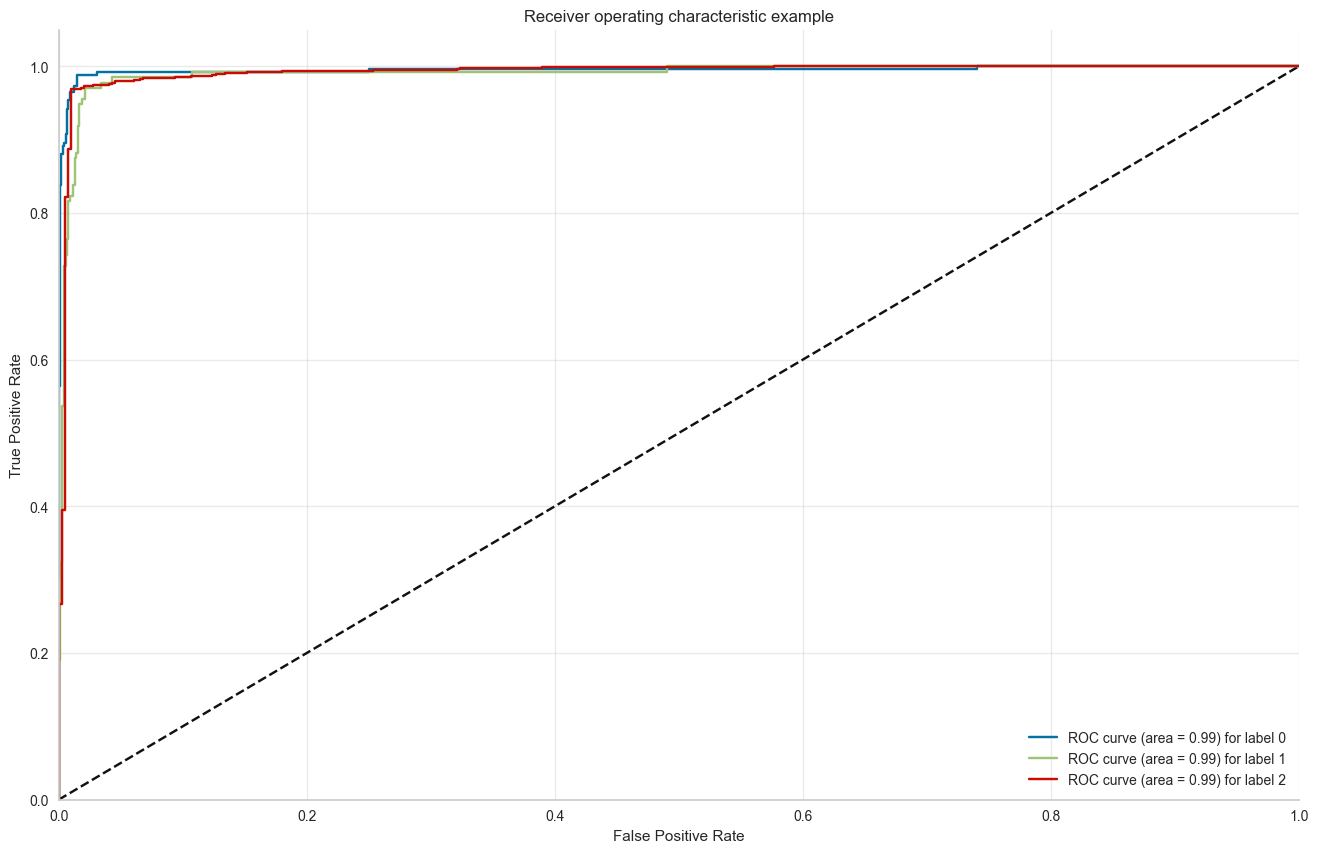

In [117]:
plot_multiclass_roc_for_tree(lgbm_grid_model, Xe_test, ye_test, n_classes=3, figsize=(16, 10));

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003191 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15403
[LightGBM] [Info] Number of data points in the train set: 4608, number of used features: 104
[LightGBM] [Info] Start training from score -1.491462
[LightGBM] [Info] Start training from score -2.138440
[LightGBM] [Info] Start training from score -0.419892


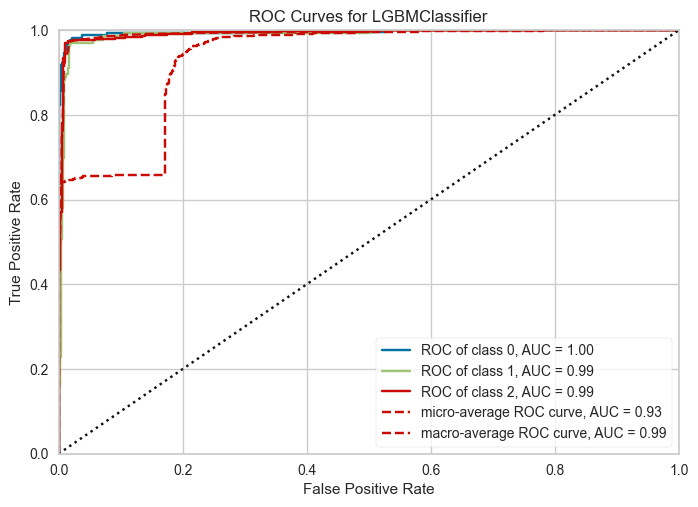

In [118]:
lgbm_grid_model = LGBMClassifier(colsample_bytree = 0.5,
                                 learning_rate = 0.01,
                                 max_depth = -1,
                                 n_estimators= 32,
                                 num_leaves = 10,
                                 subsample = 0.5, 
                                 random_state=42)

visualizer = ROCAUC(lgbm_grid_model, average='weighted')
visualizer.fit(Xe_train, ye_train)   
visualizer.score(Xe_test, ye_test)     
visualizer.show();

In [119]:
scores = cross_validate(lgbm_grid_model, Xe_train, ye_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002714 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15282
[LightGBM] [Info] Number of data points in the train set: 4147, number of used features: 104
[LightGBM] [Info] Start training from score -1.491735
[LightGBM] [Info] Start training from score -2.137778
[LightGBM] [Info] Start training from score -0.419917
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002945 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15272
[LightGBM] [Info] Number of data points in the train set: 4147, number of used features: 104
[LightGBM] [Info] Start training from score -1.491735
[LightGBM] [Info] Start training from score -2.137778
[LightGBM] [Info] Start training from score -0.419917
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003206 s

test_accuracy          0.657
test_precision_micro   0.657
test_recall_micro      0.657
test_f1_micro          0.657
dtype: float64

## Comparing Models

In [120]:
# LogisticRegression                      without scaling
operations = [("scaler", MinMaxScaler()), ("Logistic", LogisticRegression(random_state=42))]
log_pipe = Pipeline(steps=operations)
log_pipe.fit(Xe_train, ye_train)
y_pred=pd.DataFrame(log_pipe.predict(Xe_test))
y_proba = log_pipe.predict_proba(Xe_test)
log_f1 = f1_score(ye_test, y_pred, average='weighted')
log_recall = recall_score(ye_test, y_pred, average='weighted')
log_auc = roc_auc_score(ye_test, y_proba, average='weighted', multi_class='ovr')
eval_metric(log_pipe, Xe_train, ye_train, Xe_test, ye_test)

# SVC
operations = [("scaler", MinMaxScaler()), ("SVC", SVC(random_state=42, probability=True))]
svc_pipe = Pipeline(steps=operations)
svc_pipe.fit(Xe_train, ye_train)
y_pred=pd.DataFrame(svc_pipe.predict(Xe_test))
y_proba = svc_pipe.predict_proba(Xe_test)
svc_f1 = f1_score(ye_test, y_pred, average='weighted')
svc_recall = recall_score(ye_test, y_pred, average='weighted')
svc_auc = roc_auc_score(ye_test, y_proba, average='weighted', multi_class='ovr')
eval_metric(svc_pipe, Xe_train, ye_train, Xe_test, ye_test)

# RandomForestClassifier
operations = [("scaler", MinMaxScaler()), ("RF", RandomForestClassifier(random_state=42))]
rf_pipe = Pipeline(steps=operations)
rf_pipe.fit(Xe_train,ye_train)
y_pred=pd.DataFrame(rf_pipe.predict(Xe_test))
y_proba = rf_pipe.predict_proba(Xe_test)
rf_f1 = f1_score(ye_test, y_pred, average='weighted')
rf_recall = recall_score(ye_test, y_pred, average='weighted')
rf_auc = roc_auc_score(ye_test, y_proba, average='weighted', multi_class='ovr')
eval_metric(rf_pipe, Xe_train, ye_train, Xe_test, ye_test)

# XGBClassifier
operations = [("scaler", MinMaxScaler()), ("XGBClassifier", XGBClassifier(random_state=42))]
xgb_pipe = Pipeline(steps=operations)
xgb_pipe.fit(Xe_train, ye_train)
y_pred=pd.DataFrame(xgb_pipe.predict(Xe_test))
y_proba = xgb_pipe.predict_proba(Xe_test)
xgb_f1 = f1_score(ye_test, y_pred, average='weighted')
xgb_recall = recall_score(ye_test, y_pred, average='weighted')
xgb_auc = roc_auc_score(ye_test, y_proba, average='weighted', multi_class='ovr')
eval_metric(xgb_pipe, Xe_train, ye_train, Xe_test, ye_test)

# LGBMClassifier
operations = [("scaler", MinMaxScaler()), ("LGBMClassifier", LGBMClassifier(random_state=42))]
lgbm_pipe = Pipeline(steps=operations)
lgbm_pipe.fit(Xe_train, ye_train)
y_pred=pd.DataFrame(lgbm_pipe.predict(Xe_test))
y_proba = lgbm_pipe.predict_proba(Xe_test)
lgbm_f1 = f1_score(ye_test, y_pred, average='weighted')
lgbm_recall = recall_score(ye_test, y_pred, average='weighted')
lgbm_auc = roc_auc_score(ye_test, y_proba, average='weighted', multi_class='ovr')
eval_metric(lgbm_pipe, Xe_train, ye_train, Xe_test, ye_test)

model:Pipeline(steps=[('scaler', MinMaxScaler()),
                ('Logistic', LogisticRegression(random_state=42))])
Test_Set, 0:Black, 1:Hispanic , 2:White
[[242   3  14]
 [ 12  44  80]
 [  9  22 727]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       259
           1       0.64      0.32      0.43       136
           2       0.89      0.96      0.92       758

    accuracy                           0.88      1153
   macro avg       0.81      0.74      0.76      1153
weighted avg       0.86      0.88      0.86      1153

model:Pipeline(steps=[('scaler', MinMaxScaler()),
                ('Logistic', LogisticRegression(random_state=42))])
Train_Set, 0:Black, 1:Hispanic , 2:White
[[ 938   21   78]
 [  60  177  306]
 [  41   61 2926]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1037
           1       0.68      0.33      0.44       543
           2       0.88      0.97     

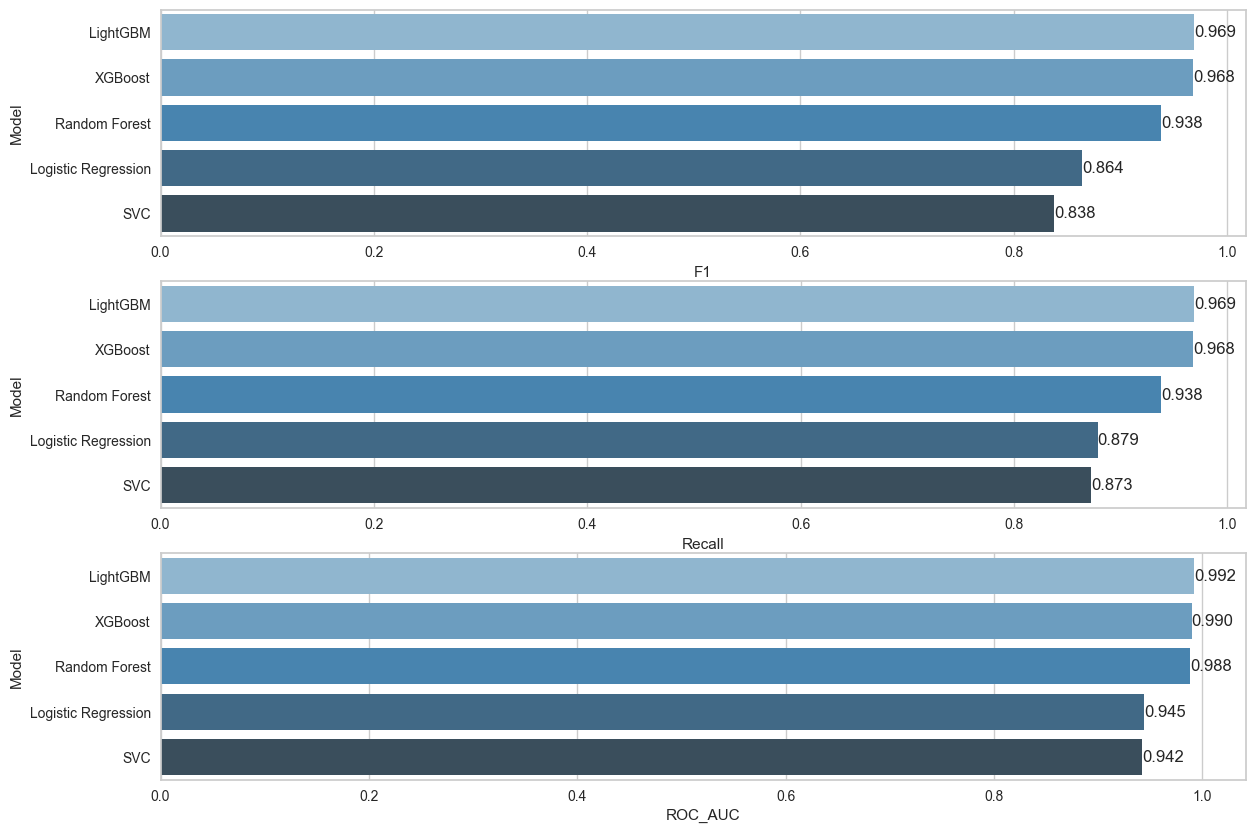

In [121]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "SVC", "Random Forest", "XGBoost", "LightGBM"],
                        "F1": [log_f1, svc_f1, rf_f1, xgb_f1, lgbm_f1],
                        "Recall": [log_recall, svc_recall, rf_recall, xgb_recall, lgbm_recall],
                        "ROC_AUC": [log_auc, svc_auc, rf_auc, xgb_auc, lgbm_auc]})
def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.subplot(313)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

**Due to the overfitting problem in LightGBM, XGBoost and RF, I chose the Logistic Regression model as the appropriate model.**

In [122]:
import pickle

operations = [("scaler", MinMaxScaler()), ("Logistic", LogisticRegression(random_state=42))]

final_model = Pipeline(steps=operations)

final_model.fit(X_encoded, y_encoded)

pickle.dump(final_model, open("final_model_soldier_race", 'wb'))

## Altta yazılı olan başlıklar ile ilgili domain knowledge yapılarak çözüme gelinmeli

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

Yukaridaki makale Smote islemini detayli bir sekilde anlatiyor. 

##  Smote implement

__Smote__ -----> Dengesiz data setlerinde datadaki en buyuk gozlem sayisi hangi class' a ait ise diger class' larin gozlem sayisini da ona esitler. Mesela datamizdaki en buyuk gozlem sayisi White = 3034 idi. Smote islemi uygulandiginda diger class' lardaki gozlem sayilari da buna esitlenir. Dengesiz datasetlerinde mutlaka denenmelidir :

In [123]:
# pip install imblearn

In [124]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [125]:
over = SMOTE(sampling_strategy={1: 1250})
under = RandomUnderSampler(sampling_strategy={2:2800})
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X_resampled, y_resampled = pipeline.fit_resample(Xe_train, ye_train)

In [126]:
from imblearn.combine import SMOTEENN,SMOTETomek
ros1 = SMOTETomek()
ros2 = SMOTEENN()
X_resampled, y_resampled = ros1.fit_resample(Xe_train, ye_train)

In [127]:
X_resampled, y_resampled = ros2.fit_resample(X_resampled, y_resampled)

In [128]:
y_resampled.value_counts()

1    2967
0    2764
2     803
Name: DODRace, dtype: int64

In [129]:
y_train.value_counts()

White       3028
Black       1037
Hispanic     543
Name: DODRace, dtype: int64

## Logistic Regression Over/Under Sampling

imblearn kütüphanesi, dengesiz veri setleri üzerinde örnekleme yöntemlerini (OverSampling ve UnderSampling gibi) kolayca kullanmamıza olanak tanır. Bu kod, dengesiz veri setleriyle çalışırken Logistic Regression modeli üzerinde OverSampling ve UnderSampling'in nasıl uygulanabileceğini göstermektedir. Bu yöntemlerle elde edilen sonuçlar, modelin performansını artırabilir veya dengesizlikten kaynaklanan sorunları azaltabilir.

In [131]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

oversample = RandomOverSampler(sampling_strategy='minority')
X_train_over, y_train_over = oversample.fit_resample(Xe_train, ye_train)

undersample = RandomUnderSampler(sampling_strategy='majority')
X_train_under, y_train_under = undersample.fit_resample(Xe_train, ye_train)

def train_and_evaluate(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))


In [132]:
print("Logistic Regression with original data:")
train_and_evaluate(Xe_train, ye_train, Xe_test, ye_test)

Logistic Regression with original data:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       259
           1       0.60      0.36      0.45       136
           2       0.89      0.95      0.92       758

    accuracy                           0.87      1153
   macro avg       0.80      0.74      0.76      1153
weighted avg       0.86      0.87      0.86      1153



In [133]:
print("Logistic Regression with oversampled data:")
train_and_evaluate(X_train_over, y_train_over, Xe_test, ye_test)

Logistic Regression with oversampled data:
              precision    recall  f1-score   support

           0       0.94      0.81      0.87       259
           1       0.35      0.73      0.47       136
           2       0.95      0.81      0.87       758

    accuracy                           0.80      1153
   macro avg       0.75      0.78      0.74      1153
weighted avg       0.88      0.80      0.82      1153



In [134]:
print("Logistic Regression with undersampled data:")
train_and_evaluate(X_train_under, y_train_under, Xe_test, ye_test)

Logistic Regression with undersampled data:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       259
           1       0.35      0.65      0.45       136
           2       0.95      0.76      0.85       758

    accuracy                           0.79      1153
   macro avg       0.71      0.78      0.73      1153
weighted avg       0.85      0.79      0.81      1153



#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [135]:
#pip install shap

   ---------------------------------------- 0.0/448.0 kB ? eta -:--:--
   --------------------- ------------------ 235.5/448.0 kB 4.8 MB/s eta 0:00:01
   ---------------------------------------- 448.0/448.0 kB 7.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   -------- ------------------------------- 0.6/2.6 MB 17.9 MB/s eta 0:00:01
   ----------------- ---------------------- 1.2/2.6 MB 18.2 MB/s eta 0:00:01
   --------------------------- ------------ 1.8/2.6 MB 16.1 MB/s eta 0:00:01
   ------------------------------------ --- 2.4/2.6 MB 15.1 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 13.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/28.1 MB ? eta -:--:--
   - -------------------------------------- 0.7/28.1 MB 22.5 MB/s eta 0:00:02
   - -------------------------------------- 0.7/28.1 MB 22.5 MB/s eta 0:00:02
   - -------------------------------------- 0.7/28.1 MB 22.5 MB/s eta 0:00:02
   - ------


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: C:\Users\nsgr6\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [158]:
# import shap
# import xgboost

# # XGBoost modelini eğitme
# model = xgboost.XGBClassifier(objective="multi:softmax", num_class=3, random_state=42)
# model.fit(Xe_train, ye_train)

# # SHAP için explainer oluşturma
# explainer = shap.Explainer(model)
# shap_values = explainer(Xe_test)

# # SHAP değerlerini kullanarak Explanation objesi oluşturma
# expected_value = explainer.expected_value
# shap_exp = shap.Explanation(shap_values, base_values=expected_value, data=Xe_test)

# # Belirli bir örneğin SHAP değerlerini görselleştirme
# shap.plots.force(shap_exp)

TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[0]).

## Shap values for all data

## SMOTE for X3 dataset

Bu kod, imblearn kütüphanesinden SMOTE sınıfını kullanarak aşırı örneklemeyi gerçekleştirir. fit_resample() yöntemi, azınlık sınıfındaki örnekleri sentetik verilerle artırarak dengesizliği azaltır ve X_resampled ve y_resampled değişkenlerine dengelenmiş veriyi döndürür.

Gerçek veri setinizi ve hedef değişkeninizi X3 dataseti yerine kullanarak kodu çalıştırabilirsiniz. Bu işlem, azınlık sınıfındaki örneklerin sentetik verilerle artırılmasını sağlayarak dengesizlik problemini hafifletecektir. Bu sayede modelinizin dengesiz veri setlerinde daha iyi performans göstermesine yardımcı olabilirsiniz.

In [159]:
from imblearn.over_sampling import SMOTE

In [164]:
smote = SMOTE(random_state=42)  # SMOTE nesnesini oluşturma
X_resampled, y_resampled = smote.fit_resample(X_encoded, y_encoded)  # SMOTE'u kullanarak veri setini aşırı örnekleme

In [165]:
X_resampled.shape

(11358, 104)

In [166]:
y_resampled.shape

(11358,)

In [167]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [168]:
print("Logistic Regression with original data:")
train_and_evaluate(X2_train, y2_train, X2_test, y2_test)

Logistic Regression with original data:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       758
           1       0.78      0.81      0.79       734
           2       0.83      0.82      0.83       780

    accuracy                           0.85      2272
   macro avg       0.85      0.85      0.85      2272
weighted avg       0.85      0.85      0.85      2272



In [170]:
print("Logistic Regression with oversampled data:")
train_and_evaluate(X_train_over, y_train_over, X2_test, y2_test)

Logistic Regression with oversampled data:
              precision    recall  f1-score   support

           0       0.97      0.84      0.90       758
           1       0.73      0.82      0.78       734
           2       0.83      0.84      0.83       780

    accuracy                           0.83      2272
   macro avg       0.84      0.83      0.84      2272
weighted avg       0.84      0.83      0.84      2272



In [171]:
print("Logistic Regression with undersampled data:")
train_and_evaluate(X_train_under, y_train_under, X2_test, y2_test)

Logistic Regression with undersampled data:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       758
           1       0.78      0.79      0.78       734
           2       0.87      0.79      0.83       780

    accuracy                           0.85      2272
   macro avg       0.85      0.85      0.84      2272
weighted avg       0.85      0.85      0.85      2272



## Find the best threshold for multiclassification

# <p style="background-color:green;font-family:newtimeroman;font-size:130%;color:white;text-align:center;border-radius:20px 20px;"><b>B168 Supervised Project </b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Watsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [Linkedin](https://www.linkedin.com/company/techproeducation/mycompany/) |